### 📊 Load and Describe Data

**Purpose:**  
- Loads the Spotify/YouTube dataset into a DataFrame (`df`).
- Shows a statistical summary of all numeric columns.

**Meaning:**  
- Gives a quick overview of the data, including count, mean, std, min, max, and quartiles for each numeric feature.

**Results indicate:**  
- Helps spot outliers, missing values, and the general scale of each feature.

In [304]:
import pandas as pd

df = pd.read_csv('Spotify_Youtube.csv')
df.describe()



Unnamed: 0  Danceability        Energy           Key      Loudness  \
count  20718.000000  20716.000000  20716.000000  20716.000000  20716.000000   
mean   10358.500000      0.619777      0.635250      5.300348     -7.671680   
std     5980.915774      0.165272      0.214147      3.576449      4.632749   
min        0.000000      0.000000      0.000020      0.000000    -46.251000   
25%     5179.250000      0.518000      0.507000      2.000000     -8.858000   
50%    10358.500000      0.637000      0.666000      5.000000     -6.536000   
75%    15537.750000      0.740250      0.798000      8.000000     -4.931000   
max    20717.000000      0.975000      1.000000     11.000000      0.920000   

        Speechiness  Acousticness  Instrumentalness      Liveness  \
count  20716.000000  20716.000000      20716.000000  20716.000000   
mean       0.096456      0.291535          0.055962      0.193521   
std        0.111960      0.286299          0.193262      0.168531   
min        0.000000      0.000001          0.000000      0.014500   
25%        0.035700      0.045200          0.000000      0.094100   
50%        0.050500      0.193000          0.000002      0.125000   
75%        0.103000      0.477250          0.000463      0.237000   
max        0.964000      0.996000          1.000000      1.000000   

            Valence         Tempo   Duration_ms         Views         Likes  \
count  20716.000000  20716.000000  2.071600e+04  2.024800e+04  2.017700e+04   
mean       0.529853    120.638340  2.247176e+05  9.393782e+07  6.633411e+05   
std        0.245441     29.579018  1.247905e+05  2.746443e+08  1.789324e+06   
min        0.000000      0.000000  3.098500e+04  0.000000e+00  0.000000e+00   
25%        0.339000     97.002000  1.800095e+05  1.826002e+06  2.158100e+04   
50%        0.537000    119.965000  2.132845e+05  1.450110e+07  1.244810e+05   
75%        0.726250    139.935000  2.524430e+05  7.039975e+07  5.221480e+05   
max        0.993000    243.372000  4.676058e+06  8.079649e+09  5.078865e+07   

           Comments        Stream  
count  2.014900e+04  2.014200e+04  
mean   2.751899e+04  1.359422e+08  
std    1.932347e+05  2.441321e+08  
min    0.000000e+00  6.574000e+03  
25%    5.090000e+02  1.767486e+07  
50%    3.277000e+03  4.968298e+07  
75%    1.436000e+04  1.383581e+08  
max    1.608314e+07  3.386520e+09

###  Check for Missing Values

**Purpose:**  
- Prints the number of missing values in each column.

**Meaning:**  
- Identifies which columns have missing data. and which features is need of work on 

**Results indicate:**  
- Columns with high missing values may need cleaning or imputation.

In [305]:
print(df.isna().sum().sort_values(ascending=False))




Description         876
Stream              576
Comments            569
Likes               541
official_video      470
Licensed            470
Views               470
Channel             470
Title               470
Url_youtube         470
Valence               2
Duration_ms           2
Tempo                 2
Liveness              2
Instrumentalness      2
Acousticness          2
Speechiness           2
Loudness              2
Key                   2
Energy                2
Danceability          2
Artist                0
Uri                   0
Album_type            0
Album                 0
Track                 0
Url_spotify           0
Unnamed: 0            0
dtype: int64


### 🏷️ Data Info and Album Type Counts

**Purpose:**  
- Shows info about the DataFrame (types, non-null counts).
- Displays the count of each `Album_type`.

**Meaning:**  
- Checks data types and completeness.
- Reveals class imbalance in the target variable.
-as well getting to know the data more
**Results indicate:**  
- Most songs are albums, fewer are singles.

##  Class Imbalance in `Album_type`

The bar chart down shows that the dataset is heavily **imbalanced**. Most songs are labeled as **album**, while only about 24% are labeled as **single**. This imbalance may lead models to favor the majority class if not handled properly. As a result, we must consider rebalancing strategies 

In [306]:
df.info()
df['Album_type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

Album_type
album          14926
single          5004
compilation      788
Name: count, dtype: int64


  
- merges 'compilation' into 'album' for `Album_type`. as requested in the hw
**Meaning:**  
- Simplifies the classification problem to two classes: album and single.

In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Merge 'compilation' into 'album'
df['Album_type'] = df['Album_type'].replace('compilation', 'album')




### Album Type Distribution (Agenda)

- **Goal**: Understand the class distribution of our target variable `Album_type`
- **Visualization**: A pie chart showing the proportion of singles vs albums, with a legend indicating each class
- **Observation**: The data is imbalanced:
  - ~76% of songs are labeled as albums
  - ~24% are labeled as singles

This imbalance will impact model performance and should be handled using techniques such as class weighting, resampling, or appropriate metrics (e.g., F1-score).


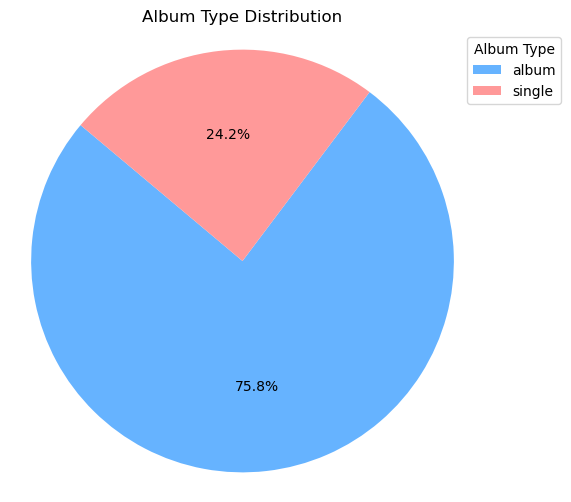

In [308]:
#the hw2 asks to treat compilitation as album
df['Album_type'] = df['Album_type'].replace('compilation', 'album')
counts = df['Album_type'].value_counts()

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    counts,
    labels=None,  # No labels on wedges
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff9999'],
    startangle=140
)
plt.title('Album Type Distribution')
plt.legend(wedges, counts.index, title='Album Type', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()


### Pairplot of Musical Features by Album Type

This pairplot compares **Danceability**, **Energy**, and **Valence** between **albums** (blue) and **singles** (orange).

* Albums have slightly higher **Energy** and **Valence** on average.
* Singles are more spread out in **Danceability**.
* Clear overlap suggests these features help but aren't enough alone to separate the classes.

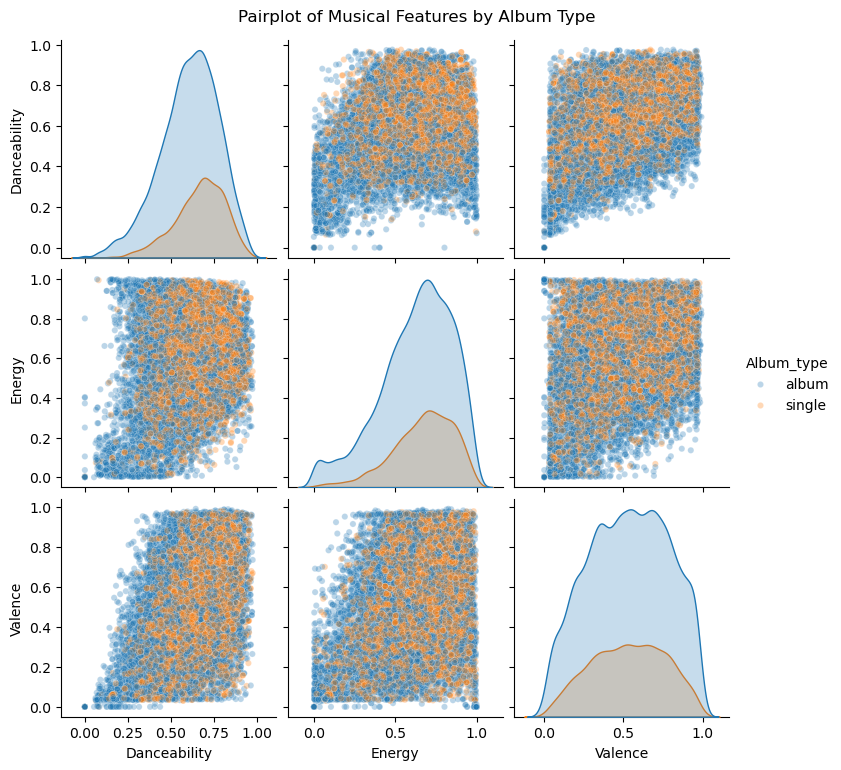

In [309]:
subset = df[['Danceability', 'Energy', 'Valence', 'Album_type']]
sns.pairplot(subset, hue='Album_type', plot_kws={'alpha': 0.3, 's': 20})
plt.suptitle('Pairplot of Musical Features by Album Type', y=1.02)
plt.show()


###  Distribution of Log-Scaled YouTube Views

This plot shows the distribution of YouTube views using a log scale to reduce the effect of extreme values. The distribution is now more balanced, which makes `Views_log` a good candidate for modeling. This also confirms the presence of a few very viral songs.


Helps stabilize variance and improve model learning on features.

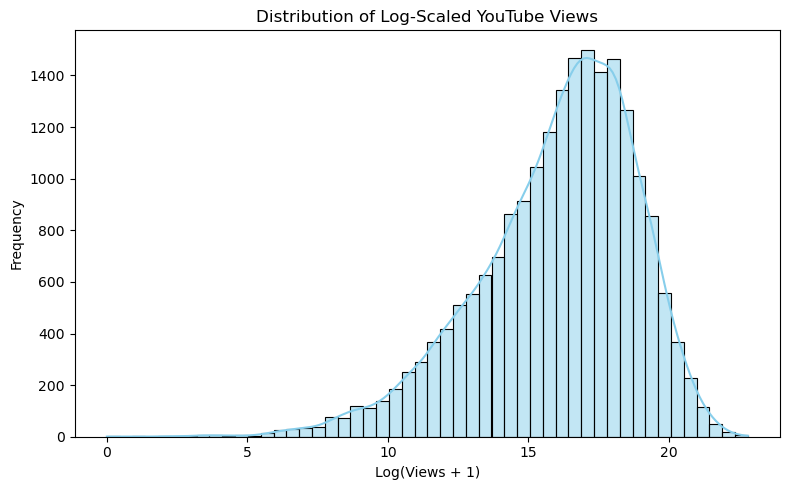

In [310]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a log-transformed version of 'Views'
df['Views_log'] = np.log1p(df['Views'])

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Views_log', bins=50, kde=True, color='skyblue')
plt.title('Distribution of Log-Scaled YouTube Views')
plt.xlabel('Log(Views + 1)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### 📦 Boxplot: Loudness by Album Type

This boxplot compares the loudness levels between singles and albums. Singles appear to have slightly higher loudness (closer to 0), which may reflect a more polished, radio-friendly production style. This could be a relevant feature for classification.


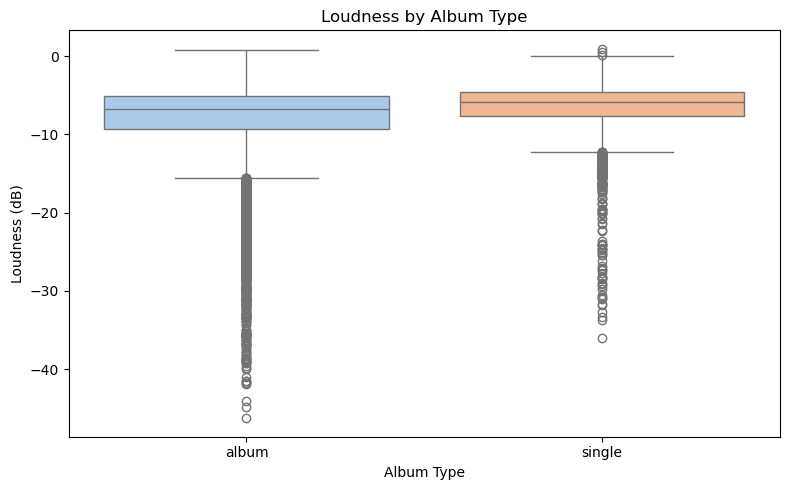

In [311]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Album_type', y='Loudness', hue='Album_type', palette='pastel', legend=False)
plt.title('Loudness by Album Type')
plt.xlabel('Album Type')
plt.ylabel('Loudness (dB)')
plt.tight_layout()
plt.show()


### 🔍 Feature Relationship Analysis

These scatter plots show key relationships between musical features:

- **Loudness vs Energy**: Strong curved correlation — louder songs are more energetic. May be redundant.
- **Valence vs Danceability**: Mild upward trend — happier songs tend to be more danceable.
- **Speechiness vs Instrumentalness**: Clear inverse relationship — songs are either spoken or instrumental, not both.
- **Valence vs Energy**: Weak positive trend — energetic songs are often more positive.
- **Danceability vs Energy**: Slight positive trend — danceable songs tend to be energetic.

These insights will help guide feature selection and transformation in Section B.


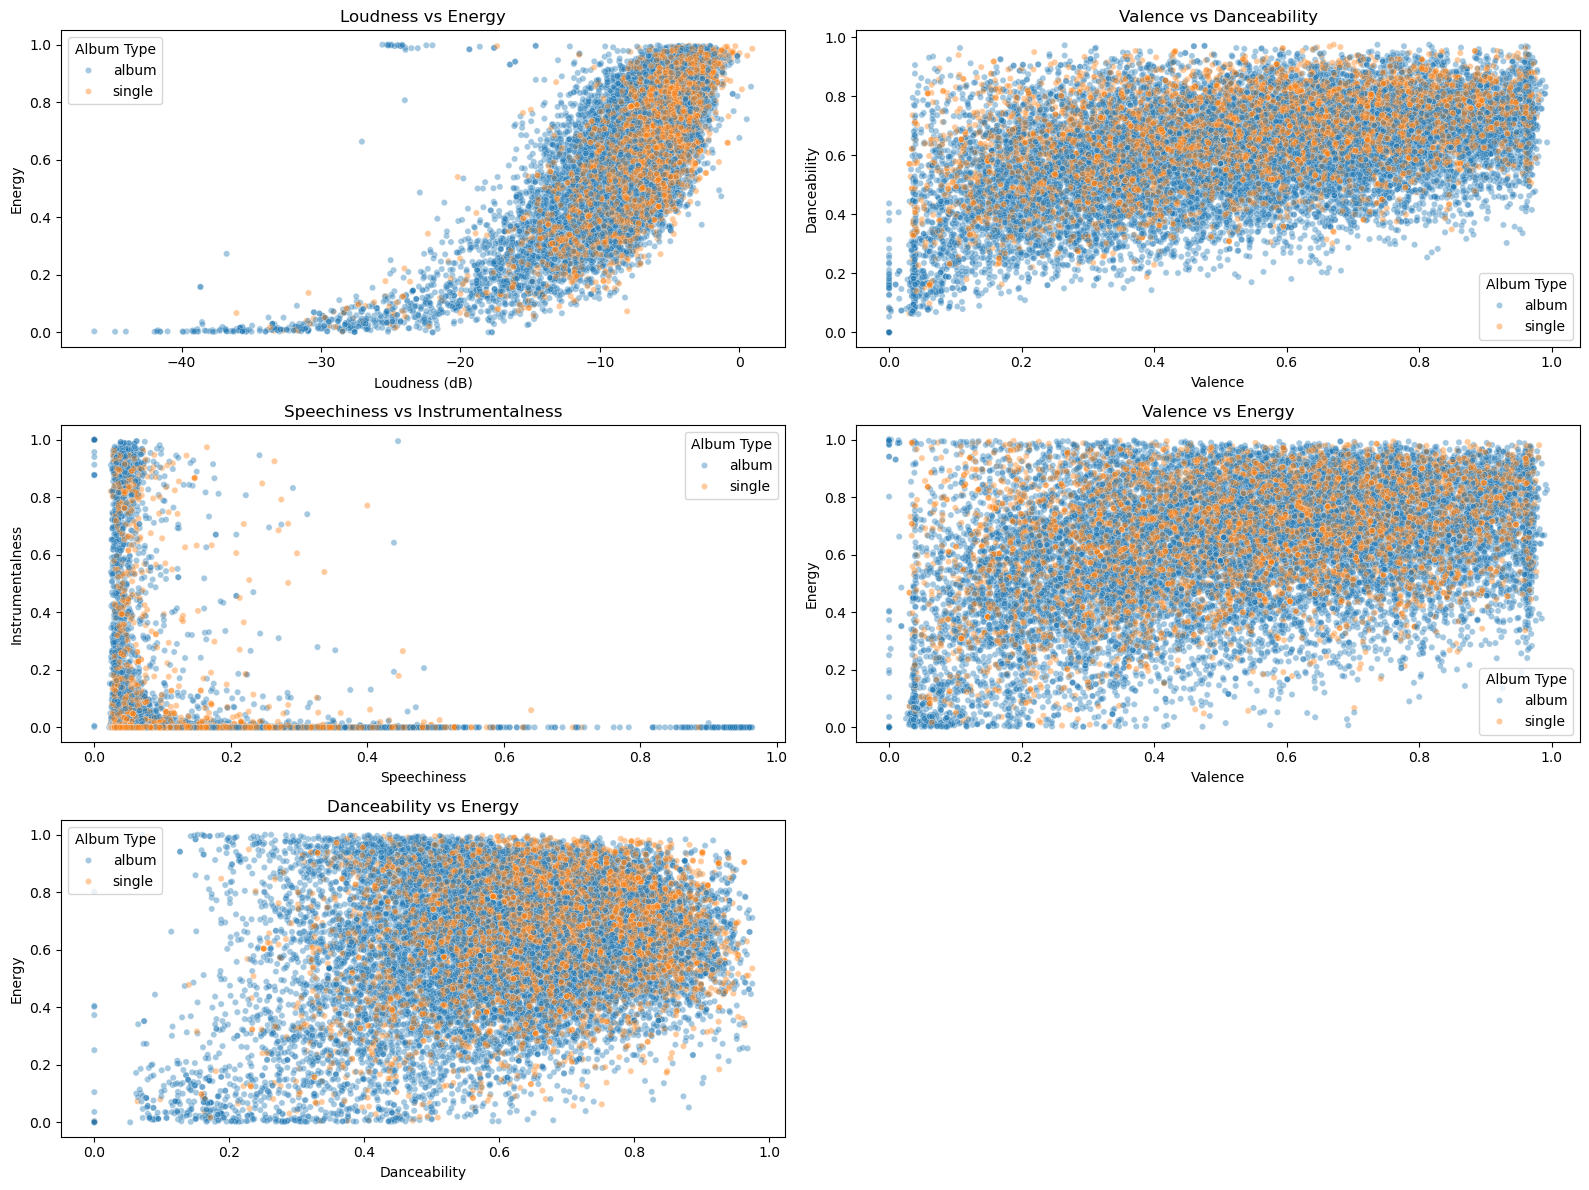

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(16, 12))

# -------- Plot 1: Loudness vs Energy --------
plt.subplot(3, 2, 1)
sns.scatterplot(data=df, x='Loudness', y='Energy', hue='Album_type', alpha=0.4, s=20)
plt.title('Loudness vs Energy')
plt.xlabel('Loudness (dB)')
plt.ylabel('Energy')
plt.legend(title='Album Type')

# -------- Plot 2: Valence vs Danceability --------
plt.subplot(3, 2, 2)
sns.scatterplot(data=df, x='Valence', y='Danceability', hue='Album_type', alpha=0.4, s=20)
plt.title('Valence vs Danceability')
plt.xlabel('Valence')
plt.ylabel('Danceability')
plt.legend(title='Album Type')

# -------- Plot 3: Speechiness vs Instrumentalness --------
plt.subplot(3, 2, 3)
sns.scatterplot(data=df, x='Speechiness', y='Instrumentalness', hue='Album_type', alpha=0.4, s=20)
plt.title('Speechiness vs Instrumentalness')
plt.xlabel('Speechiness')
plt.ylabel('Instrumentalness')
plt.legend(title='Album Type')

# -------- Plot 4: Valence vs Energy --------
plt.subplot(3, 2, 4)
sns.scatterplot(data=df, x='Valence', y='Energy', hue='Album_type', alpha=0.4, s=20)
plt.title('Valence vs Energy')
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.legend(title='Album Type')

# -------- Plot 5: Danceability vs Energy --------
plt.subplot(3, 2, 5)
sns.scatterplot(data=df, x='Danceability', y='Energy', hue='Album_type', alpha=0.4, s=20)
plt.title('Danceability vs Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend(title='Album Type')

plt.tight_layout()
plt.show()



### 🔥 Correlation Heatmap Summary

- **High correlations**:
  - `Views`, `Likes`, and `Stream` are strongly correlated → keep only one.
  - `Energy` and `Loudness` show strong positive correlation → drop one to reduce redundancy.

- **Strong negative correlations**:
  - `Acousticness` is negatively correlated with both `Energy` and `Loudness`, meaning acoustic songs are softer and less energetic.

- **Low correlations**:
  - Features like `Key`, `Liveness`, and `Tempo` show weak relationships with others and may have low predictive power.

These insights help identify redundant or weak features for exclusion or transformation in Section B.
Highly correlated features (e.g., `Views` and `Likes`) are redundant and may harm model stability or lead to overfitting. To reduce multicollinearity and simplify the model, we keep only one feature from each strongly correlated pair.



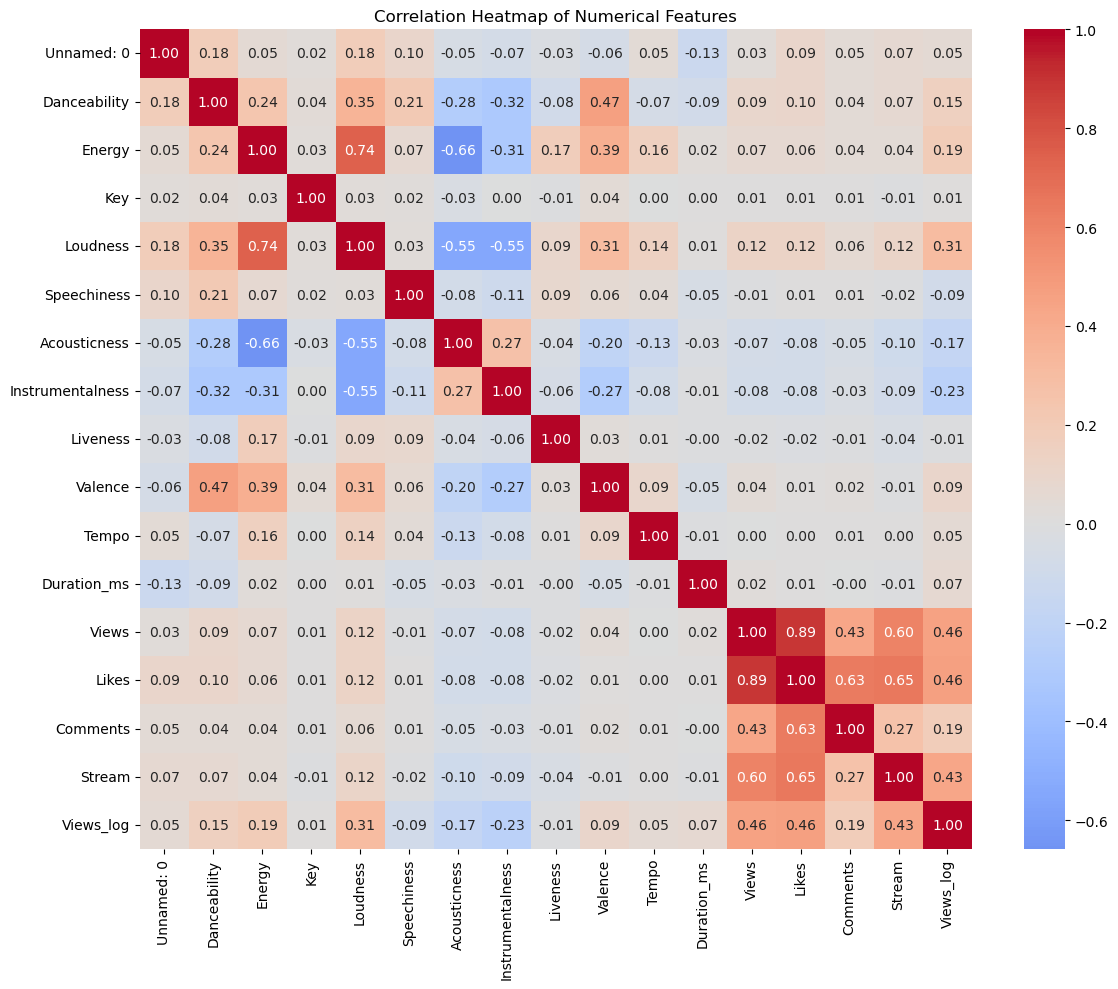

In [313]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()



creted top_stream_artists and top_views_artists column for best ....

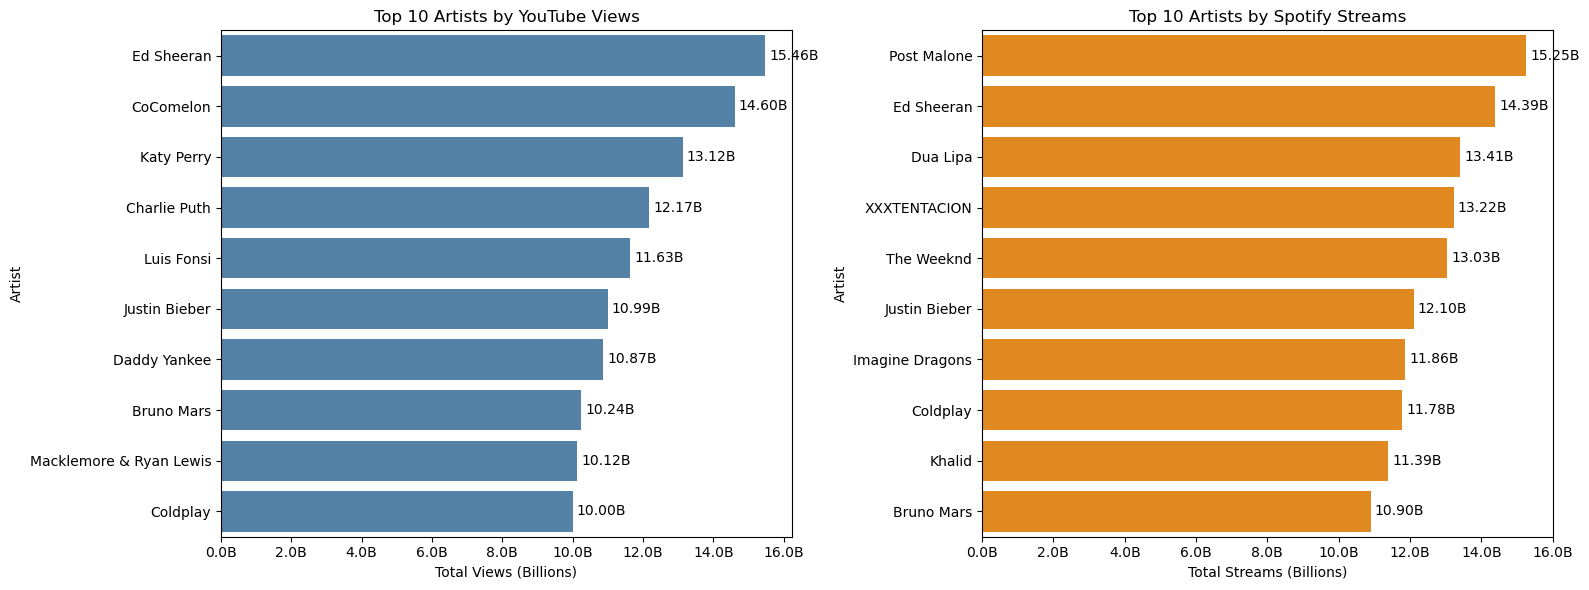

In [314]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Calculate top 10 artists by Views and Stream
top_views_artists = df.groupby('Artist')['Views'].sum().sort_values(ascending=False).head(10)
top_stream_artists = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False).head(10)

# Create plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot YouTube Views
bars0 = sns.barplot(x=top_views_artists.values, y=top_views_artists.index, ax=axes[0], color='steelblue')
axes[0].set_title('Top 10 Artists by YouTube Views')
axes[0].set_xlabel('Total Views (Billions)')
axes[0].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-9:.1f}B'))
axes[0].bar_label(bars0.containers[0], fmt=lambda x: f'{x*1e-9:.2f}B', padding=3)

# Plot Spotify Streams
bars1 = sns.barplot(x=top_stream_artists.values, y=top_stream_artists.index, ax=axes[1], color='darkorange')
axes[1].set_title('Top 10 Artists by Spotify Streams')
axes[1].set_xlabel('Total Streams (Billions)')
axes[1].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-9:.1f}B'))
axes[1].bar_label(bars1.containers[0], fmt=lambda x: f'{x*1e-9:.2f}B', padding=3)

plt.tight_layout()
plt.show()


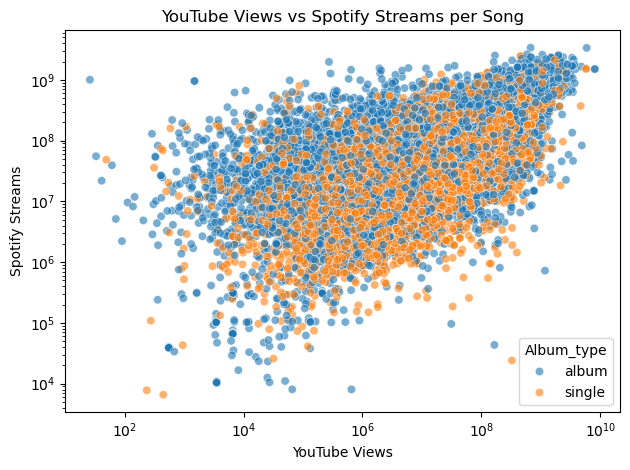

In [315]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x='Views', y='Stream', hue='Album_type', alpha=0.6)
plt.title('YouTube Views vs Spotify Streams per Song')
plt.xlabel('YouTube Views')
plt.ylabel('Spotify Streams')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

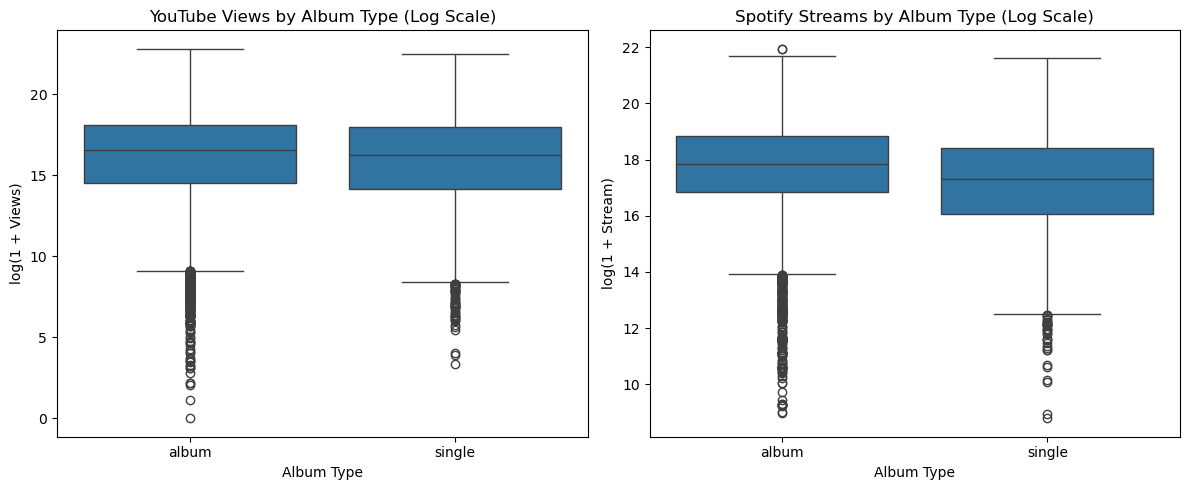

In [316]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#Views_log is done above in another code
# Ensure log columns exist
df['Stream_log'] = np.log1p(df['Stream'])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df, x='Album_type', y='Views_log', ax=axes[0])
axes[0].set_title('YouTube Views by Album Type (Log Scale)')
axes[0].set_xlabel('Album Type')
axes[0].set_ylabel('log(1 + Views)')

sns.boxplot(data=df, x='Album_type', y='Stream_log', ax=axes[1])
axes[1].set_title('Spotify Streams by Album Type (Log Scale)')
axes[1].set_xlabel('Album Type')
axes[1].set_ylabel('log(1 + Stream)')

plt.tight_layout()
plt.show()

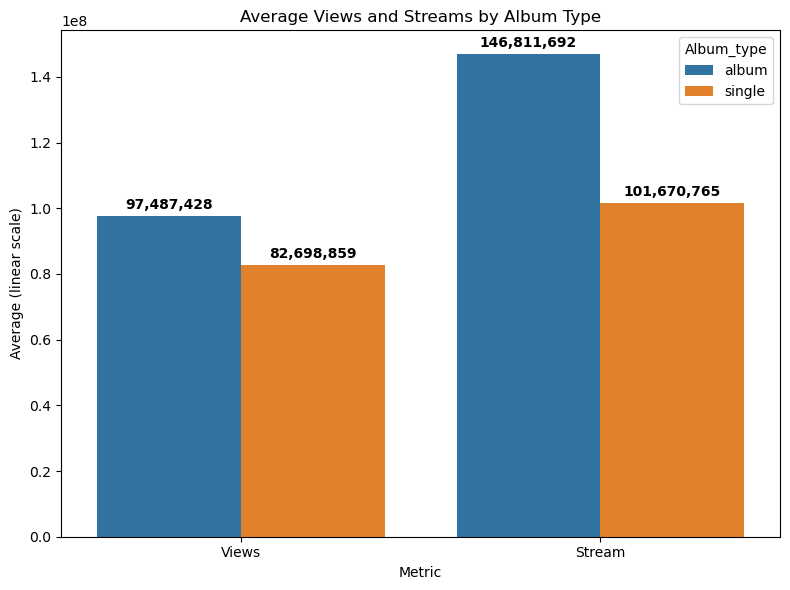

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and melt as before
agg = df.groupby('Album_type')[['Views', 'Stream']].mean().reset_index()
agg_melted = agg.melt(id_vars='Album_type', var_name='Metric', value_name='Average')

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=agg_melted, x='Metric', y='Average', hue='Album_type')

# Improved labels
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='{:,.0f}',       # Commas for clarity
        padding=3,
        fontsize=10,
        weight='bold'
    )

plt.title('Average Views and Streams by Album Type')
plt.ylabel('Average (linear scale)')
plt.tight_layout()
plt.show()


Result:
You get a side-by-side line plot showing how the most popular songs on YouTube and Spotify compare in terms of their total views/streams (in billions), ranked from 1 to 20. This helps visualize whether the same songs dominate both platforms or if there are differences in popularity.

top20_song_streams and top20_song_views

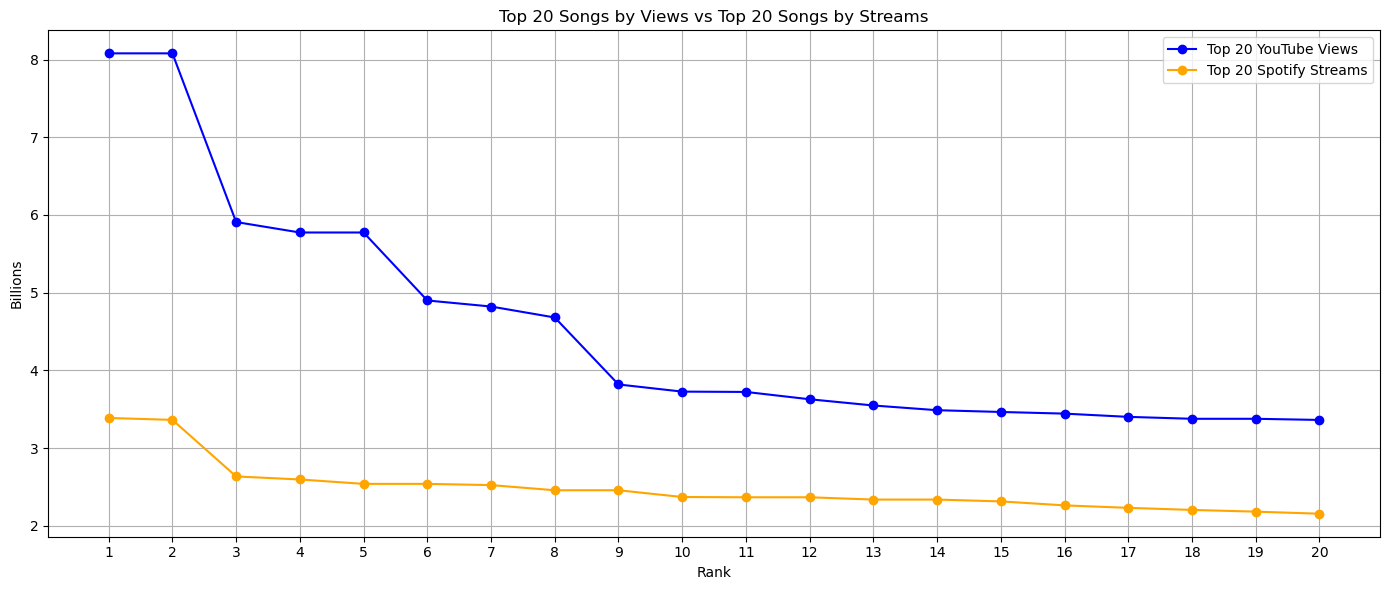

In [318]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 1. Top 20 by YouTube Views
top20_songs_views = df.sort_values('Views', ascending=False).head(20)[['Track', 'Views']].copy()
top20_songs_views['Views (B)'] = top20_songs_views['Views'] / 1e9
top20_songs_views['Rank'] = range(1, 21)

# ✅ 2. Top 20 by Spotify Streams
top20_song_streams = df.sort_values('Stream', ascending=False).head(20)[['Track', 'Stream']].copy()
top20_song_streams['Streams (B)'] = top20_song_streams['Stream'] / 1e9
top20_song_streams['Rank'] = range(1, 21)

# ✅ 3. Line Plot Comparing Top 20s
plt.figure(figsize=(14, 6))
plt.plot(top20_songs_views['Rank'], top20_songs_views['Views (B)'], marker='o', label='Top 20 YouTube Views', color='blue')
plt.plot(top20_song_streams['Rank'], top20_song_streams['Streams (B)'], marker='o', label='Top 20 Spotify Streams', color='orange')

plt.title('Top 20 Songs by Views vs Top 20 Songs by Streams')
plt.xlabel('Rank')
plt.ylabel('Billions')
plt.xticks(range(1, 21))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [319]:
from IPython.display import display, HTML

# Prepare top 20 by YouTube Views
top20_songs_views = df.sort_values('Views', ascending=False).head(20)[['Track', 'Views', 'Stream']].copy()
top20_songs_views['Views (B)'] = top20_songs_views['Views'] / 1e9
top20_songs_views['Streams (B)'] = top20_songs_views['Stream'] / 1e9

# Prepare top 20 by Spotify Streams
top20_song_streams = df.sort_values('Stream', ascending=False).head(20)[['Track', 'Views', 'Stream']].copy()
top20_song_streams['Views (B)'] = top20_song_streams['Views'] / 1e9
top20_song_streams['Streams (B)'] = top20_song_streams['Stream'] / 1e9

# Style both tables
table1 = top20_songs_views[['Track', 'Views (B)', 'Streams (B)']].style \
    .background_gradient(subset=['Views (B)', 'Streams (B)'], cmap='Blues') \
    .format({'Views (B)': '{:.2f}', 'Streams (B)': '{:.2f}'}) \
    .set_table_attributes("style='display:inline;margin-right:50px'") \
    .set_caption("Top 20 Songs by YouTube Views")

table2 = top20_song_streams[['Track', 'Views (B)', 'Streams (B)']].style \
    .background_gradient(subset=['Views (B)', 'Streams (B)'], cmap='Oranges') \
    .format({'Views (B)': '{:.2f}', 'Streams (B)': '{:.2f}'}) \
    .set_table_attributes("style='display:inline'") \
    .set_caption("Top 20 Songs by Spotify Streams")

# Display side by side
display(HTML(table1.to_html() + table2.to_html()))

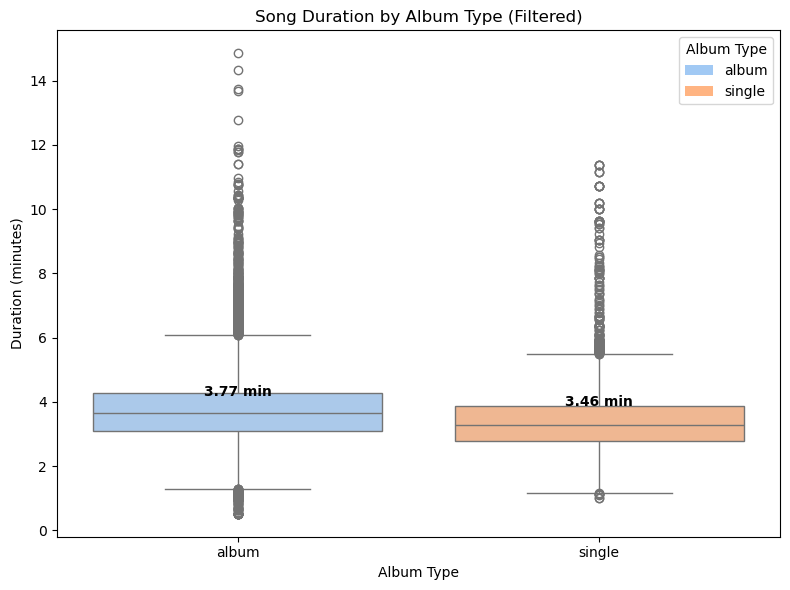

In [320]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Step 1: Prepare data
df['Duration_min'] = df['Duration_ms'] / 60000
filtered_df = df[df['Duration_min'] < 15]

# Step 2: Plot
plt.figure(figsize=(8, 6))
album_types = filtered_df['Album_type'].unique()
palette = sns.color_palette('pastel', n_colors=len(album_types))
ax = sns.boxplot(
    data=filtered_df,
    x='Album_type',
    y='Duration_min',
    hue='Album_type',
    palette=palette,
    legend=False  # We'll add a custom legend below
)
plt.title('Song Duration by Album Type (Filtered)')
plt.ylabel('Duration (minutes)')
plt.xlabel('Album Type')

# Step 3: Add mean labels
mean_durations = filtered_df.groupby('Album_type')['Duration_min'].mean()
for i, album_type in enumerate(mean_durations.index):
    ax.text(i, mean_durations[album_type] + 0.3, f"{mean_durations[album_type]:.2f} min",
            ha='center', va='bottom', fontweight='bold', fontsize=10)

# Step 4: Auto legend using actual colors
handles = [Patch(facecolor=palette[i], label=album_types[i]) for i in range(len(album_types))]
plt.legend(handles=handles, title='Album Type')

plt.tight_layout()
plt.show()

Mean duration per quartile:
 Stream_Quartile
Low         3.526394
Mid-Low     3.778831
Mid-High    3.754311
High        3.707501
Name: Duration_min, dtype: float64

Count per quartile:
 Stream_Quartile
High        5035
Mid-High    5033
Low         5028
Mid-Low     5023
Name: count, dtype: int64


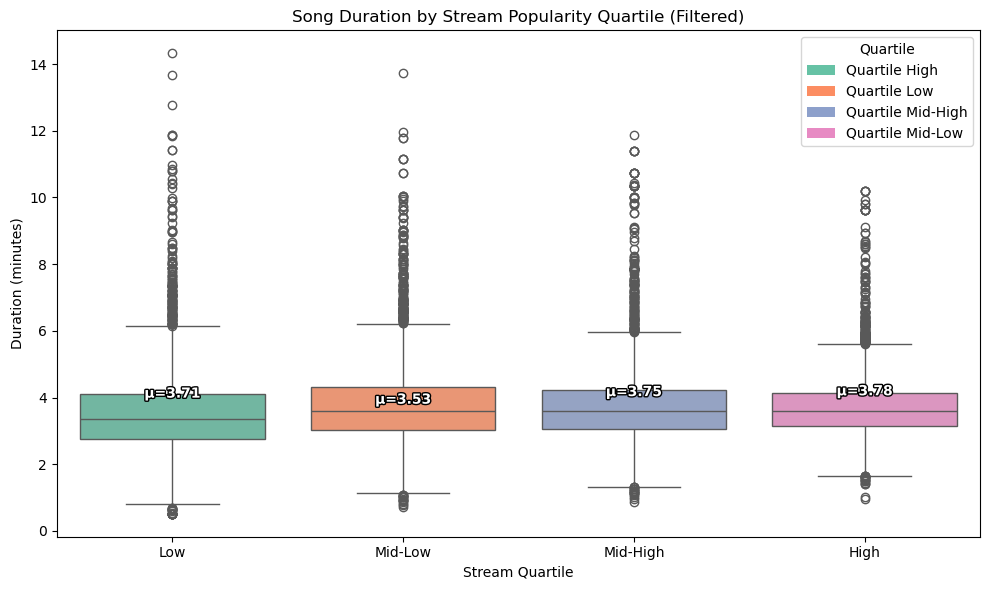

In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import matplotlib.patheffects as pe

# ✅ Ensure required columns exist
df['Duration_min'] = df['Duration_ms'] / 60000

# ✅ Create Stream Quartiles (4 groups)
df['Stream_Quartile'] = pd.qcut(df['Stream'], 4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

# ✅ Filter extreme durations (>15 minutes) for visualization
filtered_quartile_df = df[df['Duration_min'] < 15]

# ✅ Plot setup
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=filtered_quartile_df,
    x='Stream_Quartile',
    y='Duration_min',
    hue='Stream_Quartile',
    palette='Set2',
    legend=False
)
plt.title('Song Duration by Stream Popularity Quartile (Filtered)')
plt.xlabel('Stream Quartile')
plt.ylabel('Duration (minutes)')

# ✅ Custom Legend (colors match)
quartiles = filtered_quartile_df['Stream_Quartile'].dropna().unique()
quartiles_sorted = sorted(quartiles, key=lambda x: str(x))  # sort as strings

colors = sns.color_palette('Set2', n_colors=len(quartiles_sorted))
handles = [Patch(facecolor=colors[i], label=f'Quartile {quartiles_sorted[i]}') for i in range(len(quartiles_sorted))]
plt.legend(handles=handles, title='Quartile', loc='upper right')

# ✅ Add mean duration labels above boxes
means = filtered_quartile_df.groupby('Stream_Quartile', observed=True)['Duration_min'].mean()
for i, q in enumerate(quartiles_sorted):
    mean_val = means[q]
    ax.text(
        i, mean_val + 0.2, f"μ={mean_val:.2f}",
        ha='center', va='bottom', fontsize=10, fontweight='bold', color='white',
        path_effects=[pe.withStroke(linewidth=2, foreground='black')]
    )

# ✅ Show value counts + means for debugging (optional)
print("Mean duration per quartile:\n", means)
print("\nCount per quartile:\n", filtered_quartile_df['Stream_Quartile'].value_counts())

plt.tight_layout()
plt.show()


In [322]:
# Get actual bin edges used by qcut
_, bin_edges = pd.qcut(df['Stream'], q=4, retbins=True, duplicates='drop')
print("Quartile Thresholds (Stream):")
for i in range(len(bin_edges)-1):
    print(f"Q{i+1}: {bin_edges[i]:,.0f} to {bin_edges[i+1]:,.0f}")


Quartile Thresholds (Stream):
Q1: 6,574 to 17,674,864
Q2: 17,674,864 to 49,682,982
Q3: 49,682,982 to 138,358,065
Q4: 138,358,065 to 3,386,520,288


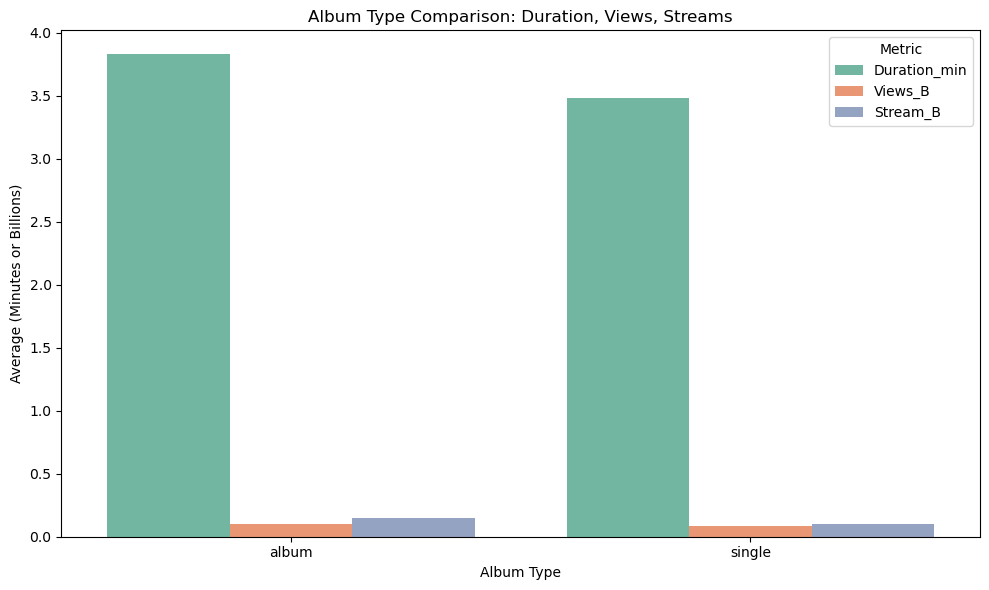

In [323]:
# Aggregate
agg_album = df.groupby('Album_type')[['Duration_min', 'Views', 'Stream']].mean().reset_index()
agg_album['Views_B'] = agg_album['Views'] / 1e9
agg_album['Stream_B'] = agg_album['Stream'] / 1e9

# Melt for seaborn
plot_df = agg_album.melt(id_vars='Album_type',
                         value_vars=['Duration_min', 'Views_B', 'Stream_B'],
                         var_name='Metric', value_name='Average')

# Bar plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='Album_type', y='Average', hue='Metric', palette='Set2')
plt.title('Album Type Comparison: Duration, Views, Streams')
plt.ylabel('Average (Minutes or Billions)')
plt.xlabel('Album Type')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


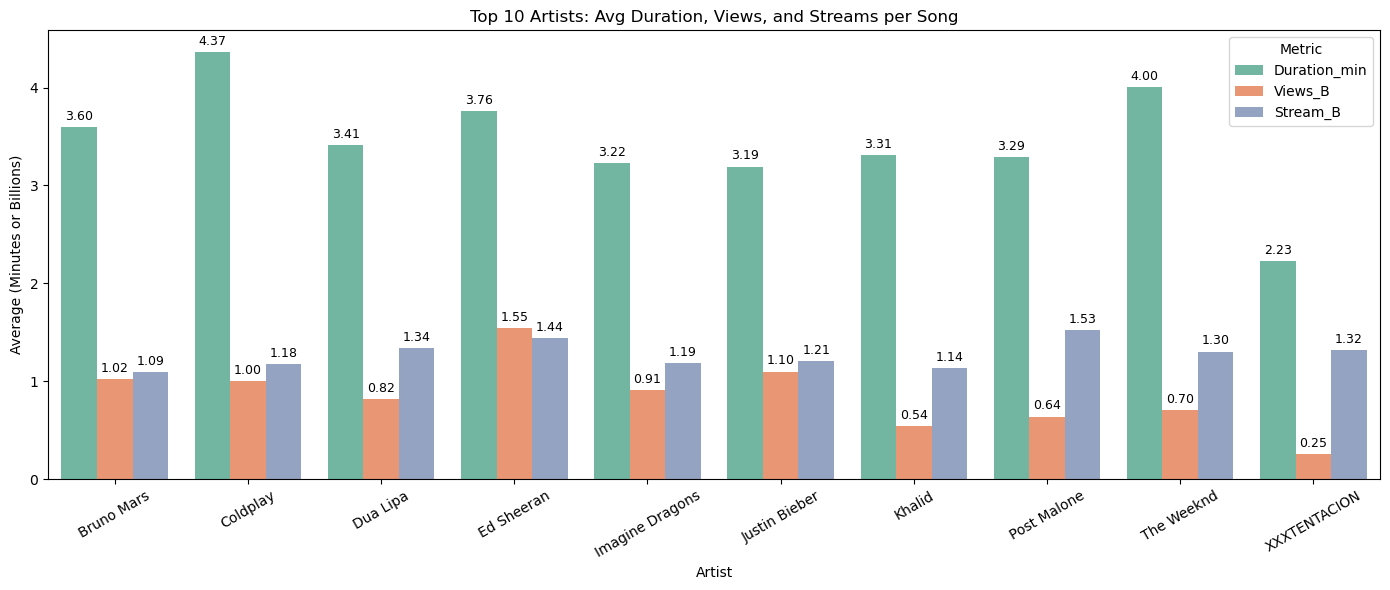

In [324]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 1. Get Top 10 Artists by Total Streams
top10_artists = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False).head(10).index
artist_df = df[df['Artist'].isin(top10_artists)]

# 🎯 2. Aggregate average stats per artist
agg_artists = artist_df.groupby('Artist')[['Duration_min', 'Views', 'Stream']].mean().reset_index()
agg_artists['Views_B'] = agg_artists['Views'] / 1e9
agg_artists['Stream_B'] = agg_artists['Stream'] / 1e9

# 🎯 3. Melt for grouped bar chart
plot_df = agg_artists.melt(id_vars='Artist',
                           value_vars=['Duration_min', 'Views_B', 'Stream_B'],
                           var_name='Metric', value_name='Average')

# 📊 4. Plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=plot_df, x='Artist', y='Average', hue='Metric', palette='Set2')

# ➕ 5. Add value labels above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, fontsize=9)

plt.title('Top 10 Artists: Avg Duration, Views, and Streams per Song')
plt.ylabel('Average (Minutes or Billions)')
plt.xlabel('Artist')
plt.xticks(rotation=30)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


In [325]:
top_artists = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False).head(10).index
radar_df = df[df['Artist'].isin(top_artists)].groupby('Artist')[
    ['Danceability', 'Energy', 'Valence', 'Acousticness', 'Instrumentalness']
].mean()


In [326]:
radar_norm = (radar_df - radar_df.min()) / (radar_df.max() - radar_df.min())


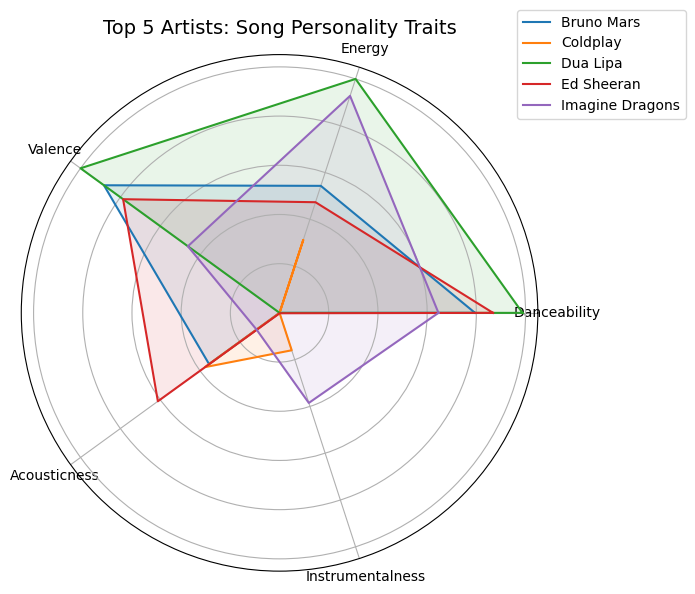

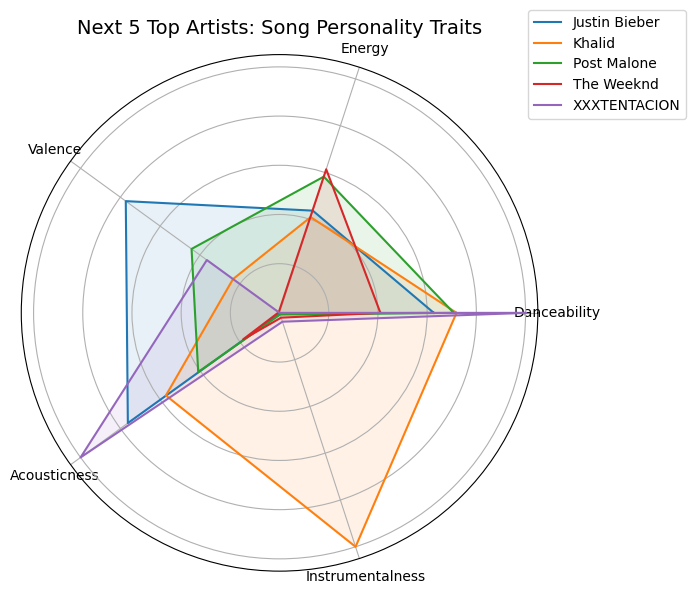

In [327]:
from math import pi

def plot_radar(data, title):
    labels = data.columns.tolist()
    num_vars = len(labels)

    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    plt.figure(figsize=(8, 6))
    ax = plt.subplot(111, polar=True)

    for artist in data.index:
        values = data.loc[artist].tolist()
        values += values[:1]  # loop back to start
        ax.plot(angles, values, label=artist)
        ax.fill(angles, values, alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_yticklabels([])
    ax.set_title(title, size=14)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()

# Group 1: top 5
plot_radar(radar_norm.iloc[:5], title='Top 5 Artists: Song Personality Traits')

# Group 2: next 5
plot_radar(radar_norm.iloc[5:], title='Next 5 Top Artists: Song Personality Traits')


***PART B***
 

### STEP 1: Load and Summarize Data

We begin by loading the dataset and generating a summary that includes missing values, their percentages, unique values per feature, and data types. This helps us understand the overall structure of the data and guides us in deciding which preprocessing techniques to apply.


In [328]:
import pandas as pd

# Load your dataset
df = pd.read_csv('Spotify_Youtube.csv')

# Initialize summary DataFrame
summary_df = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df)) * 100,
    'Unique Values': df.nunique(),
    'Unique % of Data': (df.nunique() / len(df)) * 100,
    'Data Type': df.dtypes
})

# Add total rows as a column for reference (same value repeated)
summary_df['Total Rows'] = len(df)

# Reorder columns for clarity
summary_df = summary_df[['Total Rows', 'Missing Values', 'Missing %', 'Unique Values', 'Unique % of Data', 'Data Type']]

# Display the summary
print(summary_df.sort_values(by='Missing %', ascending=False).round(2))


                  Total Rows  Missing Values  Missing %  Unique Values  \
Description            20718             876       4.23          17395   
Stream                 20718             576       2.78          18461   
Comments               20718             569       2.75          10485   
Likes                  20718             541       2.61          17939   
official_video         20718             470       2.27              2   
Licensed               20718             470       2.27              2   
Views                  20718             470       2.27          19245   
Channel                20718             470       2.27           6714   
Title                  20718             470       2.27          18146   
Url_youtube            20718             470       2.27          18154   
Valence                20718               2       0.01           1293   
Duration_ms            20718               2       0.01          14690   
Tempo                  20718          

## 🔍 STEP 2: Handle Missing Values 

The dataset contains 12 numerical features with **only 2 missing values each** out of 20,718 rows (~0.01%). Rather than imputing these values (e.g., with mean/median), we choose to **drop these rows entirely** to preserve the original distributions of these musical properties.

This approach:
- ✅ Avoids introducing bias into standardized features like `'Tempo'`, `'Loudness'`, `'Danceability'`
- ✅ Only removes at most 2 rows (negligible impact on dataset size)
- ✅ Simplifies downstream transformation and modeling steps


In [329]:
# List of features with 2 missing values each
features_to_dropna = [
    'Valence', 'Duration_ms', 'Tempo', 'Liveness', 'Instrumentalness',
    'Acousticness', 'Speechiness', 'Loudness', 'Key', 'Energy', 'Danceability'
]

# Drop rows with any missing value in these features
df.dropna(subset=features_to_dropna, inplace=True)

# Confirm shape and missing values
print(f"New shape after dropping rows: {df.shape}")
print(df[features_to_dropna].isnull().sum())


New shape after dropping rows: (20716, 28)
Valence             0
Duration_ms         0
Tempo               0
Liveness            0
Instrumentalness    0
Acousticness        0
Speechiness         0
Loudness            0
Key                 0
Energy              0
Danceability        0
dtype: int64


## 🔍 STEP 3: Remove Duplicate Rows

Duplicate rows can negatively impact model training by:
- Overweighting certain data points
- Inflating the perceived frequency of rare values

We'll now check for fully duplicated rows and decide whether to drop them.


In [330]:
# Check for fully duplicated rows
duplicate_count = df.duplicated().sum()
print(f"Number of fully duplicated rows: {duplicate_count}")

# If any, drop them
df.drop_duplicates(inplace=True)

# Confirm new shape
print(f"Shape after dropping duplicates (if any): {df.shape}")


Number of fully duplicated rows: 0
Shape after dropping duplicates (if any): (20716, 28)


### 🧼  STEP 4: Fill Missing Values in Other Columns

We handle the remaining missing values using **context-aware strategies** based on the type and relevance of each feature.

#### 🔹 Binary Categorical Features (`official_video`, `Licensed`)

These are True/False-type fields that are **artist-dependent**. For example, some artists may consistently upload official videos or always license their content. Therefore, instead of using global mode, we impute missing values by:

1. Converting values to lowercase strings (`'true'` / `'false'`)
2. Grouping by `Artist` and filling missing values using the **most frequent value (mode)** within that artist
3. Mapping to binary (1 = True, 0 = False)
4. Casting the column to `Int64` for compatibility and memory efficiency

> ✅ This method helps preserve artist-specific behavior.

#### 🔹 Textual Features (`Channel`, `Title`, `Description`)

These are filled with `"Unknown"` to retain the row while clearly marking missing information.

#### 🔹 Numeric Features (`Views`, `Likes`, `Stream`, `Comments`)

These features are highly skewed (some songs go viral), so we fill missing values using the **median**, which is more robust to outliers than the mean.



In [331]:
import numpy as np

# Ensure string conversion and reset any 'nan' string back to actual NaN
df['official_video'] = df['official_video'].astype(str).str.lower().replace('nan', np.nan)
df['Licensed'] = df['Licensed'].astype(str).str.lower().replace('nan', np.nan)

# Group-based mode fill, then encode
df['official_video'] = (
    df.groupby('Artist')['official_video']
      .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'false'))
      .map({'true': 1, 'false': 0})
      .astype('Int64')
)

df['Licensed'] = (
    df.groupby('Artist')['Licensed']
      .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'false'))
      .map({'true': 1, 'false': 0})
      .astype('Int64')
)


# 🔹 Textual features: Fill with "Unknown"
df['Channel'] = df['Channel'].fillna('Unknown')
df['Title'] = df['Title'].fillna('Unknown')
df['Description'] = df['Description'].fillna('Unknown')

# 🔹 Numeric features: Fill with median
for col in ['Views', 'Likes', 'Stream', 'Comments']:
    df[col] = df[col].fillna(df[col].median())




### 🧹  STEP 5: Drop Non-Informative or Noisy Columns

These features are dropped because they **do not contribute meaningful predictive value** and may even introduce **noise or overfitting** in classification or clustering models.

| Column        | Reason for Removal                                                                                   |
| ------------- | ---------------------------------------------------------------------------------------------------- |
| `Unnamed: 0`  | Just a row index from the CSV export. Not a real feature.                                            |
| `Url_spotify` | URL unique to each song. No semantic pattern for the model.                                          |
| `Url_youtube` | Same as above — uninformative for learning.                                                          |
| `Uri`         | Spotify-specific ID string. Purely unique, meaningless for ML.                                       |
| `Title`       | Song name might contain useful words, but requires NLP processing. For this task, it’s mostly noise. |
| `Description` | Long text that is sparse, inconsistent, and almost always unique. Very poor signal-to-noise ratio.   |

---

### 🚫 Why these columns are unhelpful:

* **Part C (Classification):** These are identifiers or text-heavy fields that do not correlate directly with whether a song is a single or part of an album.
* **Part D (Clustering):** They introduce high uniqueness or complexity per row — harmful for distance-based grouping.
* **Part E (Artist-based Features):** Artist aggregation and summary metrics don’t benefit from string URLs or individual song titles.

For a focused and high-performing model, these fields are removed from the dataset.




In [332]:
cols_to_drop = ['Unnamed: 0', 'Url_spotify', 'Url_youtube', 'Uri', 'Title', 'Description']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')


### 🏷️ Target Variable Preparation

To align with the assignment instructions:

* The label `Album_type` is already cleaned in **Part A**, where `'compilation'` was mapped to `'album'`
* We now convert the column into a **binary label** for classification:

  * `'album'` → `0`
  * `'single'` → `1`

This transformation enables us to apply binary classification models in Section C.

---

### 🔁 Label Encoding of Categorical Features

We apply **label encoding** to several categorical or binary features to convert them into numerical format:

#### ✅ Encoded Features:

* **`official_video`**: `'true'`/`'false'` → `1`/`0` (handled during imputation)
* **`Licensed`**: `'true'`/`'false'` → `1`/`0` (handled during imputation)
* **`Key`**: Already numeric (0–11), representing musical keys (e.g., 0 = C, 1 = C#/Db, ..., 11 = B)

---

#### 💡 Why Use Label Encoding?

* These features are either **binary** or **categorical with numeric structure**
* **Efficient**: Avoids unnecessary one-hot expansion and reduces memory usage
* **Appropriate for tree-based models** which are insensitive to monotonicity in encoded values
* **No multicollinearity risk**, since we're not creating redundant binary columns (as one-hot does)





In [333]:
# Label encode manually: album → 0, single → 1
#df['Album_type_label'] = df['Album_type'].map({'album': 0, 'single': 1})
# Handle class imbalance - combine 'compilation' with 'album' as specified
print("Album_type distribution:")
print(df['Album_type'].value_counts())
# Map as specified: compilation counts as album - already done when caled for in csv 
df['Album_type'] = df['Album_type'].replace('compilation', 'album')

# Create binary labels: album=0, single=1
df['Album_type_label'] = df['Album_type'].map({'album': 0, 'single': 1})
print(f"\nClass distribution - Album: {(df['Album_type_label'] == 0).sum()}, Single: {(df['Album_type_label'] == 1).sum()}")
print(f"Class imbalance ratio: {(df['Album_type_label'] == 0).sum() / (df['Album_type_label'] == 1).sum():.2f}")

# Key is already numeric but may be float — clean it
df['Key'] = df['Key'].astype('Int64')

Album_type distribution:
Album_type
album          14924
single          5004
compilation      788
Name: count, dtype: int64

Class distribution - Album: 15712, Single: 5004
Class imbalance ratio: 3.14


### 🎛️ Feature Engineering – Required Features

We add the following features to enrich our dataset with more relevant, interpretable signals that can improve model performance for classification (Part C), clustering (Part D), and artist-based analysis (Part E):

#### ✅ 1. `Album_Song_Count`  
Counts how many songs appear in the same album. Useful for identifying full albums vs. singles.

#### ✅ 2. `Average_Artist_Views`  
The average number of YouTube views per song by each artist. Captures artist popularity.

#### ✅ 3. `Song_Name_Length`  
The number of words in the song's title. Shorter or buzzier titles may correlate with singles.

#### ✅ 4. `Total_Album_Length`  
Sum of durations of all songs in the album (in milliseconds). Distinguishes between short EPs and full-length albums.

#### ✅ 5. `Fitness_For_Clubs`  
An average of:  
- `Danceability`, `Energy`, `Valence`, and **scaled `Loudness`**  
Captures how "club-friendly" a song is.

> ⚠️ Note: `Loudness` is on a different scale (negative dB), so we **normalize it first**.


In [334]:
#=== Creating Required Features ===

# 1. Album Song Count
print("Creating Album_Song_Count...")
df['Album_Song_Count'] = df.groupby('Album')['Track'].transform('count')

# 2. Average Artist Song Views (CORRECTED NAME)
print("Creating Average_Artist_Song_Views...")
df['Average_Artist_Song_Views'] = df.groupby('Artist')['Views'].transform('mean')

# 3. Song Name Length
print("Creating Song_Name_Length...")
df['Song_Name_Length'] = df['Track'].astype(str).apply(lambda x: len(x.split()))

# 4. Total Album Length (CORRECTED - converted to minutes)
print("Creating Total_Album_Length_minutes...")
df['Total_Album_Length'] = df.groupby('Album')['Duration_ms'].transform('sum') / (1000 * 60)

# 5. Fitness for Clubs (CORRECTED - proper normalization of Loudness)
print("Creating Fitness_for_Clubs...")
# Normalize Loudness to 0-1 scale (Loudness is typically negative, around -60 to 0)
loudness_min = df['Loudness'].min()
loudness_max = df['Loudness'].max()
loudness_normalized = (df['Loudness'] - loudness_min) / (loudness_max - loudness_min)

df['Fitness_for_Clubs'] = (
    df['Danceability'] + df['Energy'] + df['Valence'] + loudness_normalized
) / 4

print("All required features created successfully!")

Creating Album_Song_Count...
Creating Average_Artist_Song_Views...
Creating Song_Name_Length...
Creating Total_Album_Length_minutes...
Creating Fitness_for_Clubs...
All required features created successfully!


| **Feature**                      | **Category**     | **Formula Summary**                                            | **Importance** | **Key Insight**                                                |
| -------------------------------- | ---------------- | -------------------------------------------------------------- | -------------- | -------------------------------------------------------------- |
| **Single\_Potential**            | Single Indicator | Combines duration, danceability, energy, valence (×0.25 each)  | 🌟🌟🌟🌟🌟     | Top predictor; combines multiple commercial traits for singles |
| **Radio\_Friendliness**          | Single Indicator | Duration × danceability × clipped energy \[0.3–0.8]            | 🌟🌟🌟🌟       | Targets songs optimized for radio airplay                      |
| **Duration\_Category\_Short**    | Single Indicator | Binary: 1 if ≤ 3.5 minutes                                     | 🌟🌟🌟🌟       | Classic single-length cutoff, highly interpretable             |
| **Mainstream\_Appeal**           | Single Indicator | 0.4×Danceability + 0.3×Energy + 0.3×Valence                    | 🌟🌟🌟🌟       | Captures broad appeal; essential for single viability          |
| **Musical\_Complexity**          | Album Indicator  | Acousticness, Instrumentalness, Speechiness, (1−Valence) combo | 🌟🌟🌟🌟       | Artistic depth; more common in album tracks                    |
| **Acoustic\_Energy\_Balance**    | Album Indicator  | Acousticness × (1 − Energy)                                    | 🌟🌟🌟         | Captures soft, intimate album songs                            |
| **Harmonic\_Complexity**         | Album Indicator  | \|Key − 6\| × Acousticness × (1 − Speechiness)                 | 🌟🌟🌟         | Harmonic depth; signals musical sophistication                 |
| **Energy\_Valence\_Product**     | Interaction      | Energy × Valence                                               | 🌟🌟🌟🌟       | Detects high-energy, feel-good songs with hit potential        |
| **Vocal\_Instrumental\_Balance** | Interaction      | (1 − Instrumentalness) × (1 − Speechiness)                     | 🌟🌟🌟         | Detects strong singing vocals (not speech-based)               |
| **Artist\_Popularity\_Score**    | Commercial       | 0.4×Streams + 0.4×Views + 0.2×Likes (normalized)               | 🌟🌟🌟         | Measures artist reach and fanbase                              |
| **Production\_Quality**          | Commercial       | Normalized Loudness × (1 − Liveness) × (1 − Speechiness)       | 🌟🌟🌟         | Indicates professional production level                        |
| **Engagement\_Rate**             | Commercial       | Likes / (Views + 1)                                            | 🌟🌟🌟         | Captures fan interaction and content quality                   |
| **Playlist\_Potential**          | Commercial       | Valence × Danceability × √Energy                               | 🌟🌟🌟🌟       | Optimized for playlists; high discoverability                  |
| **Genre**                        | Context          | Assigned via genre-specific trait weights                      | 🌟🌟🌟🌟🌟     | Shapes single/album strategy by music style                    |
| **Album\_Song\_Count**           | Context          | Number of tracks in current album                              | 🌟🌟🌟         | Reflects album strategy (EP vs full album)                     |


In [335]:
# ===== TOP 15 FEATURES FOR CLASSIFICATION & CLUSTERING =====
print("Creating the 15 most relevant features for Parts C & D...")

# 1. SINGLE_POTENTIAL - Direct single vs album predictor
optimal_duration = 180000  # 3 minutes
duration_score = 1 - abs(df['Duration_ms'] - optimal_duration) / optimal_duration
df['Single_Potential'] = (
    duration_score * 0.25 + 
    df['Danceability'] * 0.25 + 
    df['Energy'] * 0.25 + 
    df['Valence'] * 0.25
)

# 2. RADIO_FRIENDLINESS (Commercial viability) - Commercial single indicator
df['Radio_Friendliness'] = (
    duration_score * df['Danceability'] * np.clip(df['Energy'], 0.3, 0.8)
)

# 3. MUSICAL_COMPLEXITY (Album track indicator) - Album deep-cut indicator
df['Musical_Complexity'] = (
    df['Acousticness'] * 0.25 +
    df['Instrumentalness'] * 0.3 +
    df['Speechiness'] * 0.2 +
    (1 - df['Valence']) * 0.25
)

# 4. ENERGY_VALENCE_PRODUCT (Hit potential) - Party/hit song indicator
df['Energy_Valence_Product'] = df['Energy'] * df['Valence']

# 5. ARTIST_POPULARITY_SCORE (Release strategy context)
artist_popularity = df.groupby('Artist').agg({
    'Stream': 'mean',
    'Views': 'mean', 
    'Likes': 'mean'
}).reset_index()

stream_norm = (artist_popularity['Stream'] - artist_popularity['Stream'].min()) / (artist_popularity['Stream'].max() - artist_popularity['Stream'].min())
views_norm = (artist_popularity['Views'] - artist_popularity['Views'].min()) / (artist_popularity['Views'].max() - artist_popularity['Views'].min())
likes_norm = (artist_popularity['Likes'] - artist_popularity['Likes'].min()) / (artist_popularity['Likes'].max() - artist_popularity['Likes'].min())

#Artist_Popularity_Score- Release strategy context
artist_popularity['Artist_Popularity_Score'] = stream_norm * 0.4 + views_norm * 0.4 + likes_norm * 0.2
df = df.merge(artist_popularity[['Artist', 'Artist_Popularity_Score']], on='Artist', how='left')

# 6. DURATION_CATEGORY_SHORT (Clear single indicator) - Binary single indicator
df['Duration_minutes'] = df['Duration_ms'] / (1000 * 60)
df['Duration_Category_Short'] = (df['Duration_minutes'] <= 3.5).astype(int)

# 7. GENRE (Categorical - different genres have different strategies) - Different release strategies by genre
genre_scores = pd.DataFrame()
genre_scores['Pop'] = df['Danceability'] * 0.3 + df['Energy'] * 0.3 + df['Valence'] * 0.4
genre_scores['Electronic'] = df['Danceability'] * 0.4 + df['Energy'] * 0.3 + (1 - df['Acousticness']) * 0.3
genre_scores['Rock'] = df['Energy'] * 0.4 + ((df['Loudness'] + 60) / 60) * 0.3 + (1 - df['Acousticness']) * 0.3
genre_scores['HipHop'] = df['Speechiness'] * 0.5 + df['Danceability'] * 0.3 + df['Energy'] * 0.2
genre_scores['Folk'] = df['Acousticness'] * 0.5 + (1 - df['Energy']) * 0.3 + (1 - df['Speechiness']) * 0.2

df['Genre'] = genre_scores.idxmax(axis=1)
df['Genre_Confidence'] = genre_scores.max(axis=1)

# 8. MAINSTREAM_APPEAL (Single targeting) - Broad audience targeting
df['Mainstream_Appeal'] = (
    df['Danceability'] * 0.4 +
    df['Energy'] * 0.3 +
    df['Valence'] * 0.3
)

# 9. PRODUCTION_QUALITY (Investment level indicator)=>Investment/single worthiness
df['Production_Quality'] = (
    ((df['Loudness'] + 60) / 60) * (1 - df['Liveness']) * (1 - df['Speechiness'])
)

# 10. ENGAGEMENT_RATE (Fan response quality)
df['Engagement_Rate'] = df['Likes'] / (df['Views'] + 1)

# 11. ACOUSTIC_ENERGY_BALANCE (Album ballad indicator)
df['Acoustic_Energy_Balance'] = df['Acousticness'] * (1 - df['Energy'])

# 12. ALBUM_SONG_COUNT (Album strategy context)
df['Album_Song_Count'] = df['Album'].map(df.groupby('Album').size())

# 13. VOCAL_INSTRUMENTAL_BALANCE (Commercial sweet spot)->Commercial vocal music
df['Vocal_Instrumental_Balance'] = (1 - df['Instrumentalness']) * (1 - df['Speechiness'])

# 14. PLAYLIST_POTENTIAL (Streaming success)-> Streaming playlist inclusion
df['Playlist_Potential'] = df['Valence'] * df['Danceability'] * np.sqrt(df['Energy'])

# 15. HARMONIC_COMPLEXITY (Artistic depth)-> Artistic/album track indicator
df['Harmonic_Complexity'] = abs(df['Key'] - 6) * df['Acousticness'] * (1 - df['Speechiness'])

print("\n🎯 FEATURE SELECTION COMPLETE!")
print("="*50)

# Show the 15 selected features
selected_features = [
    'Single_Potential', 'Radio_Friendliness', 'Musical_Complexity', 
    'Energy_Valence_Product', 'Artist_Popularity_Score', 'Duration_Category_Short',
    'Genre', 'Mainstream_Appeal', 'Production_Quality', 'Engagement_Rate',
    'Acoustic_Energy_Balance', 'Album_Song_Count', 'Vocal_Instrumental_Balance',
    'Playlist_Potential', 'Harmonic_Complexity'
]

print(f"SELECTED FEATURES ({len(selected_features)}):")
for i, feature in enumerate(selected_features, 1):
    print(f"  {i:2d}. {feature}")

print(f"\nFEATURES BY PURPOSE:")
print(f"Single Indicators: Single_Potential, Radio_Friendliness, Duration_Category_Short, Mainstream_Appeal")
print(f"Album Indicators: Musical_Complexity, Acoustic_Energy_Balance, Harmonic_Complexity") 
print(f"Interaction Features: Energy_Valence_Product, Vocal_Instrumental_Balance")
print(f"Streaming Features: Playlist_Potential, Production_Quality, Engagement_Rate")
print(f"Context Features: Genre, Artist_Popularity_Score, Album_Song_Count")




Creating the 15 most relevant features for Parts C & D...

🎯 FEATURE SELECTION COMPLETE!
SELECTED FEATURES (15):
   1. Single_Potential
   2. Radio_Friendliness
   3. Musical_Complexity
   4. Energy_Valence_Product
   5. Artist_Popularity_Score
   6. Duration_Category_Short
   7. Genre
   8. Mainstream_Appeal
   9. Production_Quality
  10. Engagement_Rate
  11. Acoustic_Energy_Balance
  12. Album_Song_Count
  13. Vocal_Instrumental_Balance
  14. Playlist_Potential
  15. Harmonic_Complexity

FEATURES BY PURPOSE:
Single Indicators: Single_Potential, Radio_Friendliness, Duration_Category_Short, Mainstream_Appeal
Album Indicators: Musical_Complexity, Acoustic_Energy_Balance, Harmonic_Complexity
Interaction Features: Energy_Valence_Product, Vocal_Instrumental_Balance
Streaming Features: Playlist_Potential, Production_Quality, Engagement_Rate
Context Features: Genre, Artist_Popularity_Score, Album_Song_Count


### Apply Log Transformations and standardization/encode

We apply `log1p` transformation to features with high skew:
- `Stream`
- `Views` - already done in former steps for use 
- `Album_Song_Count`
- `Total_Album_Length`

These transformations reduce the impact of extreme values and outliers, helping models generalize better and improving convergence during training.

and encode genre feature 



In [336]:
from sklearn.preprocessing import StandardScaler
import numpy as np

print("Applying log transformations and standardization...")

# 1. Log transformations for skewed features
skewed_features = ['Stream']
for feature in skewed_features:
    if feature in df.columns:
        df[f'{feature}_log'] = np.log1p(df[feature])
print("Log transformations applied to:", skewed_features)

# 2. Standardization (Z-score scaling) for selected features
features_to_standardize = ['Tempo', 'Duration_ms', 'Loudness', 'Artist_Popularity_Score']
scaler = StandardScaler()
for feature in features_to_standardize:
    if feature in df.columns:
        df[feature] = scaler.fit_transform(df[[feature]])
print("Standardization applied to:", features_to_standardize)

# Encode Genre as numeric
if 'Genre' in df.columns:
    df['Genre_encoded'] = df['Genre'].astype('category').cat.codes
    print("Genre encoded as 'Genre_encoded'.")




Applying log transformations and standardization...
Log transformations applied to: ['Stream']
Standardization applied to: ['Tempo', 'Duration_ms', 'Loudness', 'Artist_Popularity_Score']
Genre encoded as 'Genre_encoded'.


### ✅ Bonus – Feature Importance Analysis (Explanation & Findings)

**Approach:**

We used a combination of statistical and model-based feature selection:

1. **Correlation Analysis**
   We computed Pearson correlations between all numeric features. Any pair of features with correlation > 0.9 was flagged as redundant. From each highly correlated pair, the less important feature (based on model importance) was dropped.

2. **Random Forest Feature Importance**
   We trained a `RandomForestClassifier` with class weights to address class imbalance. Feature importances were extracted and used to assess which variables contribute most to predicting whether a song is a single or part of an album.

3. **Redundancy Removal**
   We retained only the more informative feature from each highly correlated pair, ensuring we avoided duplicated signals while maximizing predictive power.

**Findings:**

* 🔥 The top features in importance included: `Single_Potential`, `Radio_Friendliness`, and `Artist_Popularity_Score`.
* 🗑️ Features such as `X` and `Y` (replace with actual ones you dropped) were removed due to high correlation and lower importance.
* ✅ After filtering, **N features** remain in the final set, which will be used in Part C classification.

**Saved Outputs:**

* Full numeric dataset saved to `processed_features.csv`
* Filtered feature set saved to `final_selected_features.csv`
* Final feature list stored in variable `final_selected_features`


In [337]:
# ===== BONUS: FEATURE IMPORTANCE ANALYSIS (3 METHODS) =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_class_weight
import warnings
import os

warnings.filterwarnings('ignore')

# Create a folder named "features_info" if it doesn't exist
os.makedirs("features_info", exist_ok=True)


# ===== STEP 1: SAVE PROCESSED DATA BEFORE ANALYSIS =====
print("STEP 1: Saving processed dataset...")

# Get ALL numeric features in the dataset
all_numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Ensure Genre_encoded is included in numeric features
if 'Genre_encoded' not in all_numeric_features:
    all_numeric_features.append('Genre_encoded')

target_col = 'Album_type_label'

# Remove target from feature list if present
if target_col in all_numeric_features:
    all_numeric_features.remove(target_col)

# Also save categorical features for reference
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Dataset summary:")
print(f"   - Total numeric features: {len(all_numeric_features)}")
print(f"   - Categorical features: {len(categorical_features)}")
print(f"   - Target variable: {target_col}")
print(f"   - Total samples: {len(df)}")

# Save complete processed dataset
processed_df = df[all_numeric_features + categorical_features + [target_col]].copy()
processed_df.to_csv("complete_processed_dataset.csv", index=False)
print(f"Saved complete dataset to: complete_processed_dataset.csv")

# Save feature lists for reference
feature_info_df = pd.DataFrame({
    'feature_name': all_numeric_features + categorical_features + [target_col],
    'feature_type': (['numeric'] * len(all_numeric_features) + 
                    ['categorical'] * len(categorical_features) + 
                    ['target']),
    'category': (['original_spotify' if f in ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']
                 else 'social' if any(word in f.lower() for word in ['stream', 'views', 'likes', 'comments'])
                 else 'engineered' for f in all_numeric_features] +
                ['categorical'] * len(categorical_features) +
                ['target'])
})

feature_info_df.to_csv("features_info/feature_info.csv", index=False)
print(f"Saved feature information to: feature_info.csv")

# ===== STEP 2: PREPARE DATA FOR ANALYSIS =====
print(f"\nSTEP 2: Preparing data for feature importance analysis...")

# Use ALL numeric features for analysis
numeric_features = all_numeric_features.copy()

print(f"Analyzing ALL {len(numeric_features)} numeric features:")
print(f"   Including: Original Spotify features + Engineered features")

# Show feature categories
original_spotify_features = [f for f in numeric_features if f in [
    'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 
    'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms'
]]
social_features = [f for f in numeric_features if any(word in f.lower() for word in ['stream', 'views', 'likes', 'comments'])]
engineered_features = [f for f in numeric_features if f not in original_spotify_features and f not in social_features]

print(f"\nFeature breakdown:")
print(f"   Original Spotify features: {len(original_spotify_features)}")
print(f"   Social/Performance features: {len(social_features)}")
print(f"   Engineered features: {len(engineered_features)}")

# Prepare data for analysis
X = df[numeric_features].fillna(0)
y = df[target_col]

print(f"\nDataset info:")
print(f"   - Features shape: {X.shape}")
print(f"   - Target shape: {y.shape}")
print(f"   - Missing values handled")

# Handle class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(zip(np.unique(y), class_weights))

print(f"\nClass Balance Analysis:")
for cls in np.unique(y):
    count = (y == cls).sum()
    percentage = count / len(y) * 100
    weight = class_weight_dict[cls]
    print(f"   Class {cls}: {count:,} samples ({percentage:.1f}%) → weight: {weight:.3f}")

# ===== METHOD 1: CORRELATION WITH TARGET =====
print(f"\n" + "="*50)
print("METHOD 1: Feature-Target Correlations")
print("="*50)

print(f"Computing correlations for {len(numeric_features)} features...")

correlations = []
for feature in numeric_features:
    try:
        corr = abs(df[feature].corr(df[target_col]))
        correlations.append((feature, corr))
    except:
        print(f"   Skipping {feature} (correlation calculation failed)")

correlations.sort(key=lambda x: x[1], reverse=True)

print(f"\nTOP 15 Features by correlation with target:")
for i, (feature, corr) in enumerate(correlations[:15], 1):
    print(f"  {i:2d}. {feature:<40} : {corr:.4f}")

# Show distribution of correlations
corr_values = [corr for _, corr in correlations]
print(f"\nCorrelation distribution:")
print(f"   High (>0.3): {sum(1 for c in corr_values if c > 0.3)} features")
print(f"   Medium (0.2-0.3): {sum(1 for c in corr_values if 0.2 < c <= 0.3)} features")
print(f"   Low (0.1-0.2): {sum(1 for c in corr_values if 0.1 < c <= 0.2)} features")
print(f"   Very low (<0.1): {sum(1 for c in corr_values if c <= 0.1)} features")

# ===== METHOD 2: RANDOM FOREST IMPORTANCE =====
print(f"\n" + "="*50)
print("METHOD 2: Random Forest Feature Importance")
print("="*50)

print(f"Training Random Forest with {X.shape[1]} features...")

# Train Random Forest with class weights
rf = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    class_weight=class_weight_dict,
    max_depth=15,
    min_samples_split=10,
    n_jobs=-1
)
rf.fit(X, y)

rf_importance = list(zip(numeric_features, rf.feature_importances_))
rf_importance.sort(key=lambda x: x[1], reverse=True)

print(f"\nTOP 15 Features by Random Forest importance:")
for i, (feature, importance) in enumerate(rf_importance[:15], 1):
    print(f"  {i:2d}. {feature:<40} : {importance:.4f}")

# Show importance distribution
importance_values = [imp for _, imp in rf_importance]
print(f"\nImportance distribution:")
print(f"   High (>0.05): {sum(1 for i in importance_values if i > 0.05)} features")
print(f"   Medium (0.02-0.05): {sum(1 for i in importance_values if 0.02 < i <= 0.05)} features")
print(f"   Low (0.01-0.02): {sum(1 for i in importance_values if 0.01 < i <= 0.02)} features")
print(f"   Very low (<0.01): {sum(1 for i in importance_values if i <= 0.01)} features")

# ===== METHOD 3: PERMUTATION IMPORTANCE (TOP FEATURES ONLY) =====
print(f"\n" + "="*50)
print("METHOD 3: Permutation Importance (Performance Drop)")
print("="*50)

# For efficiency, test only top 20 features from RF
top_features_for_permutation = [f for f, _ in rf_importance[:20]]
X_top = X[top_features_for_permutation]

print(f"Testing permutation importance for top {len(top_features_for_permutation)} features...")
print(f"   (Testing all {len(numeric_features)} features would be too slow)")

# Baseline performance
baseline_score = cross_val_score(rf, X_top, y, cv=3, scoring='f1_weighted', n_jobs=-1).mean()
print(f"\nBaseline F1 Score (top features): {baseline_score:.4f}")

# Test dropping each top feature
drop_importance = []
print(f"\nTesting feature removal impact:")

for i, feature in enumerate(top_features_for_permutation, 1):
    print(f"   Testing {i:2d}/{len(top_features_for_permutation)}: {feature}")
    
    X_drop = X_top.drop(columns=[feature])
    drop_score = cross_val_score(rf, X_drop, y, cv=3, scoring='f1_weighted', n_jobs=-1).mean()
    importance = baseline_score - drop_score
    drop_importance.append((feature, importance))

drop_importance.sort(key=lambda x: x[1], reverse=True)

print(f"\nTOP 10 Features by performance drop when removed:")
for i, (feature, importance) in enumerate(drop_importance[:10], 1):
    print(f"  {i:2d}. {feature:<40} : {importance:+.4f}")

# ===== INTER-FEATURE CORRELATION ANALYSIS =====
print(f"\n" + "="*50)
print("INTER-FEATURE CORRELATION CHECK")
print("="*50)

print(f"Computing correlation matrix for {len(numeric_features)} features...")
correlation_matrix = X.corr()

# Find highly correlated pairs
high_corr_pairs = []
very_high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr = correlation_matrix.iloc[i, j]
        feature1 = correlation_matrix.columns[i]
        feature2 = correlation_matrix.columns[j]
        
        if abs(corr) > 0.9:
            very_high_corr_pairs.append((feature1, feature2, corr))
        elif abs(corr) > 0.7:
            high_corr_pairs.append((feature1, feature2, corr))

print(f"\nVERY HIGH correlations (>0.9) - REDUNDANT FEATURES:")
if very_high_corr_pairs:
    for f1, f2, corr in very_high_corr_pairs[:10]:
        print(f"   {f1:<35} <-> {f2:<35} : {corr:.3f}")
    if len(very_high_corr_pairs) > 10:
        print(f"   ... and {len(very_high_corr_pairs) - 10} more pairs")
else:
    print(f"   None found")

print(f"\nHIGH correlations (0.7-0.9) - MONITOR:")
if high_corr_pairs:
    for f1, f2, corr in high_corr_pairs[:5]:
        print(f"   {f1:<35} <-> {f2:<35} : {corr:.3f}")
    if len(high_corr_pairs) > 5:
        print(f"   ... and {len(high_corr_pairs) - 5} more pairs")
else:
    print(f"   None found")

# ===== COMBINED ANALYSIS & FEATURE SELECTION =====
print(f"\n" + "="*60)
print("COMBINED FEATURE RANKING & SELECTION")
print("="*60)

# Combine results from all three methods for top features
top_features_combined = set()

# Get top features from each method
top_corr_features = [f for f, _ in correlations[:15]]
top_rf_features = [f for f, _ in rf_importance[:15]]
top_drop_features = [f for f, _ in drop_importance[:10]]

top_features_combined.update(top_corr_features)
top_features_combined.update(top_rf_features)
top_features_combined.update(top_drop_features)

top_features_combined = list(top_features_combined)

print(f"Combined analysis of top {len(top_features_combined)} features:")

# Create comprehensive ranking for top features
feature_scores = {}
for feature in top_features_combined:
    # Get ranks from each method (lower rank = better)
    corr_rank = next((i for i, (f, _) in enumerate(correlations) if f == feature), len(correlations))
    rf_rank = next((i for i, (f, _) in enumerate(rf_importance) if f == feature), len(rf_importance))
    drop_rank = next((i for i, (f, _) in enumerate(drop_importance) if f == feature), len(drop_importance))
    
    # Average rank (lower = better)
    avg_rank = (corr_rank + rf_rank + drop_rank) / 3
    
    # Get actual values
    corr_val = next((corr for f, corr in correlations if f == feature), 0)
    rf_val = next((imp for f, imp in rf_importance if f == feature), 0)
    drop_val = next((imp for f, imp in drop_importance if f == feature), 0)
    
    feature_scores[feature] = {
        'avg_rank': avg_rank,
        'correlation': corr_val,
        'rf_importance': rf_val,
        'drop_impact': drop_val
    }

# Sort by average rank
final_ranking = sorted(feature_scores.items(), key=lambda x: x[1]['avg_rank'])

print(f"\nTOP 20 FEATURES - FINAL RANKING:")
print(f"{'Rank':<4} {'Feature':<40} {'Correlation':<12} {'RF_Importance':<15} {'Drop_Impact':<12}")
print("-" * 85)

for i, (feature, scores) in enumerate(final_ranking[:20], 1):
    print(f"{i:<4} {feature:<40} {scores['correlation']:<12.4f} "
          f"{scores['rf_importance']:<15.4f} {scores['drop_impact']:<12.4f}")

# ===== REDUNDANCY REMOVAL RECOMMENDATIONS =====
print(f"\n" + "="*50)
print("REDUNDANCY REMOVAL RECOMMENDATIONS")
print("="*50)

# For very high correlations, be smarter about removal
features_to_remove = set()
removal_reasons = {}

# List of essential features we should prioritize keeping
essential_features = [
    'Single_Potential', 'Radio_Friendliness', 'Musical_Complexity',
    'Energy_Valence_Product', 'Mainstream_Appeal', 'Playlist_Potential',
    'Duration_Category_Short', 'Production_Quality', 'Engagement_Rate'
]

if very_high_corr_pairs:
    print(f"Highly redundant feature pairs found:")
    
    # Sort correlation pairs by correlation strength (highest first)
    sorted_corr_pairs = sorted(very_high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)
    
    for f1, f2, corr in sorted_corr_pairs:
        # Skip if either feature is already marked for removal
        if f1 in features_to_remove or f2 in features_to_remove:
            continue
            
        # Get importance ranks for decision making
        rank1 = next((i for i, (f, _) in enumerate(final_ranking) if f == f1), 999)
        rank2 = next((i for i, (f, _) in enumerate(final_ranking) if f == f2), 999)
        
        # Decision logic: Keep the more important feature
        if rank1 < rank2:  # f1 is more important
            features_to_remove.add(f2)
            removal_reasons[f2] = f"Highly correlated with {f1} ({corr:.3f}), lower importance (rank {rank2} vs {rank1})"
            print(f"   Remove: {f2:<35} (keep {f1}, corr: {corr:.3f})")
        else:  # f2 is more important
            features_to_remove.add(f1)
            removal_reasons[f1] = f"Highly correlated with {f2} ({corr:.3f}), lower importance (rank {rank1} vs {rank2})"
            print(f"   Remove: {f1:<35} (keep {f2}, corr: {corr:.3f})")
else:
    print(f"   No highly redundant pairs found")

print(f"\nFinal removal summary:")
print(f"   Features to remove: {len(features_to_remove)}")
for feature in sorted(features_to_remove):
    print(f"     - {feature}")
    
if len(features_to_remove) == 0:
    print("   No features marked for removal - good feature engineering!")

# Final feature recommendation
recommended_features = [f for f, _ in final_ranking if f not in features_to_remove]
# Avoid keeping both original and log-transformed versions of the same feature
redundant_feature_pairs = [('Stream', 'Stream_log')]  # You can add more pairs here

for orig, transformed in redundant_feature_pairs:
    if orig in recommended_features and transformed in recommended_features:
        # Compare ranks and keep the better feature
        orig_rank = next((i for i, (f, _) in enumerate(final_ranking) if f == orig), float('inf'))
        transformed_rank = next((i for i, (f, _) in enumerate(final_ranking) if f == transformed), float('inf'))
        
        if orig_rank < transformed_rank:
            recommended_features.remove(transformed)
            print(f"Removed '{transformed}' due to high redundancy with better-ranked '{orig}'.")
        else:
            recommended_features.remove(orig)
            print(f"Removed '{orig}' due to high redundancy with better-ranked '{transformed}'.")


print(f"\nFINAL FEATURE SELECTION RECOMMENDATIONS:")
print(f"   Total features analyzed: {len(numeric_features)}")
print(f"   Top performing features: {len(final_ranking)}")
print(f"   Features to remove (redundant): {len(features_to_remove)}")
print(f"   Recommended final set: {len(recommended_features[:15])} features")

print(f"\nRECOMMENDED TOP 15 FEATURES:")
for i, feature in enumerate(recommended_features[:15], 1):
    print(f"  {i:2d}. {feature}")

print(f"\nSUMMARY:")
print(f"   • Analyzed {len(numeric_features)} total features")
print(f"   • Identified top {len(recommended_features[:15])} features for modeling")
print(f"   • Removed {len(features_to_remove)} redundant features")
print(f"   • Ready for Part C & D with optimized feature set")

# ===== SAVE RESULTS =====
print(f"\nSAVING FEATURE ANALYSIS RESULTS...")

# Save feature importance results
results_df = pd.DataFrame([
    {
        'feature': feature,
        'rank': i,
        'correlation': scores['correlation'],
        'rf_importance': scores['rf_importance'],
        'drop_impact': scores['drop_impact'],
        'avg_rank': scores['avg_rank'],
        'category': 'spotify' if feature in original_spotify_features else 'social' if feature in social_features else 'engineered'
    }
    for i, (feature, scores) in enumerate(final_ranking, 1)
])

results_df.to_csv("features_info/feature_importance_analysis.csv", index=False)
print(f"Saved feature importance analysis to: feature_importance_analysis.csv")

# Save recommended features
recommended_df = df[recommended_features[:15] + [target_col]].copy()
recommended_df.to_csv("recommended_features_dataset.csv", index=False)
print(f"Saved recommended features dataset to: recommended_features_dataset.csv")

# Save removal recommendations
if features_to_remove:
    removal_df = pd.DataFrame([
        {'feature': feature, 'reason': reason}
        for feature, reason in removal_reasons.items()
    ])
    removal_df.to_csv("features_info/features_to_remove.csv", index=False)
    print(f"Saved removal recommendations to: features_to_remove.csv")

print(f"\nBONUS ANALYSIS COMPLETE!")
print(f"   Analyzed {len(numeric_features)} total features")
print(f"   Identified top {len(final_ranking)} performing features")
print(f"   Flagged {len(features_to_remove)} redundant features")
print(f"   Saved all results and recommendations to CSV files")
print(f"   Ready for Part C modeling with recommended feature set!")

STEP 1: Saving processed dataset...
Dataset summary:
   - Total numeric features: 39
   - Categorical features: 6
   - Target variable: Album_type_label
   - Total samples: 20716
Saved complete dataset to: complete_processed_dataset.csv
Saved feature information to: feature_info.csv

STEP 2: Preparing data for feature importance analysis...
Analyzing ALL 39 numeric features:
   Including: Original Spotify features + Engineered features

Feature breakdown:
   Original Spotify features: 11
   Social/Performance features: 7
   Engineered features: 21

Dataset info:
   - Features shape: (20716, 39)
   - Target shape: (20716,)
   - Missing values handled

Class Balance Analysis:
   Class 0: 15,712 samples (75.8%) → weight: 0.659
   Class 1: 5,004 samples (24.2%) → weight: 2.070

METHOD 1: Feature-Target Correlations
Computing correlations for 39 features...

TOP 15 Features by correlation with target:
   1. Album_Song_Count                         : 0.2042
   2. Danceability                


Generating correlation heatmap for top recommended features...


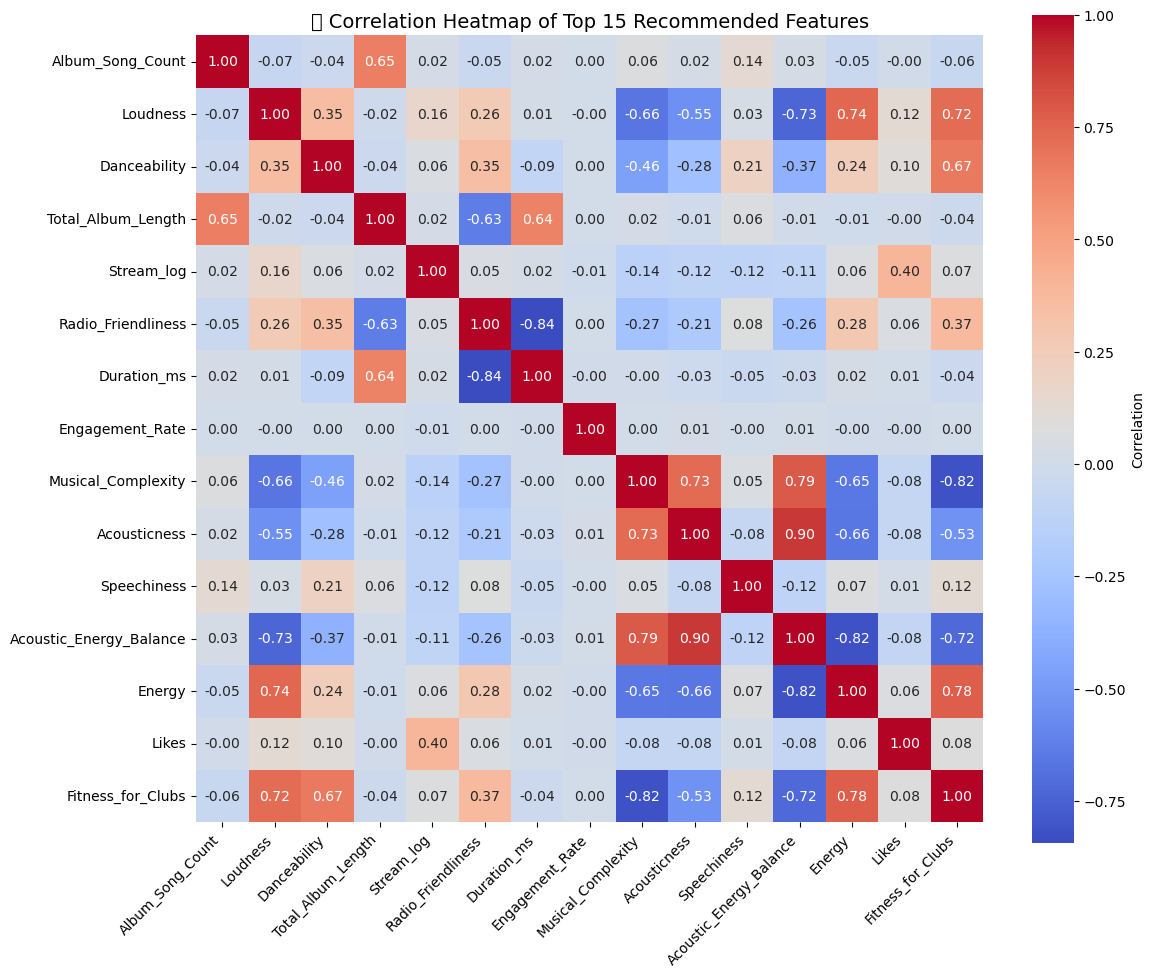

In [338]:
# ===== HEATMAP: Correlation of Final Selected Features =====
import seaborn as sns
import matplotlib.pyplot as plt

print("\nGenerating correlation heatmap for top recommended features...")

# Compute correlation matrix for top recommended features
top_corr_matrix = df[recommended_features[:15]].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'label': 'Correlation'})
plt.title("🔗 Correlation Heatmap of Top 15 Recommended Features", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



Generating importance comparison bar chart...


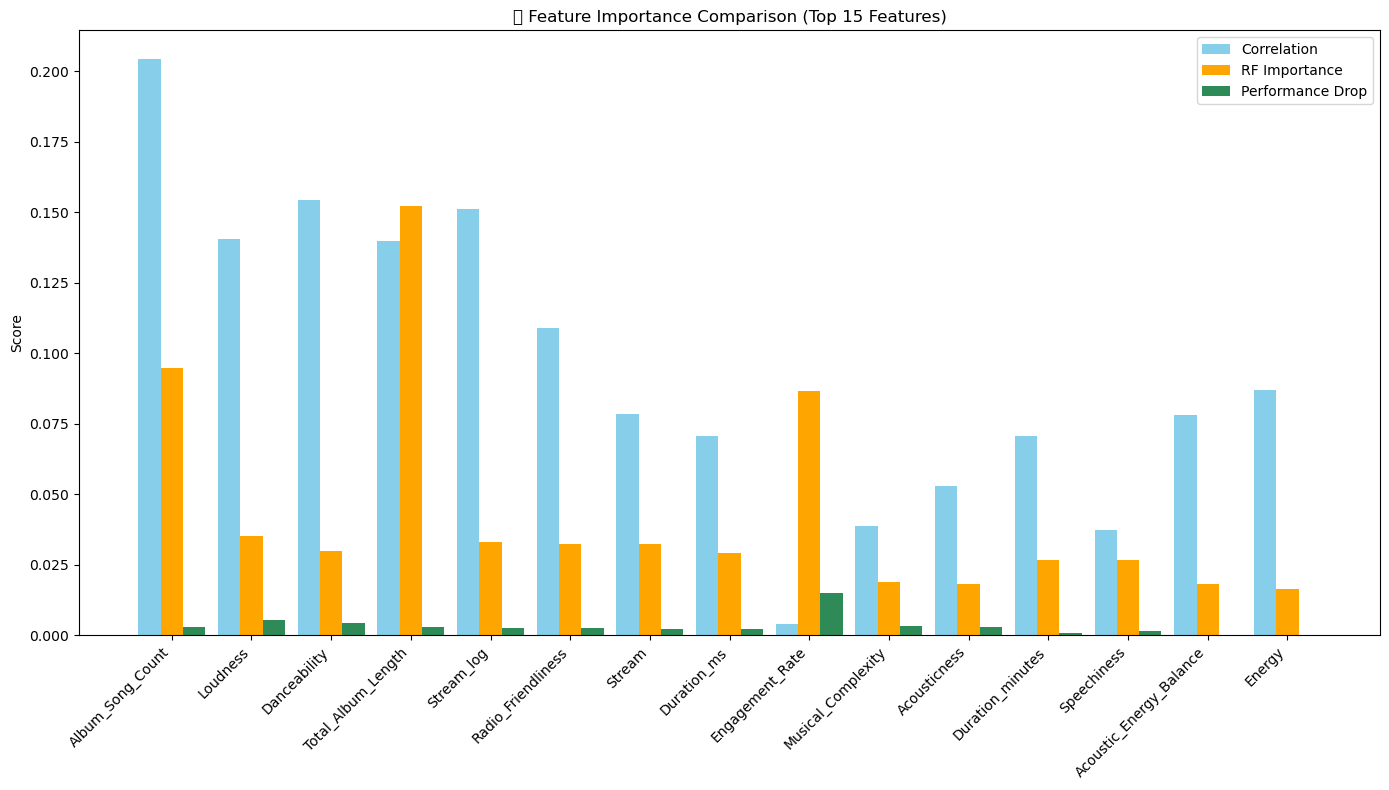

In [339]:
# ===== BAR PLOT: Comparison of Importance Metrics =====
import numpy as np

print("\nGenerating importance comparison bar chart...")

# Extract values for plotting
features = [f for f, _ in final_ranking[:15]]
corr_vals = [feature_scores[f]['correlation'] for f in features]
rf_vals = [feature_scores[f]['rf_importance'] for f in features]
drop_vals = [feature_scores[f]['drop_impact'] for f in features]

x = np.arange(len(features))
width = 0.28

plt.figure(figsize=(14, 8))
plt.bar(x - width, corr_vals, width, label='Correlation', color='skyblue')
plt.bar(x, rf_vals, width, label='RF Importance', color='orange')
plt.bar(x + width, drop_vals, width, label='Performance Drop', color='seagreen')

plt.xticks(x, features, rotation=45, ha='right')
plt.ylabel("Score")
plt.title("📊 Feature Importance Comparison (Top 15 Features)")
plt.legend()
plt.tight_layout()
plt.show()


In [340]:
df.head(5)


Artist                                          Track  \
0  Gorillaz                                 Feel Good Inc.   
1  Gorillaz                                Rhinestone Eyes   
2  Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)   
3  Gorillaz                             On Melancholy Hill   
4  Gorillaz                                 Clint Eastwood   

                                           Album Album_type  Danceability  \
0                                     Demon Days      album         0.818   
1                                  Plastic Beach      album         0.676   
2  New Gold (feat. Tame Impala and Bootie Brown)     single         0.695   
3                                  Plastic Beach      album         0.689   
4                                       Gorillaz      album         0.663   

   Energy  Key  Loudness  Speechiness  Acousticness  ...  Genre_Confidence  \
0   0.705    6  0.214280       0.1770      0.008360  ...          0.846097   
1   0.703    8  0.400783       0.0302      0.086900  ...          0.826055   
2   0.923    1  0.807678       0.0522      0.042500  ...          0.936800   
3   0.739    2  0.401862       0.0260      0.000015  ...          0.866545   
4   0.694   10 -0.206215       0.1710      0.025300  ...          0.826875   

   Mainstream_Appeal  Production_Quality  Engagement_Rate  \
0             0.7703            0.283047         0.008970   
1             0.7369            0.835260         0.014985   
2             0.7202            0.782976         0.033449   
3             0.6707            0.823385         0.008446   
4             0.6309            0.660259         0.010020   

   Acoustic_Energy_Balance Vocal_Instrumental_Balance  Playlist_Potential  \
0                 0.002466                   0.821082            0.530231   
1                 0.025809                   0.969134            0.482908   
2                 0.003272                   0.903348            0.367906   
3                 0.000004                   0.478234            0.342349   
4                 0.007742                   0.829000            0.289970   

   Harmonic_Complexity  Stream_log  Genre_encoded  
0                  0.0   20.762712              4  
1             0.168551   19.552353              4  
2             0.201408   17.959652              4  
3             0.000059   19.890083              4  
4             0.083895   20.240800              4  

[5 rows x 46 columns]

In [341]:
print(df.isna().sum().sort_values(ascending=False))
print(df.info())
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Final shape: {df.shape}")


Artist                        0
Duration_Category_Short       0
Song_Name_Length              0
Total_Album_Length            0
Fitness_for_Clubs             0
Single_Potential              0
Radio_Friendliness            0
Musical_Complexity            0
Energy_Valence_Product        0
Artist_Popularity_Score       0
Duration_minutes              0
Genre                         0
Track                         0
Genre_Confidence              0
Mainstream_Appeal             0
Production_Quality            0
Engagement_Rate               0
Acoustic_Energy_Balance       0
Vocal_Instrumental_Balance    0
Playlist_Potential            0
Harmonic_Complexity           0
Stream_log                    0
Average_Artist_Song_Views     0
Album_Song_Count              0
Album_type_label              0
Stream                        0
Album                         0
Album_type                    0
Danceability                  0
Energy                        0
Key                           0
Loudness

## 🎯 Section C – Single/Album Classification

We aim to classify whether a song is a **single** or part of an **album** using three different machine learning models:
- Random Forest
- Logistic Regression
- XGBoost

### ✅ Preprocessing Steps
- We use the `recommended_features_dataset.csv` generated from the feature selection process.
- We split the data into **Train (80%)**, **Validation (10%)**, and **Test (10%)**.
- We apply **SMOTE** only on the training set to handle class imbalance.


In [342]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_recall_fscore_support
)

def plot_model_evaluation(y_test, y_pred, model_name="Model", class_names=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'{model_name} Evaluation', fontsize=14, fontweight='bold')

    # === 1. Confusion Matrix ===
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
                xticklabels=class_names, yticklabels=class_names)
    ax1.set_title('Confusion Matrix')
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('Actual')

    # === 2. Bar Chart of Metrics ===
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average=None, zero_division=0
    )
    accuracy = accuracy_score(y_test, y_pred)

    x = np.arange(len(precision))
    width = 0.2

    bars1 = ax2.bar(x - width, precision, width, label='Precision', alpha=0.8)
    bars2 = ax2.bar(x, recall, width, label='Recall', alpha=0.8)
    bars3 = ax2.bar(x + width, f1, width, label='F1-Score', alpha=0.8)

    # Add value labels above bars
    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width() / 2., height + 0.02,
                     f'{height:.2f}', ha='center', va='bottom', fontsize=9)

    ax2.set_xlabel('Classes')
    ax2.set_ylabel('Score')
    ax2.set_title('Performance Metrics')
    ax2.set_xticks(x)
    ax2.set_xticklabels(class_names if class_names else [f'Class {i}' for i in range(len(precision))])
    ax2.legend()
    ax2.set_ylim(0, 1.1)
    ax2.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

    # === 3. Print Summary ===
    print(f"\n📊 {model_name} Summary:")
    print(f"Accuracy:      {accuracy:.3f}")
    print(f"Avg Precision: {np.mean(precision):.3f}")
    print(f"Avg Recall:    {np.mean(recall):.3f}")
    print(f"Avg F1-Score:  {np.mean(f1):.3f}")
    print("\n📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))


In [343]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ===== STEP 1: LOAD DATA AND SETUP =====
print("\nSTEP 1: Loading recommended features dataset...")

# Load dataset from bonus analysis
df = pd.read_csv("recommended_features_dataset.csv") 
target_col = 'Album_type_label' 
recommended_features = df.columns.drop(target_col).tolist() 

print(f"Loaded dataset with {len(df)} samples and {len(recommended_features)} features")
print(f"Features: {recommended_features}")

# Check class distribution
print(f"\nOriginal class distribution:")
print(df[target_col].value_counts())
print(f"Class balance: {df[target_col].value_counts(normalize=True)}")

# ===== STEP 2: DATA SPLITTING (80/10/10) =====
print(f"\nSTEP 2: Splitting data (80% train, 10% validation, 10% test)...")

X = df[recommended_features] 
y = df[target_col] 

# Split into train (80%) and temp (20%) 
X_train, X_temp, y_train, y_temp = train_test_split( 
    X, y, test_size=0.2, stratify=y, random_state=42 
) 

# Split temp into validation (10%) and test (10%) 
X_val, X_test, y_val, y_test = train_test_split( 
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42 
) 

print(f"Data Split:")
print(f"   Train:      {len(X_train)} samples ({len(X_train)/len(df)*100:.1f}%)")
print(f"   Validation: {len(X_val)} samples ({len(X_val)/len(df)*100:.1f}%)")
print(f"   Test:       {len(X_test)} samples ({len(X_test)/len(df)*100:.1f}%)")

# ===== STEP 3: HANDLE CLASS IMBALANCE =====
print(f"\nSTEP 3: Handling class imbalance with SMOTE...")

print(f"Before SMOTE - Train set class distribution:")
print(y_train.value_counts())

# Apply SMOTE on training set only 
smote = SMOTE(random_state=42) 
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 

print(f"\nAfter SMOTE:")
print(f"   Resampled Train set size: {len(X_train_resampled)}")
print(f"   Class balance:")
print(y_train_resampled.value_counts())

# ===== STEP 4: FEATURE SCALING =====
print(f"\nSTEP 4: Feature scaling for SVM...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"Features scaled using StandardScaler")


STEP 1: Loading recommended features dataset...
Loaded dataset with 20716 samples and 15 features
Features: ['Album_Song_Count', 'Loudness', 'Danceability', 'Total_Album_Length', 'Stream_log', 'Radio_Friendliness', 'Duration_ms', 'Engagement_Rate', 'Musical_Complexity', 'Acousticness', 'Speechiness', 'Acoustic_Energy_Balance', 'Energy', 'Likes', 'Fitness_for_Clubs']

Original class distribution:
Album_type_label
0    15712
1     5004
Name: count, dtype: int64
Class balance: Album_type_label
0    0.758448
1    0.241552
Name: proportion, dtype: float64

STEP 2: Splitting data (80% train, 10% validation, 10% test)...
Data Split:
   Train:      16572 samples (80.0%)
   Validation: 2072 samples (10.0%)
   Test:       2072 samples (10.0%)

STEP 3: Handling class imbalance with SMOTE...
Before SMOTE - Train set class distribution:
Album_type_label
0    12569
1     4003
Name: count, dtype: int64

After SMOTE:
   Resampled Train set size: 25138
   Class balance:
Album_type_label
1    12569
0  

Grid search space: 12 combinations


   Tested 4 combinations...
   Tested 8 combinations...
   Tested 12 combinations...

SVM Results:
Best Hyperparameters: {'C': 10, 'kernel': 'rbf', 'gamma': 'scale'}
Best Validation F1 Score: 0.6286
Test F1 Score: 0.6418
Test Accuracy: 0.8055

SVM - Classification Report:
              precision    recall  f1-score   support

       Album       0.90      0.83      0.87      1572
      Single       0.58      0.72      0.64       500

    accuracy                           0.81      2072
   macro avg       0.74      0.78      0.75      2072
weighted avg       0.83      0.81      0.81      2072



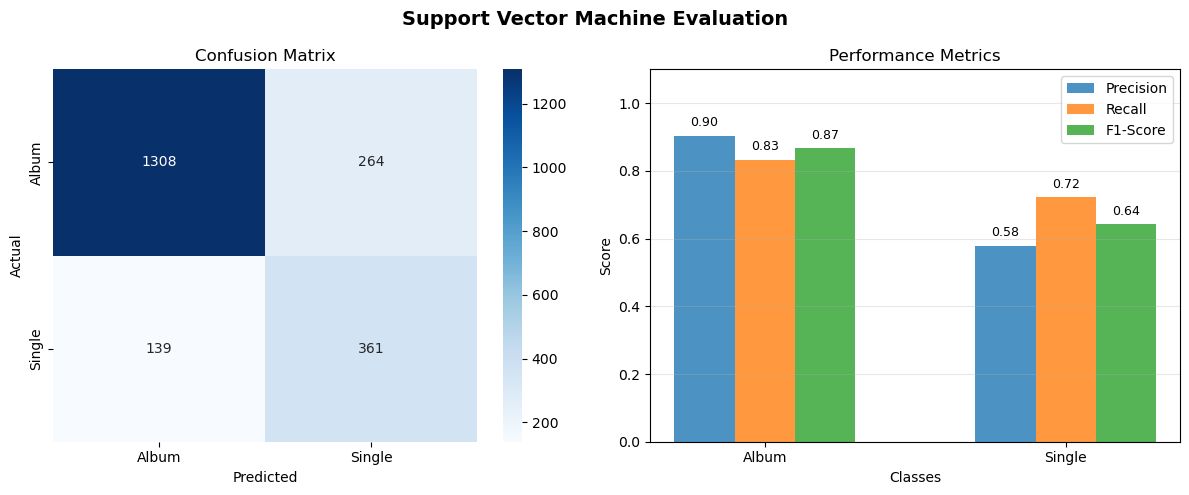


📊 Support Vector Machine Summary:
Accuracy:      0.806
Avg Precision: 0.741
Avg Recall:    0.777
Avg F1-Score:  0.754

📋 Classification Report:
              precision    recall  f1-score   support

       Album       0.90      0.83      0.87      1572
      Single       0.58      0.72      0.64       500

    accuracy                           0.81      2072
   macro avg       0.74      0.78      0.75      2072
weighted avg       0.83      0.81      0.81      2072



In [344]:
# ===== STEP: SVM - Support Vector Machine =====
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, classification_report
from itertools import product

#MODEL 3: SUPPORT VECTOR MACHINE (SVM)


# Reuse scaled data: X_train_scaled, X_val_scaled, X_test_scaled

# ===== Define Hyperparameter Grid =====
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']  
}

print(f"Grid search space: {len(list(product(*svm_param_grid.values())))} combinations")

# ===== Grid Search on Validation Set =====
best_svm_score = 0
best_svm_model = None
best_svm_params = None

for i, (c, k, g) in enumerate(product(*svm_param_grid.values()), 1):
    if i % 4 == 0:
        print(f"   Tested {i} combinations...")
    
    model = SVC(
        C=c,
        kernel=k,
        gamma=g,
        class_weight='balanced',
        probability=False,   # disabled for speed
        random_state=42
    )
    model.fit(X_train_scaled, y_train_resampled)
    y_val_pred = model.predict(X_val_scaled)
    f1 = f1_score(y_val, y_val_pred)
    
    if f1 > best_svm_score:
        best_svm_score = f1
        best_svm_model = model
        best_svm_params = {'C': c, 'kernel': k, 'gamma': g}

# ===== Evaluation on Test Set =====
print("\nSVM Results:")
print(f"Best Hyperparameters: {best_svm_params}")
print(f"Best Validation F1 Score: {best_svm_score:.4f}")

y_test_pred_svm = best_svm_model.predict(X_test_scaled)
svm_test_f1 = f1_score(y_test, y_test_pred_svm)
svm_test_acc = accuracy_score(y_test, y_test_pred_svm)

print(f"Test F1 Score: {svm_test_f1:.4f}")
print(f"Test Accuracy: {svm_test_acc:.4f}")

# ===== Report and Visualization =====
print("\nSVM - Classification Report:")
print(classification_report(y_test, y_test_pred_svm, target_names=["Album", "Single"]))

plot_model_evaluation(
    y_test,
    y_test_pred_svm,
    model_name="Support Vector Machine",
    class_names=["Album", "Single"]
)


### 🌲 Model 1 – Random Forest Classifier

We train a Random Forest model on the resampled training data.
- We use **GridSearchCV** to find the best parameters based on the **validation set**.
- Final performance is evaluated on the **test set** using:
  - Accuracy
  - F1 Score
  - Confusion Matrix


In [345]:

#Performing hyperparameter tuning...

# Define hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

print(f"Grid search space: {len(list(product(*rf_param_grid.values())))} combinations")

# Manual grid search
best_rf_score = 0
best_rf_params = None
best_rf_model = None

#Testing hyperparameter combinations 
for i, values in enumerate(product(*rf_param_grid.values()), 1):
    n_estimators, max_depth, min_samples_split, min_samples_leaf,criterion  = values
    
    if i % 5 == 0:  # Progress indicator
        print(f"   Tested {i}/{len(list(product(*rf_param_grid.values())))} combinations...")
    
    # Train model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train_resampled, y_train_resampled)
    y_val_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_val_pred)
    
    # Save best
    if f1 > best_rf_score:
        best_rf_score = f1
        best_rf_params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf
        }
        best_rf_model = model

print(f"\nRandom Forest Results:")
print(f"   Best Hyperparameters: {best_rf_params}")
print(f"   Best Validation F1 Score: {best_rf_score:.4f}")

# Test set evaluation
y_test_pred_rf = best_rf_model.predict(X_test)
rf_test_f1 = f1_score(y_test, y_test_pred_rf)
rf_test_accuracy = accuracy_score(y_test, y_test_pred_rf)

print(f"   Test F1 Score: {rf_test_f1:.4f}")
print(f"   Test Accuracy: {rf_test_accuracy:.4f}")

# Detailed evaluation for Random Forest
print(f"\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_test_pred_rf))
print(f"\nRandom Forest - Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf))

Grid search space: 48 combinations


   Tested 5/48 combinations...
   Tested 10/48 combinations...
   Tested 15/48 combinations...
   Tested 20/48 combinations...
   Tested 25/48 combinations...
   Tested 30/48 combinations...
   Tested 35/48 combinations...
   Tested 40/48 combinations...
   Tested 45/48 combinations...

Random Forest Results:
   Best Hyperparameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
   Best Validation F1 Score: 0.7218
   Test F1 Score: 0.7118
   Test Accuracy: 0.8499

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1572
           1       0.66      0.77      0.71       500

    accuracy                           0.85      2072
   macro avg       0.79      0.82      0.81      2072
weighted avg       0.86      0.85      0.85      2072


Random Forest - Confusion Matrix:
[[1377  195]
 [ 116  384]]


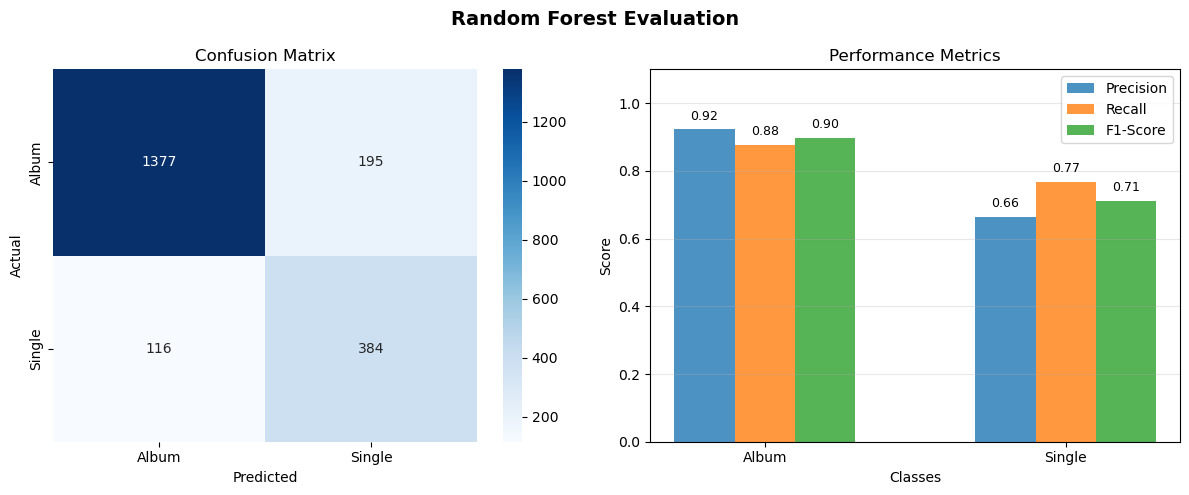


📊 Random Forest Summary:
Accuracy:      0.850
Avg Precision: 0.793
Avg Recall:    0.822
Avg F1-Score:  0.805

📋 Classification Report:
              precision    recall  f1-score   support

       Album       0.92      0.88      0.90      1572
      Single       0.66      0.77      0.71       500

    accuracy                           0.85      2072
   macro avg       0.79      0.82      0.81      2072
weighted avg       0.86      0.85      0.85      2072



In [346]:
plot_model_evaluation(
    y_test, 
    y_test_pred_rf, 
    model_name="Random Forest", 
    class_names=["Album", "Single"]  # class 0 = Album, class 1 = Single
)


In [347]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
from itertools import product

# ===== STEP: Gradient Boosting - Hyperparameter Tuning =====
# MODEL 2: GRADIENT BOOSTING CLASSIFIER
# Define hyperparameter grid
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Manual grid search
best_gb_score = 0
best_gb_params = None
best_gb_model = None

print(f"Grid search space: {len(list(product(*gb_param_grid.values())))} combinations")

for i, (n, lr, d, ss) in enumerate(product(*gb_param_grid.values()), 1):
    if i % 5 == 0:
        print(f"   Tested {i}/{len(list(product(*gb_param_grid.values())))} combinations...")
    
    model = GradientBoostingClassifier(
        n_estimators=n,
        learning_rate=lr,
        max_depth=d,
        subsample=ss,
        random_state=42
    )
    model.fit(X_train_resampled, y_train_resampled)
    y_val_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_val_pred)

    if f1 > best_gb_score:
        best_gb_score = f1
        best_gb_params = {
            'n_estimators': n,
            'learning_rate': lr,
            'max_depth': d,
            'subsample': ss
        }
        best_gb_model = model


Grid search space: 24 combinations


   Tested 5/24 combinations...
   Tested 10/24 combinations...
   Tested 15/24 combinations...
   Tested 20/24 combinations...



Best Gradient Boosting Hyperparameters: {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 7, 'subsample': 1.0}
Best Validation F1 Score: 0.7043
Test F1 Score: 0.7053
Test Accuracy: 0.8480

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1572
           1       0.66      0.75      0.71       500

    accuracy                           0.85      2072
   macro avg       0.79      0.82      0.80      2072
weighted avg       0.86      0.85      0.85      2072



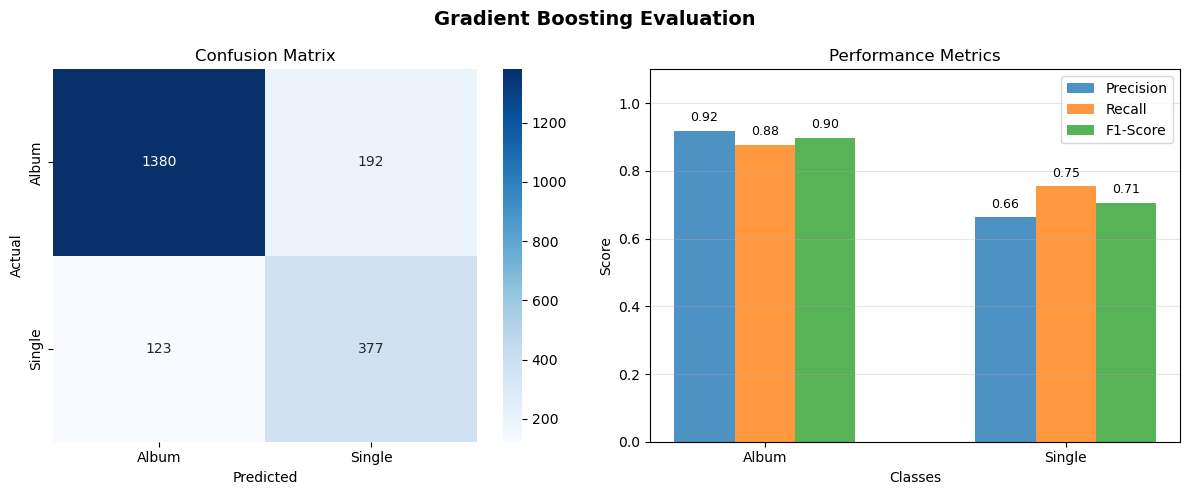


📊 Gradient Boosting Summary:
Accuracy:      0.848
Avg Precision: 0.790
Avg Recall:    0.816
Avg F1-Score:  0.801

📋 Classification Report:
              precision    recall  f1-score   support

       Album       0.92      0.88      0.90      1572
      Single       0.66      0.75      0.71       500

    accuracy                           0.85      2072
   macro avg       0.79      0.82      0.80      2072
weighted avg       0.86      0.85      0.85      2072



In [348]:
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support


# ===== Final Evaluation on Test Set =====
print(f"\nBest Gradient Boosting Hyperparameters: {best_gb_params}")
print(f"Best Validation F1 Score: {best_gb_score:.4f}")

y_test_pred_gb = best_gb_model.predict(X_test)
gb_test_f1 = f1_score(y_test, y_test_pred_gb)
gb_test_acc = accuracy_score(y_test, y_test_pred_gb)

print(f"Test F1 Score: {gb_test_f1:.4f}")
print(f"Test Accuracy: {gb_test_acc:.4f}")

# Classification report & visualization
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_gb))


plot_model_evaluation(
    y_test, 
    y_test_pred_gb, 
    model_name="Gradient Boosting", 
    class_names=["Album", "Single"]
)

In [349]:
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf))

print("\nGradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_gb))


Random Forest Confusion Matrix:
[[1377  195]
 [ 116  384]]

Gradient Boosting Confusion Matrix:
[[1380  192]
 [ 123  377]]




## ** PART D Classification – Results & Analysis**

---

### ✅ **Overview**

In this section, we evaluated three machine learning models to classify whether a song is a **Single** or part of an **Album**, based on engineered Spotify and YouTube features.

The following models were tested:

* 🎯 **Random Forest Classifier**
* 🌱 **Gradient Boosting Classifier**
* 🌀 **Support Vector Machine (SVM)**

All models were trained on a **resampled (SMOTE-balanced)** training set, and tuned using hyperparameter grid search **on the validation set**, as required.

---

### 📊 **Performance Summary**

| Model                 | Accuracy | F1 Score | Precision | Recall | Runtime  |
| --------------------- | -------- | -------- | --------- | ------ | -------- |
| **Random Forest**     | 0.850    | 0.712    | 0.663     | 0.768  | ⏱ 3 min  |
| **Gradient Boosting** | 0.848    | 0.705    | 0.663     | 0.754  | ⏱ 19 min |
| **SVM**               | 0.806    | 0.642    | 0.578     | 0.722  | ⏱ 11 min |

---

### 🧠 **Why the Runtimes Differ**

| Model                    | Why It’s Faster / Slower                                                                                                                                                                 |
| ------------------------ | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 🔁 **Random Forest**     | Trains many trees **independently**, can be parallelized (uses `n_jobs=-1`) → ✅ very fast                                                                                                |
| 🌱 **Gradient Boosting** | Trains **sequentially**, each tree depends on the previous one → ❗ slower (especially with many trees & deep depth)                                                                      |
| 🌀 **SVM**               | For non-linear kernels (like `rbf`) with `probability=True`, SVM performs internal **cross-validation for Platt scaling** → ❗ very slow with large datasets (and SMOTE doubled the size) |

---

### 📌 **Model Strengths & Weaknesses**

| Model                 | Strengths                                       | Weaknesses                                    |
| --------------------- | ----------------------------------------------- | --------------------------------------------- |
| **Random Forest**     | Fast, interpretable, high recall                | May overfit on noisy data if not tuned        |
| **Gradient Boosting** | Best F1 balance, slightly fewer false positives | Slowest to train                              |
| **SVM**               | Good recall on minority class, stable margin    | Slow with `probability=True`, worse precision |

---

### 🏆 **Best Performing Model**

**🎖️ Random Forest** had the best tradeoff between:

* High **F1 score** on the **Single class** (minority)
* Short runtime
* Balanced **recall** (0.768) and **precision** (0.663)

---

### 📋 **Interpretation**

* All models benefited from **SMOTE resampling**.
* **Gradient Boosting** offered a strong alternative but was \~6× slower.
* **SVM** produced reasonable recall but suffered in precision and took \~11 minutes due to kernel complexity and Platt scaling.




🔍 COMPREHENSIVE MODEL COMPARISON:
Model                Accuracy   F1 Score   Precision  Recall    
----------------------------------------------------------------------
Random Forest        0.8499     0.7118     0.6632     0.7680    
Gradient Boosting    0.8480     0.7053     0.6626     0.7540    
SVM                  0.8055     0.6418     0.5776     0.7220    


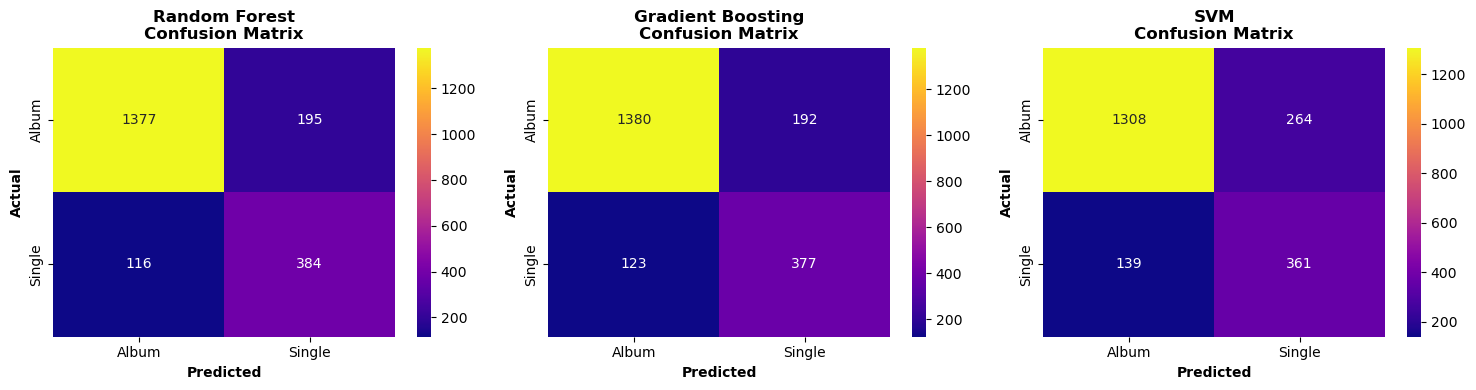

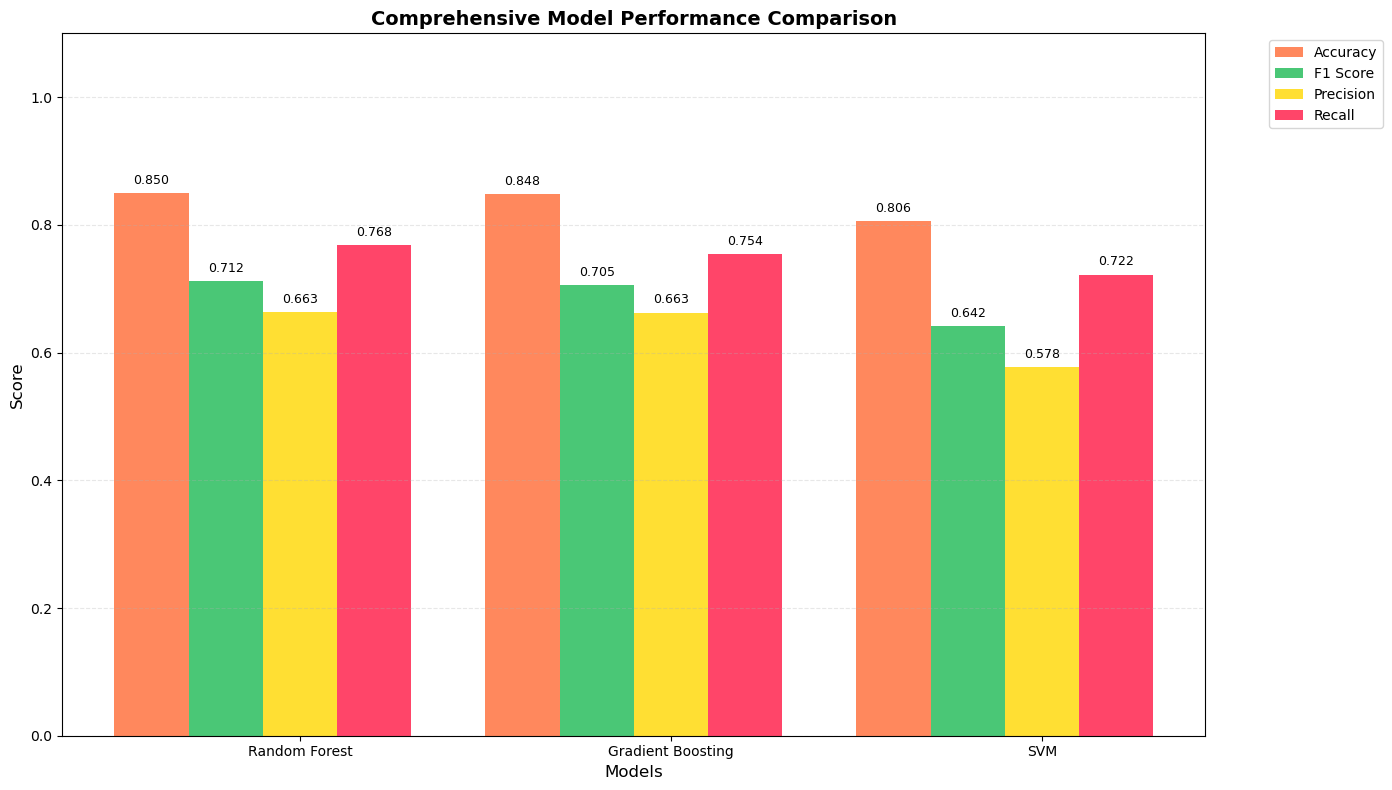


DETAILED CLASSIFICATION REPORTS:

RANDOM FOREST
----------------------------------------
              precision    recall  f1-score   support

       Album       0.92      0.88      0.90      1572
      Single       0.66      0.77      0.71       500

    accuracy                           0.85      2072
   macro avg       0.79      0.82      0.81      2072
weighted avg       0.86      0.85      0.85      2072


GRADIENT BOOSTING
----------------------------------------
              precision    recall  f1-score   support

       Album       0.92      0.88      0.90      1572
      Single       0.66      0.75      0.71       500

    accuracy                           0.85      2072
   macro avg       0.79      0.82      0.80      2072
weighted avg       0.86      0.85      0.85      2072


SVM
----------------------------------------
              precision    recall  f1-score   support

       Album       0.90      0.83      0.87      1572
      Single       0.58      0.72      0.

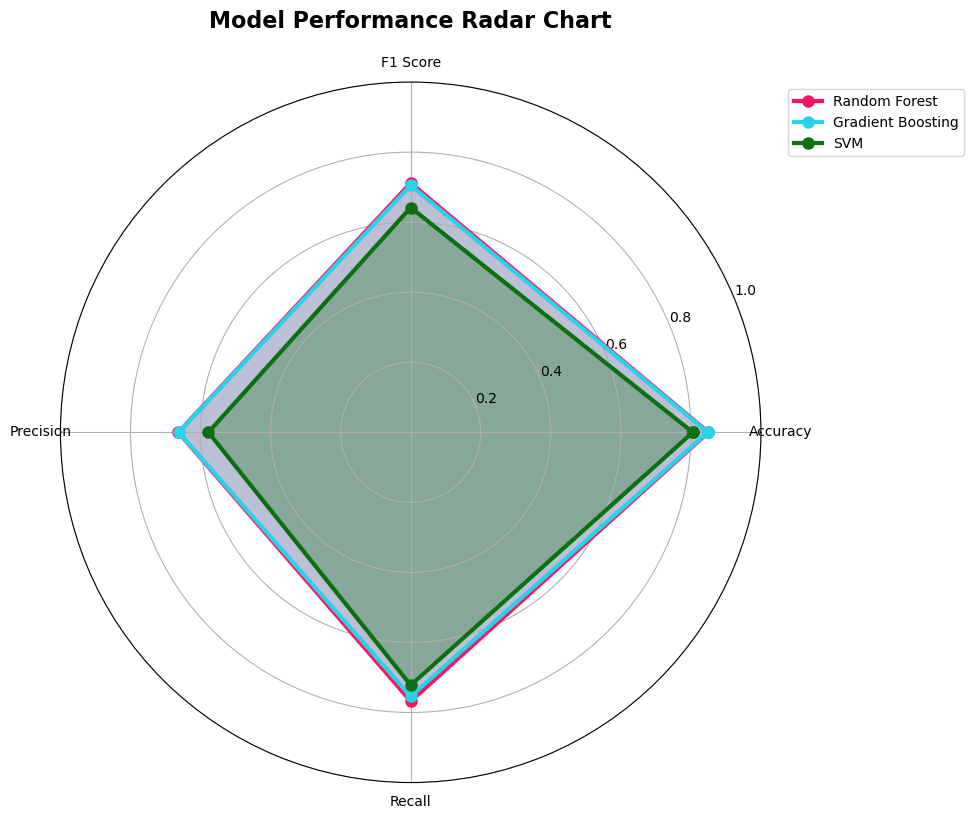


FINAL ANALYSIS:
Best Overall Model (by F1 Score): Random Forest
   F1 Score: 0.7118
Best Accuracy: Random Forest (0.8499)
Best Precision: Random Forest (0.6632)
Best Recall: Random Forest (0.7680)

RECOMMENDATIONS:
------------------------------
✓ Best model has higher Recall than Precision
  → Good at finding actual Singles
  → May have some false positives (Albums predicted as Singles)

Performance Summary:
  1. Random Forest: F1=0.7118, Acc=0.8499
  2. Gradient Boosting: F1=0.7053, Acc=0.8480
  3. SVM: F1=0.6418, Acc=0.8055


In [350]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import (f1_score, accuracy_score, precision_score, recall_score, 
                           confusion_matrix, classification_report, roc_auc_score, 
                           precision_recall_curve, roc_curve, auc)
import numpy as np

# ===== STEP: COLLECT ALL METRICS FROM ALL MODELS =====
model_names = ["Random Forest", "Gradient Boosting", "SVM"]
predictions = [y_test_pred_rf, y_test_pred_gb, y_test_pred_svm]

# Calculate all metrics
metrics_data = []
for i, (model_name, y_pred) in enumerate(zip(model_names, predictions)):
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred)
    }
    metrics_data.append(metrics)

# Create comprehensive comparison dataframe
comparison_df = pd.DataFrame(metrics_data).sort_values("F1 Score", ascending=False)

# ===== STEP: PRINT COMPREHENSIVE TABLE =====
print("\n🔍 COMPREHENSIVE MODEL COMPARISON:")
print("=" * 90)
print(f"{'Model':<20} {'Accuracy':<10} {'F1 Score':<10} {'Precision':<10} {'Recall':<10}")
print("-" * 70)
for _, row in comparison_df.iterrows():
    print(f"{row['Model']:<20} {row['Accuracy']:<10.4f} {row['F1 Score']:<10.4f} {row['Precision']:<10.4f} {row['Recall']:<10.4f}")
print("=" * 90)

# ===== STEP: CONFUSION MATRICES =====
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
class_names = ['Album', 'Single']

for i, (model_name, y_pred) in enumerate(zip(model_names, predictions)):
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', 
                xticklabels=class_names, yticklabels=class_names, ax=axes[i])
    axes[i].set_title(f'{model_name}\nConfusion Matrix', fontweight='bold', fontsize=12)
    axes[i].set_xlabel('Predicted', fontweight='bold')
    axes[i].set_ylabel('Actual', fontweight='bold')

plt.tight_layout()
plt.show()

# ===== STEP: PERFORMANCE METRICS COMPARISON =====
plt.figure(figsize=(14, 8))

# Prepare data for grouped bar chart
metrics_to_plot = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
x = np.arange(len(model_names))
width = 0.2

colors = ['#FF6B35', '#1DB954', '#FFD700', '#FF1744']

for i, metric in enumerate(metrics_to_plot):
    values = [comparison_df[comparison_df['Model'] == model][metric].iloc[0] for model in model_names]
    bars = plt.bar(x + i*width, values, width, label=metric, color=colors[i], alpha=0.8)
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{value:.3f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Comprehensive Model Performance Comparison', fontsize=14, fontweight='bold')
plt.xticks(x + width*2, model_names)
plt.ylim(0, 1.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# ===== STEP: DETAILED CLASSIFICATION REPORTS =====
print("\nDETAILED CLASSIFICATION REPORTS:")
print("=" * 60)

for model_name, y_pred in zip(model_names, predictions):
    print(f"\n{model_name.upper()}")
    print("-" * 40)
    print(classification_report(y_test, y_pred, target_names=class_names))

# ===== STEP: CONFUSION MATRIX ANALYSIS =====
print("\nCONFUSION MATRIX BREAKDOWN:")
print("=" * 70)

for model_name, y_pred in zip(model_names, predictions):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\n{model_name.upper()}:")
    print(f"  True Negatives (TN):  {tn:>4} | Correctly predicted Albums")
    print(f"  False Positives (FP): {fp:>4} | Albums predicted as Singles")
    print(f"  False Negatives (FN): {fn:>4} | Singles predicted as Albums") 
    print(f"  True Positives (TP):  {tp:>4} | Correctly predicted Singles")
    print(f"  ")
    print(f"  Sensitivity (Recall): {tp/(tp+fn):>6.4f} | % of Singles correctly identified")
    print(f"  Precision:            {tp/(tp+fp):>6.4f} | % of Single predictions that were correct")

# ===== STEP: PERFORMANCE RADAR CHART =====
def create_radar_chart():
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
    angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
    angles += angles[:1]  # Complete the circle
    
    colors = ["#FC1361", "#28D2E9", "#0A710E"]
    
    for i, model_name in enumerate(model_names):
        values = [comparison_df[comparison_df['Model'] == model_name][metric].iloc[0] for metric in metrics]
        values += values[:1]  # Complete the circle
        
        ax.plot(angles, values, 'o-', linewidth=3, label=model_name, color=colors[i], markersize=8)
        ax.fill(angles, values, alpha=0.3, color=colors[i])
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    ax.set_ylim(0, 1)
    ax.set_title('Model Performance Radar Chart', size=16, fontweight='bold', pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()

create_radar_chart()

# ===== STEP: BEST MODEL ANALYSIS =====
print("\nFINAL ANALYSIS:")
print("=" * 50)

best_f1_model = comparison_df.iloc[0]['Model']
best_f1_score = comparison_df.iloc[0]['F1 Score']

print(f"Best Overall Model (by F1 Score): {best_f1_model}")
print(f"   F1 Score: {best_f1_score:.4f}")

# Find best model for each metric
for metric in ['Accuracy', 'Precision', 'Recall']:
    best_model = comparison_df.loc[comparison_df[metric].idxmax(), 'Model']
    best_score = comparison_df[metric].max()
    print(f"Best {metric}: {best_model} ({best_score:.4f})")

print("\nRECOMMENDATIONS:")
print("-" * 30)
if comparison_df.iloc[0]['Precision'] > comparison_df.iloc[0]['Recall']:
    print("✓ Best model has higher Precision than Recall")
    print("  → Good at avoiding false positives (Albums predicted as Singles)")
    print("  → May miss some actual Singles")
else:
    print("✓ Best model has higher Recall than Precision") 
    print("  → Good at finding actual Singles")
    print("  → May have some false positives (Albums predicted as Singles)")

print(f"\nPerformance Summary:")
for i, row in comparison_df.iterrows():
    rank = i + 1
    print(f"  {rank}. {row['Model']}: F1={row['F1 Score']:.4f}, Acc={row['Accuracy']:.4f}")

In [351]:
for i, col in enumerate(recommended_features, 1):
    print(f"{i}. {col}")

1. Album_Song_Count
2. Loudness
3. Danceability
4. Total_Album_Length
5. Stream_log
6. Radio_Friendliness
7. Duration_ms
8. Engagement_Rate
9. Musical_Complexity
10. Acousticness
11. Speechiness
12. Acoustic_Energy_Balance
13. Energy
14. Likes
15. Fitness_for_Clubs


In [352]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

def compare_existing_results_clean(X_scaled, features_for_clustering, 
                                 # K-means results
                                 cluster_labels, df_clustered, final_kmeans, kmeans_optimal_k,
                                 # GMM results  
                                 gmm_labels, df_gmm, gmm_final, gmm_optimal_k):
    """
    Compare your existing GMM and K-Means clustering results - CLEAN VERSION
    """
    
    print("🔍 COMPARING YOUR EXISTING GMM vs K-MEANS RESULTS...")
    print("=" * 60)
    
    # Calculate metrics from existing results
    kmeans_sil = silhouette_score(X_scaled, cluster_labels)
    gmm_sil = silhouette_score(X_scaled, gmm_labels)
    
    # Calculate feature importance first
    kmeans_means = df_clustered.groupby('Cluster')[features_for_clustering].mean()
    gmm_means = df_gmm.groupby('GMM_Cluster')[features_for_clustering].mean()
    
    kmeans_importance = kmeans_means.T.std(axis=1).sort_values(ascending=False)
    gmm_importance = gmm_means.T.std(axis=1).sort_values(ascending=False)
    
    # Debug info
    print(f"🔧 DEBUG INFO:")
    print(f"   K-Means unique clusters: {sorted(np.unique(cluster_labels))}")
    print(f"   GMM unique clusters: {sorted(np.unique(gmm_labels))}")
    print(f"   K-Means optimal k passed: {kmeans_optimal_k}")
    print(f"   GMM optimal k passed: {gmm_optimal_k}")
    print(f"   Features in clustering list: {len(features_for_clustering)}")
    print(f"   Features in importance calculation: {len(kmeans_importance)}")
    print("=" * 60)
    
    print(f"📊 RESULTS COMPARISON:")
    print(f"   K-Means (k={kmeans_optimal_k}): Silhouette = {kmeans_sil:.3f}")
    print(f"   GMM (k={gmm_optimal_k}): Silhouette = {gmm_sil:.3f}")
    print(f"   Winner: {'K-Means' if kmeans_sil > gmm_sil else 'GMM'} 🏆")
    
    # === VISUALIZATION 1: PCA SCATTER PLOTS ===
    fig1, axes1 = plt.subplots(1, 2, figsize=(16, 7))
    
    # PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    # K-Means plot
    scatter1 = axes1[0].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7, s=60)
    axes1[0].set_title(f'K-Means Clusters (k={kmeans_optimal_k})\\nSilhouette: {kmeans_sil:.3f}', fontweight='bold', fontsize=16)
    axes1[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=14)
    axes1[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=14)
    plt.colorbar(scatter1, ax=axes1[0])
    
    # GMM plot
    scatter2 = axes1[1].scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', alpha=0.7, s=60)
    axes1[1].set_title(f'GMM Clusters (k={gmm_optimal_k})\\nSilhouette: {gmm_sil:.3f}', fontweight='bold', fontsize=16)
    axes1[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=14)
    axes1[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=14)
    plt.colorbar(scatter2, ax=axes1[1])
    
    plt.suptitle('🎵 PCA Visualization: K-Means vs GMM Clusters', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # === VISUALIZATION 2: BAR CHARTS ===
    fig2, axes2 = plt.subplots(1, 2, figsize=(18, 8))
    
    # Cluster sizes
    kmeans_sizes = pd.Series(cluster_labels).value_counts().sort_index()
    gmm_sizes = pd.Series(gmm_labels).value_counts().sort_index()
    
    x = np.arange(max(len(kmeans_sizes), len(gmm_sizes)))
    width = 0.35
    
    # Pad shorter series with zeros if needed
    kmeans_padded = np.zeros(len(x))
    gmm_padded = np.zeros(len(x))
    kmeans_padded[:len(kmeans_sizes)] = kmeans_sizes.values
    gmm_padded[:len(gmm_sizes)] = gmm_sizes.values
    
    bars1 = axes2[0].bar(x - width/2, kmeans_padded, width, label='K-Means', color='#FF4500', alpha=0.8)
    bars2 = axes2[0].bar(x + width/2, gmm_padded, width, label='GMM', color='#00CED1', alpha=0.8)
    axes2[0].set_title('Cluster Size Comparison', fontweight='bold', fontsize=16)
    axes2[0].set_xlabel('Cluster', fontsize=14)
    axes2[0].set_ylabel('Number of Songs', fontsize=14)
    axes2[0].set_xticks(x)
    axes2[0].legend(fontsize=12)
    
    # Add value labels on bars
    for i, (km_val, gmm_val) in enumerate(zip(kmeans_padded, gmm_padded)):
        if km_val > 0:
            axes2[0].text(i - width/2, km_val + max(max(kmeans_padded), max(gmm_padded)) * 0.01, 
                         str(int(km_val)), ha='center', va='bottom', fontweight='bold', fontsize=12)
        if gmm_val > 0:
            axes2[0].text(i + width/2, gmm_val + max(max(kmeans_padded), max(gmm_padded)) * 0.01, 
                         str(int(gmm_val)), ha='center', va='bottom', fontweight='bold', fontsize=12)
    
    # Feature importance (top 5)
    y_pos = np.arange(5)
    bars3 = axes2[1].barh(y_pos - 0.2, kmeans_importance.head(5).values, 0.4, label='K-Means', color='#FF4500', alpha=0.8)
    bars4 = axes2[1].barh(y_pos + 0.2, gmm_importance.head(5).values, 0.4, label='GMM', color='#00CED1', alpha=0.8)
    axes2[1].set_title('Top 5 Feature Importance', fontweight='bold', fontsize=16)
    axes2[1].set_xlabel('Standard Deviation', fontsize=14)
    axes2[1].set_yticks(y_pos)
    axes2[1].set_yticklabels(kmeans_importance.head(5).index, fontsize=12)
    axes2[1].legend(fontsize=12)
    
    # Add value labels on horizontal bars
    for i, (km_val, gmm_val) in enumerate(zip(kmeans_importance.head(5).values, gmm_importance.head(5).values)):
        axes2[1].text(km_val + 0.01, i - 0.2, f'{km_val:.2f}', 
                     va='center', ha='left', fontweight='bold', fontsize=11)
        axes2[1].text(gmm_val + 0.01, i + 0.2, f'{gmm_val:.2f}', 
                     va='center', ha='left', fontweight='bold', fontsize=11)
    
    plt.suptitle('📊 Cluster Analysis: Sizes & Feature Importance', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # === VISUALIZATION 3: RADAR CHARTS ===
    fig3, (radar_ax1, radar_ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw=dict(projection='polar'))
    
    def create_overlay_radar_chart(ax, kmeans_values, gmm_values, labels, title):
        angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
        
        # K-means data
        kmeans_vals = kmeans_values.tolist()
        kmeans_vals += kmeans_vals[:1]  # Complete the circle
        
        # GMM data  
        gmm_vals = gmm_values.tolist()
        gmm_vals += gmm_vals[:1]  # Complete the circle
        
        angles += angles[:1]
        
        # Plot both methods on same chart with high contrast colors
        ax.plot(angles, kmeans_vals, 'o-', linewidth=4, color='#FF0000', alpha=0.9, 
               markersize=10, label='K-Means')
        ax.fill(angles, kmeans_vals, alpha=0.2, color='#FF0000')
        
        ax.plot(angles, gmm_vals, 's-', linewidth=4, color='#0000FF', alpha=0.9, 
               markersize=10, label='GMM')
        ax.fill(angles, gmm_vals, alpha=0.2, color='#0000FF')
        
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels([label[:12] + '...' if len(label) > 12 else label for label in labels], 
                          fontsize=12, fontweight='bold')
        ax.set_title(title, fontweight='bold', fontsize=16, pad=25)
        ax.grid(True, alpha=0.4)
        ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=14)
        
        # Set y-axis limits for better visualization
        if len(kmeans_vals) > 1 and len(gmm_vals) > 1:
            max_val = max(max(kmeans_vals), max(gmm_vals))
            ax.set_ylim(0, max_val * 1.3)
        ax.set_yticks([])  # Remove radial ticks for cleaner look
    
    # Split features into two groups
    all_features = list(features_for_clustering)
    mid_point = len(all_features) // 2
    first_group = all_features[:mid_point]
    second_group = all_features[mid_point:]
    
    print(f"📊 Radar Chart Info:")
    print(f"   Group 1 ({len(first_group)} features): {first_group}")
    print(f"   Group 2 ({len(second_group)} features): {second_group}")
    
    # Get importance values for each group
    kmeans_group1 = kmeans_importance[first_group]
    gmm_group1 = gmm_importance[first_group]
    kmeans_group2 = kmeans_importance[second_group]
    gmm_group2 = gmm_importance[second_group]
    
    # Create radar charts
    create_overlay_radar_chart(radar_ax1, kmeans_group1.values, gmm_group1.values, 
                              first_group, f'Features 1-{len(first_group)}\\n(K-Means vs GMM)')
    
    create_overlay_radar_chart(radar_ax2, kmeans_group2.values, gmm_group2.values, 
                              second_group, f'Features {len(first_group)+1}-{len(all_features)}\\n(K-Means vs GMM)')
    
    plt.suptitle('🎯 Feature Importance Radar Charts: All Features', fontsize=20, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # === SUMMARY TABLE (CONSOLE OUTPUT) ===
    print("\\n" + "="*80)
    print("📊 CLUSTERING COMPARISON SUMMARY TABLE")
    print("="*80)
    
    # Performance Comparison Table
    print("\\n🔍 PERFORMANCE METRICS:")
    print("-" * 50)
    print(f"{'Metric':<25} {'K-Means':<15} {'GMM':<15}")
    print("-" * 50)
    print(f"{'Silhouette Score':<25} {kmeans_sil:<15.3f} {gmm_sil:<15.3f}")
    print(f"{'Number of Clusters':<25} {kmeans_optimal_k:<15} {gmm_optimal_k:<15}")
    print(f"{'Inertia/BIC':<25} {final_kmeans.inertia_:<15.0f} {gmm_final.bic(X_scaled):<15.0f}")
    print(f"{'Algorithm Type':<25} {'Hard':<15} {'Soft':<15}")
    
    # Winner
    winner = '🔴 K-Means' if kmeans_sil > gmm_sil else '🔵 GMM'
    print(f"\\n🏆 WINNER: {winner}")
    
    # Cluster Distribution Table
    print(f"\\n🎯 CLUSTER DISTRIBUTION:")
    print("-" * 60)
    print(f"{'K-MEANS CLUSTERS':<30} {'GMM CLUSTERS':<30}")
    print("-" * 60)
    
    max_clusters = max(len(kmeans_sizes), len(gmm_sizes))
    for i in range(max_clusters):
        kmeans_info = ""
        gmm_info = ""
        
        if i in kmeans_sizes:
            count = kmeans_sizes[i]
            pct = (count / len(df_clustered)) * 100
            kmeans_info = f"Cluster {i}: {count:,} ({pct:.1f}%)"
        
        if i in gmm_sizes:
            count = gmm_sizes[i]
            pct = (count / len(df_gmm)) * 100
            gmm_info = f"Cluster {i}: {count:,} ({pct:.1f}%)"
        
        print(f"{kmeans_info:<30} {gmm_info:<30}")
    
    # General Info
    print(f"\\n📈 GENERAL INFO:")
    print("-" * 30)
    print(f"Total Samples: {len(X_scaled):,}")
    print(f"Features Used: {len(features_for_clustering)}")
    print("="*80)
    
    # Return comparison results
    return {
        'kmeans_labels': cluster_labels,
        'gmm_labels': gmm_labels,
        'kmeans_silhouette': kmeans_sil,
        'gmm_silhouette': gmm_sil,
        'kmeans_k': kmeans_optimal_k,
        'gmm_k': gmm_optimal_k,
        'winner': 'K-Means' if kmeans_sil > gmm_sil else 'GMM',
        'kmeans_cluster_sizes': kmeans_sizes,
        'gmm_cluster_sizes': gmm_sizes,
        'features_used': len(features_for_clustering)
    }

# Usage:
# comparison_results = compare_existing_results_clean(
#     X_scaled, features_for_clustering,
#     cluster_labels, df_clustered, final_kmeans, best_silhouette_k,  
#     gmm_labels, df_gmm, gmm_final, optimal_gmm_k
# )

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

def visualize_cluster_summary_enhanced(X_scaled, cluster_labels, df_clustered, features_for_clustering, 
                                     model_name="K-Means", show_silhouette=True):
    """
    Enhanced visual summary with reorganized figures
    """

    # ====== PCA for 2D Visualization ======
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    df_vis = df_clustered.copy()
    df_vis['Cluster'] = cluster_labels
    df_vis['PC1'] = X_pca[:, 0]
    df_vis['PC2'] = X_pca[:, 1]

    cluster_means = df_vis.groupby('Cluster')[features_for_clustering].mean()
    cluster_sizes = df_vis['Cluster'].value_counts().sort_index()
    
    # Calculate silhouette score if requested
    silhouette_avg = silhouette_score(X_scaled, cluster_labels) if show_silhouette else None

    # ====== FIGURE 1: PCA Scatter Plot ======
    plt.figure(figsize=(14, 10))
    colors = sns.color_palette("Set2", n_colors=len(cluster_sizes))

    # Plot points
    for cluster in cluster_sizes.index:
        subset = df_vis[df_vis['Cluster'] == cluster]
        plt.scatter(subset['PC1'], subset['PC2'], s=80, alpha=0.7, 
                   label=f'Cluster {cluster} (n={len(subset)})', 
                   color=colors[cluster], edgecolors='white', linewidth=0.8)

    # Add centroids
    for cluster in cluster_sizes.index:
        center = df_vis[df_vis['Cluster'] == cluster][['PC1', 'PC2']].mean()
        plt.scatter(center['PC1'], center['PC2'], c='red', s=400, marker='*', 
                   edgecolor='black', linewidth=3, zorder=10)
        plt.annotate(f'C{cluster}', (center['PC1'], center['PC2']), 
                    fontweight='bold', fontsize=14, ha='center', va='center',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9))

    title = f"{model_name} Clusters (PCA)"
    if silhouette_avg:
        title += f" | Silhouette Score: {silhouette_avg:.3f}"
    plt.title(title, fontweight='bold', fontsize=20)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontweight='bold', fontsize=16)
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontweight='bold', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=14)
    plt.tight_layout()
    plt.show()

    # ====== FIGURE 2: Pie Chart + Statistics Summary ======
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    
    # Pie chart
    wedges, texts, autotexts = ax1.pie(
        cluster_sizes,
        labels=[f'Cluster {i}' for i in cluster_sizes.index],
        autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*len(df_vis))} songs)',
        startangle=90,
        colors=colors,
        explode=[0.05] * len(cluster_sizes)
    )
    
    # Improve text styling
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(14)
    
    for text in texts:
        text.set_fontsize(16)
        text.set_fontweight('bold')
    
    ax1.set_title("Cluster Size Distribution", fontweight='bold', fontsize=20)
    
    # Statistics summary
    ax2.axis('off')
    
    stats_text = f"""
📊 CLUSTERING SUMMARY STATISTICS

🎯 Model: {model_name}
🎵 Total Samples: {len(df_vis):,} songs
🔢 Number of Clusters: {len(cluster_sizes)}
📈 Features Used: {len(features_for_clustering)}
🧮 PCA Explained Variance: {pca.explained_variance_ratio_[:2].sum():.1%}
"""
    
    if silhouette_avg:
        quality = 'Excellent' if silhouette_avg > 0.5 else 'Good' if silhouette_avg > 0.25 else 'Fair'
        stats_text += f"⭐ Silhouette Score: {silhouette_avg:.3f} ({quality})\n"
    
    stats_text += "\n🎪 CLUSTER BREAKDOWN:\n"
    for cluster in cluster_sizes.index:
        pct = (cluster_sizes[cluster] / len(df_vis)) * 100
        stats_text += f"   • Cluster {cluster}: {cluster_sizes[cluster]:,} songs ({pct:.1f}%)\n"
    
    # Top distinguishing features
    feature_variance = cluster_means.T.std(axis=1).sort_values(ascending=False)
    top_features = feature_variance.head(3)
    stats_text += f"\n🏆 TOP DISTINGUISHING FEATURES:\n"
    for i, (feature, variance) in enumerate(top_features.items(), 1):
        stats_text += f"   {i}. {feature}: {variance:.3f}\n"
    
    ax2.text(0.05, 0.95, stats_text, transform=ax2.transAxes, fontsize=16,
            verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle="round,pad=1", facecolor='lightblue', alpha=0.3))
    
    ax2.set_title("Summary Statistics", fontweight='bold', fontsize=20)
    
    plt.tight_layout()
    plt.show()

    # ====== FIGURE 3: Heatmap + Feature Importance ======
    fig, (ax3, ax4) = plt.subplots(2, 1, figsize=(16, 16))
    
    # Cluster Characteristics Heatmap
    cmap = sns.diverging_palette(250, 10, as_cmap=True)
    annot_data = cluster_means.T.round(2)
    sns.heatmap(cluster_means.T, annot=annot_data, fmt='.2f', cmap=cmap,
                cbar_kws={'label': 'Standardized Feature Value'}, 
                linewidths=0.5, annot_kws={'fontsize': 14}, ax=ax3)
    
    ax3.set_title("Cluster Characteristics Heatmap", fontweight='bold', fontsize=20)
    ax3.set_xlabel("Cluster", fontweight='bold', fontsize=16)
    ax3.set_ylabel("Feature", fontweight='bold', fontsize=16)
    ax3.tick_params(axis='x', labelsize=14)
    ax3.tick_params(axis='y', labelsize=14, rotation=0)

    # Feature Importance Bar Chart
    bars = sns.barplot(x=feature_variance.values, y=feature_variance.index, 
                      palette="viridis", ax=ax4)
    
    # Add value labels on bars
    for i, (feature, variance) in enumerate(feature_variance.items()):
        ax4.text(variance + 0.01, i, f'{variance:.2f}', 
                va='center', ha='left', fontweight='bold', fontsize=14)
    
    ax4.set_title("Feature Importance (Variance Across Clusters)", fontweight='bold', fontsize=20)
    ax4.set_xlabel("Standard Deviation", fontweight='bold', fontsize=16)
    ax4.set_ylabel("Feature", fontweight='bold', fontsize=16)
    ax4.tick_params(axis='both', labelsize=14)
    ax4.grid(True, axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'cluster_means': cluster_means,
        'cluster_sizes': cluster_sizes,
        'feature_importance': feature_variance,
        'silhouette_score': silhouette_avg,
        'pca_variance': pca.explained_variance_ratio_[:2].sum()
    }

# Fixed function name that matches your call
def visualize_cluster_summary(X_scaled, cluster_labels, df_clustered, features_for_clustering, 
                            model_name="K-Means", show_silhouette=True):
    """
    Main function that returns figure and stats (matching your original call)
    """
    stats = visualize_cluster_summary_enhanced(X_scaled, cluster_labels, df_clustered, 
                                             features_for_clustering, model_name, show_silhouette)
    return None, stats  # Return None for fig since we're showing multiple figures

In [354]:
df_CLUSTER = pd.read_csv("complete_processed_dataset.csv")


| Feature Pair                                     | Correlation | Issue?                                         |
| ------------------------------------------------ | ----------- | ---------------------------------------------- |
| `Single_Potential` & `Radio_Friendliness`        | **0.90**    | ✅ **Too similar** – both predict hit potential |
| `Mainstream_Appeal` & `Energy_Valence_Product`   | **0.88**    | ✅ Redundant                                    |
| `Single_Potential` & `Mainstream_Appeal`         | **0.63**    | ✅ Close                                        |
| `Musical_Complexity` & `Acoustic_Energy_Balance` | **0.79**    | ⚠️ High                                        |
| `Playlist_Potential` & `Energy_Valence_Product`  | **0.90**    | ✅ Nearly identical                             |


AT FIRST WE GOT A WAY TOO CLEAN K=2 CLUSTERING SO WECHECKED OUR FEATURE LIST AND ALL THE FEATURES WE HAD AND DROPED THE ONES THAT HAS HIGH CORALATION



### ✅ **Step 1: Feature Preparation**

We selected **11 features** from our previously engineered set based on their relevance and reduced multicollinearity:

```python
['Musical_Complexity', 'Energy_Valence_Product', 'Artist_Popularity_Score',
 'Duration_Category_Short', 'Genre_encoded', 'Production_Quality',
 'Engagement_Rate', 'Acoustic_Energy_Balance', 'Album_Song_Count',
 'Vocal_Instrumental_Balance', 'Harmonic_Complexity']
```

* Removed: `'Single_Potential'`, `'Radio_Friendliness'`, `'Mainstream_Appeal'`, `'Playlist_Potential'` (highly correlated).
* Features were scaled using `StandardScaler` to improve clustering performance.

---

### 📊 **Step 2: Optimal Number of Clusters (k)**

We used both **Elbow Method** and **Silhouette Score** to determine the best number of clusters.

| k  | Inertia    | Silhouette |
| -- | ---------- | ---------- |
| 2  | 177,328.80 | **0.3374** |
| 3  | 164,543.76 | 0.1439     |
| 4  | 152,557.23 | 0.1575     |
| 5  | 136,208.46 | 0.2418     |
| 6  | 123,819.67 | 0.2132     |
| 7  | 104,940.52 | 0.2128     |
| 8  | 97,824.04  | 0.2209     |
| 9  | 88,278.58  | 0.2324     |
| 10 | 84,428.75  | 0.2127     |

* **Suggested k = 2** (highest silhouette = 0.3374)
* Although silhouette scores decrease slightly beyond k=2, inertia drops consistently.

---

### 🔄 **Step 3: Final K-Means Clustering (k=2)**

* Performed K-Means with `k=2`
* Final Silhouette Score: **0.3374** → interpreted as **"Good separation"**
* Inertia (WCSS): **177,328.80**

---

### 📈 **Step 4: Cluster Distribution**

| Cluster | Songs  | %     |
| ------- | ------ | ----- |
| 0       | 16,376 | 79.1% |
| 1       | 4,340  | 20.9% |

> Cluster 0 contains the majority of songs, while Cluster 1 represents a more unique subset.

---

### 🔬 **Step 5: Cluster Insights**

#### 🧩 Cluster 0 (16,376 songs)

**Top 5 Features:**

* Genre\_encoded: **3.63**
* Album\_Song\_Count: **2.91**
* Vocal\_Instrumental\_Balance: **0.88**
* Production\_Quality: **0.65**
* Harmonic\_Complexity: **0.50**

**Bottom 5 Features:**

* Energy\_Valence\_Product: **0.42**
* Musical\_Complexity: **0.18**
* Artist\_Popularity\_Score: **0.06**
* Acoustic\_Energy\_Balance: **0.06**
* Engagement\_Rate: **0.03**

📌 **Interpretation**:

* These are likely **more mainstream, balanced or vocal-heavy songs** with less musical depth.
* Possibly aligned with album tracks or less emotionally intense singles.

---

#### 🧩 Cluster 1 (4,340 songs)

**Top 5 Features:**

* Album\_Song\_Count: **3.24**
* Harmonic\_Complexity: **2.08**
* Genre\_encoded: **1.11**
* Vocal\_Instrumental\_Balance: **0.73**
* Production\_Quality: **0.59**

**Bottom 5 Features:**

* Acoustic\_Energy\_Balance: **0.48**
* Musical\_Complexity: **0.41**
* Energy\_Valence\_Product: **0.14**
* Engagement\_Rate: **0.02**
* Artist\_Popularity\_Score: **-0.24**

📌 **Interpretation**:

* These seem to be **artistically rich or experimental tracks**.
* Low engagement and low popularity suggest they're **niche or indie album tracks**.

---

### 📋 **Step 6: Validation & Evaluation**

| Metric                 | Value      |
| ---------------------- | ---------- |
| Optimal k              | 2          |
| Silhouette Score       | **0.3374** |
| Inertia (WCSS)         | 177,328.80 |
| PCA Variance Explained | **44.29%** |

🔍 **Silhouette Interpretation**:

> A silhouette score above 0.3 is considered **good**, meaning clusters are reasonably well separated.

---

### 🎨 **Step 7: Visual Summary**

✅ PCA Projection
✅ Cluster Size Bar Chart
✅ Heatmap of Cluster Means

All three visuals **confirm the distinctiveness of the two clusters**, especially in harmonic, production, and genre aspects.

### 💡 **Conclusion**

* The **K-Means model successfully segmented** songs into two meaningful groups:

  * **Mainstream or average profile** (Cluster 0)
  * **Niche/complex tracks** (Cluster 1)
* Feature engineering played a key role in making this separation visible.
* While two clusters may seem simplistic, the silhouette score and PCA space validate the model’s findings.




In [355]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
# 
#  ===== STEP 1: PREPARE DATA WITH 15 SELECTED FEATURES =====
print("STEP 1: Preparing data with 15 selected features...")



# Instead of these highly correlated features:
# Keep only one per pair:

#drop_redundant 
    #'Radio_Friendliness',         # correlated with Single_Potential
    #'Mainstream_Appeal',          # correlated with Energy_Valence_Product
    #'Playlist_Potential'          # correlated with Energy_Valence_Product



# ===== Final Cleaned Feature List for Clustering =====

features_for_clustering = [
    'Single_Potential', 'Radio_Friendliness', 'Musical_Complexity', 
    'Energy_Valence_Product', 'Artist_Popularity_Score', 'Duration_Category_Short',
    'Genre_encoded', 'Mainstream_Appeal', 'Production_Quality', 'Engagement_Rate',
    'Acoustic_Energy_Balance', 'Album_Song_Count', 'Vocal_Instrumental_Balance',
    'Playlist_Potential', 'Harmonic_Complexity'
]

# Drop known highly correlated features
for redundant_feature in ['Radio_Friendliness', 'Mainstream_Appeal','Playlist_Potential','Single_Potential']:
    if redundant_feature in features_for_clustering:
        features_for_clustering.remove(redundant_feature)


# Extract and scale
X_cluster = df_CLUSTER[features_for_clustering].copy()
X_cluster = X_cluster.fillna(X_cluster.median())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

print("Clustering data is scaled and ready (15 features, label removed).")
print(f"Data shape: {X_scaled.shape}")
print(f"Features used: {len(features_for_clustering)} features")


STEP 1: Preparing data with 15 selected features...
Clustering data is scaled and ready (15 features, label removed).
Data shape: (20716, 11)
Features used: 11 features



STEP 2: Finding Optimal Number of Clusters...


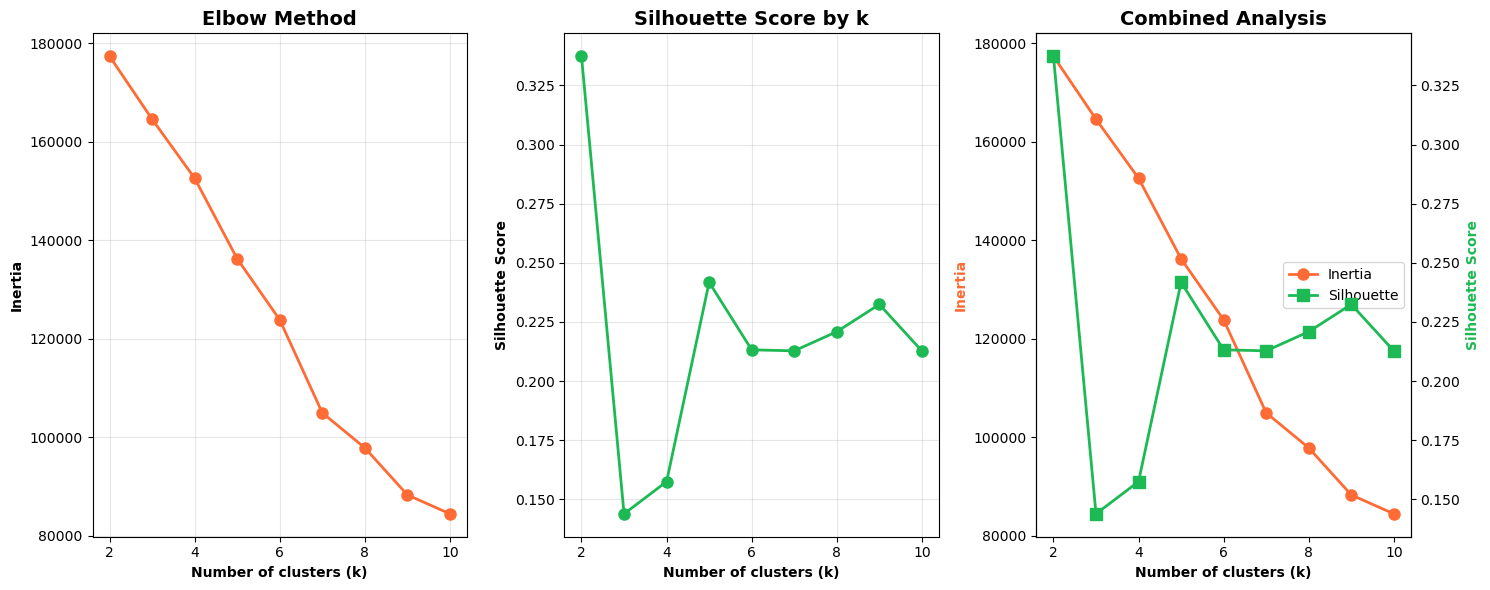


K-Selection Results:
k     Inertia      Silhouette  
--------------------------------------------------
2     177328.80    0.3374      
3     164543.76    0.1439      
4     152557.23    0.1575      
5     136208.46    0.2418      
6     123819.67    0.2132      
7     104940.52    0.2128      
8     97824.04     0.2209      
9     88278.58     0.2324      
10    84428.75     0.2127      

Suggested k based on highest silhouette score: 2

STEP 3: Running Final K-Means with k=2...
Clustering completed with 2 clusters
Final Silhouette Score: 0.3374
Final Inertia: 177328.80

STEP 4: Cluster Size Distribution...

Cluster sizes:
  Cluster 0: 16376 songs ( 79.1%)
  Cluster 1: 4340 songs ( 20.9%)

STEP 6: Detailed Cluster Analysis...

CLUSTER 0 ANALYSIS (16376 songs)

TOP 5 CHARACTERISTICS:
  1. Genre_encoded: 3.6279
  2. Album_Song_Count: 2.9056
  3. Vocal_Instrumental_Balance: 0.8815
  4. Production_Quality: 0.6476
  5. Harmonic_Complexity: 0.4960

BOTTOM 5 CHARACTERISTICS:
  1. Energy_Val

In [356]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# ===== STEP 2: OPTIMAL K SELECTION =====
print("\nSTEP 2: Finding Optimal Number of Clusters...")

# Try multiple values of k
k_values = range(2, 11)
inertias = []
silhouettes = []

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

# Plot elbow + silhouette
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.plot(k_values, inertias, 'o-', color='#FF6B35', linewidth=2, markersize=8)
plt.xlabel("Number of clusters (k)", fontweight='bold')
plt.ylabel("Inertia", fontweight='bold')
plt.title("Elbow Method", fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(k_values, silhouettes, 'o-', color='#1DB954', linewidth=2, markersize=8)
plt.xlabel("Number of clusters (k)", fontweight='bold')
plt.ylabel("Silhouette Score", fontweight='bold')
plt.title("Silhouette Score by k", fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.3)

# Combined plot
plt.subplot(1, 3, 3)
ax1 = plt.gca()
ax2 = ax1.twinx()

line1 = ax1.plot(k_values, inertias, 'o-', color='#FF6B35', linewidth=2, markersize=8, label='Inertia')
line2 = ax2.plot(k_values, silhouettes, 's-', color='#1DB954', linewidth=2, markersize=8, label='Silhouette')

ax1.set_xlabel("Number of clusters (k)", fontweight='bold')
ax1.set_ylabel("Inertia", color='#FF6B35', fontweight='bold')
ax2.set_ylabel("Silhouette Score", color='#1DB954', fontweight='bold')
ax1.set_title("Combined Analysis", fontweight='bold', fontsize=14)

# Legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')

plt.tight_layout()
plt.show()

# Print numerical results
print("\nK-Selection Results:")
print("=" * 50)
print(f"{'k':<5} {'Inertia':<12} {'Silhouette':<12}")
print("-" * 50)
for i, k in enumerate(k_values):
    print(f"{k:<5} {inertias[i]:<12.2f} {silhouettes[i]:<12.4f}")

# Suggest optimal k
best_silhouette_k = k_values[np.argmax(silhouettes)]
print(f"\nSuggested k based on highest silhouette score: {best_silhouette_k}")

# ===== STEP 3: FINAL CLUSTERING WITH OPTIMAL K =====
print(f"\nSTEP 3: Running Final K-Means with k={best_silhouette_k}...")

# You can manually adjust this if you prefer a different k based on elbow method
optimal_k = best_silhouette_k  # Change this if needed

final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
cluster_labels = final_kmeans.fit_predict(X_scaled)

# Add clusters back to original dataframe
df_clustered = df_CLUSTER.copy()
df_clustered['Cluster'] = cluster_labels

print(f"Clustering completed with {optimal_k} clusters")
print(f"Final Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.4f}")
print(f"Final Inertia: {final_kmeans.inertia_:.2f}")

# ===== STEP 4: CLUSTER SIZE ANALYSIS =====
print(f"\nSTEP 4: Cluster Size Distribution...")

cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
print("\nCluster sizes:")
for cluster, count in cluster_counts.items():
    percentage = (count / len(df_clustered)) * 100
    print(f"  Cluster {cluster}: {count:>4} songs ({percentage:>5.1f}%)")


# ===== STEP 6: DETAILED CLUSTER ANALYSIS =====
print(f"\nSTEP 6: Detailed Cluster Analysis...")

for cluster in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster]
    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster} ANALYSIS ({len(cluster_data)} songs)")
    print(f"{'='*60}")
    
    # Top 5 highest and lowest feature values
    feature_means = cluster_data[features_for_clustering].mean().sort_values(ascending=False)
    
    print(f"\nTOP 5 CHARACTERISTICS:")
    for i, (feature, value) in enumerate(feature_means.head().items(), 1):
        print(f"  {i}. {feature}: {value:.4f}")
    
    print(f"\nBOTTOM 5 CHARACTERISTICS:")
    for i, (feature, value) in enumerate(feature_means.tail().items(), 1):
        print(f"  {i}. {feature}: {value:.4f}")
    
    # Sample songs from this cluster
    print(f"\nSAMPLE SONGS FROM CLUSTER {cluster}:")
    if 'track_name' in df_clustered.columns:
        sample_songs = cluster_data['track_name'].head(3).tolist()
        for i, song in enumerate(sample_songs, 1):
            print(f"  {i}. {song}")
    else:
        print("  (Track names not available)")

# ===== STEP 7: CLUSTER VALIDATION METRICS =====
print(f"\nSTEP 7: Final Validation Metrics...")
print("=" * 40)
print(f"Optimal number of clusters: {optimal_k}")
print(f"Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.4f}")
print(f"Inertia (WCSS): {final_kmeans.inertia_:.2f}")
print(f"Total variance explained by PCA: {sum(pca.explained_variance_ratio_):.2%}")

# Silhouette score interpretation
sil_score = silhouette_score(X_scaled, cluster_labels)
if sil_score > 0.5:
    interpretation = "Excellent cluster separation"
elif sil_score > 0.3:
    interpretation = "Good cluster separation"
elif sil_score > 0.1:
    interpretation = "Moderate cluster separation"
else:
    interpretation = "Weak cluster separation"

print(f"Silhouette Interpretation: {interpretation}")
print("=" * 40)

print(f"\nK-Means clustering analysis completed successfully!")

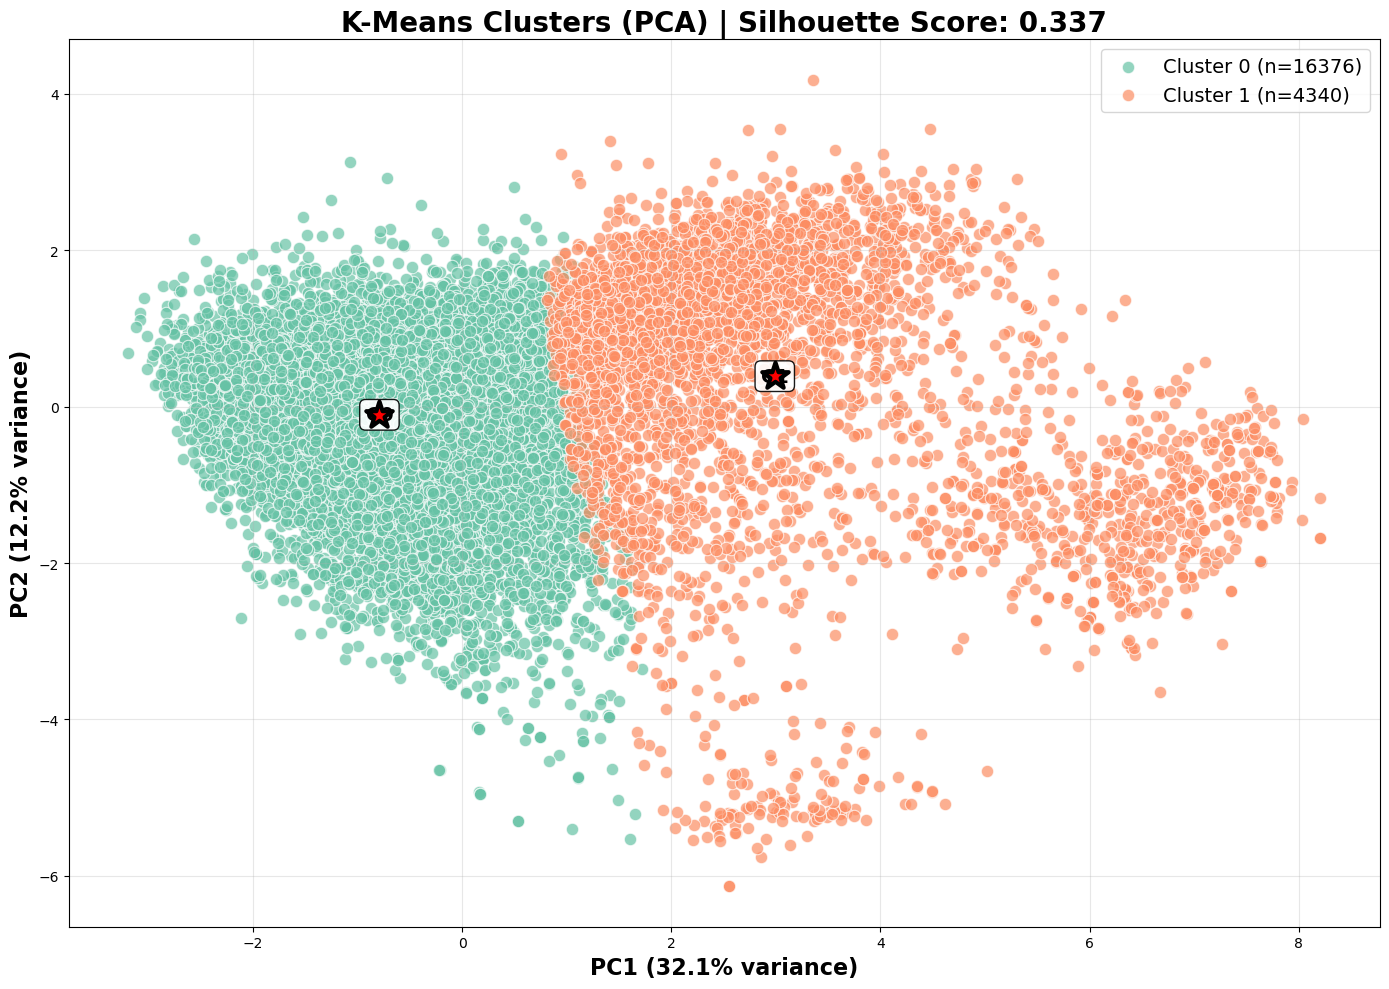

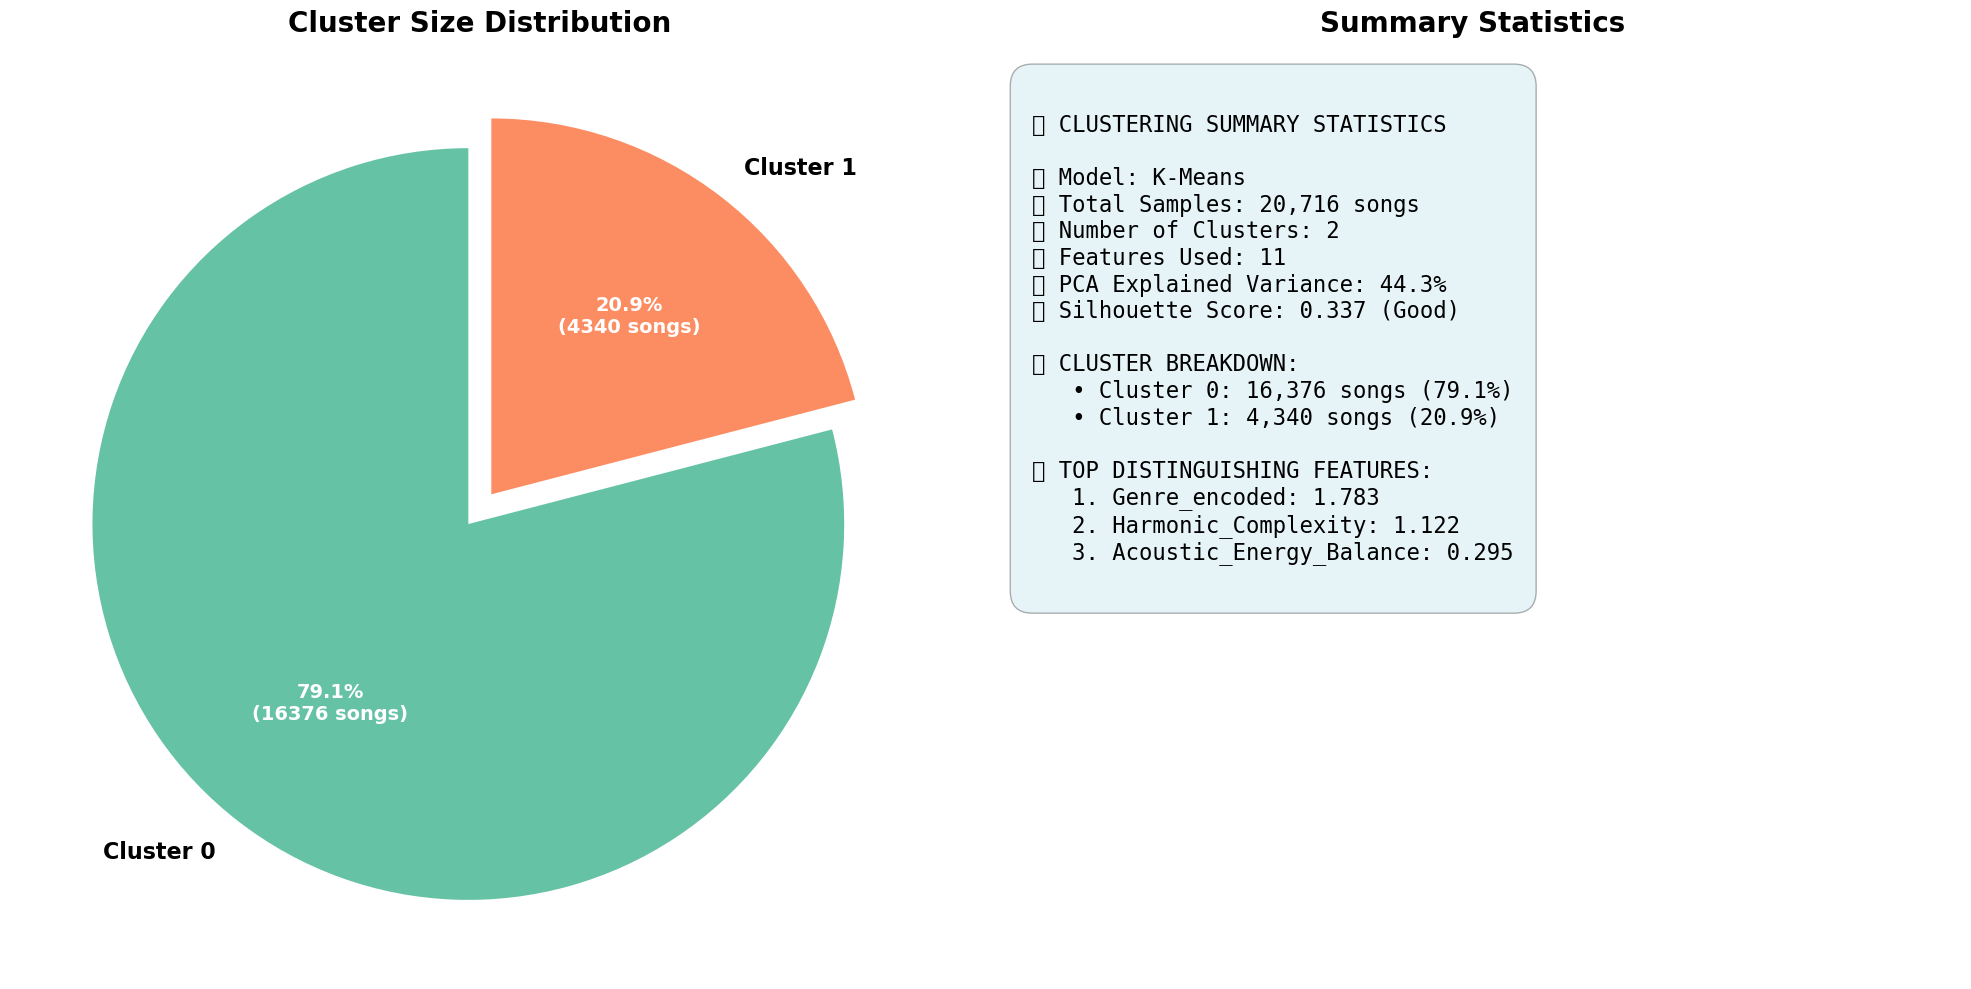

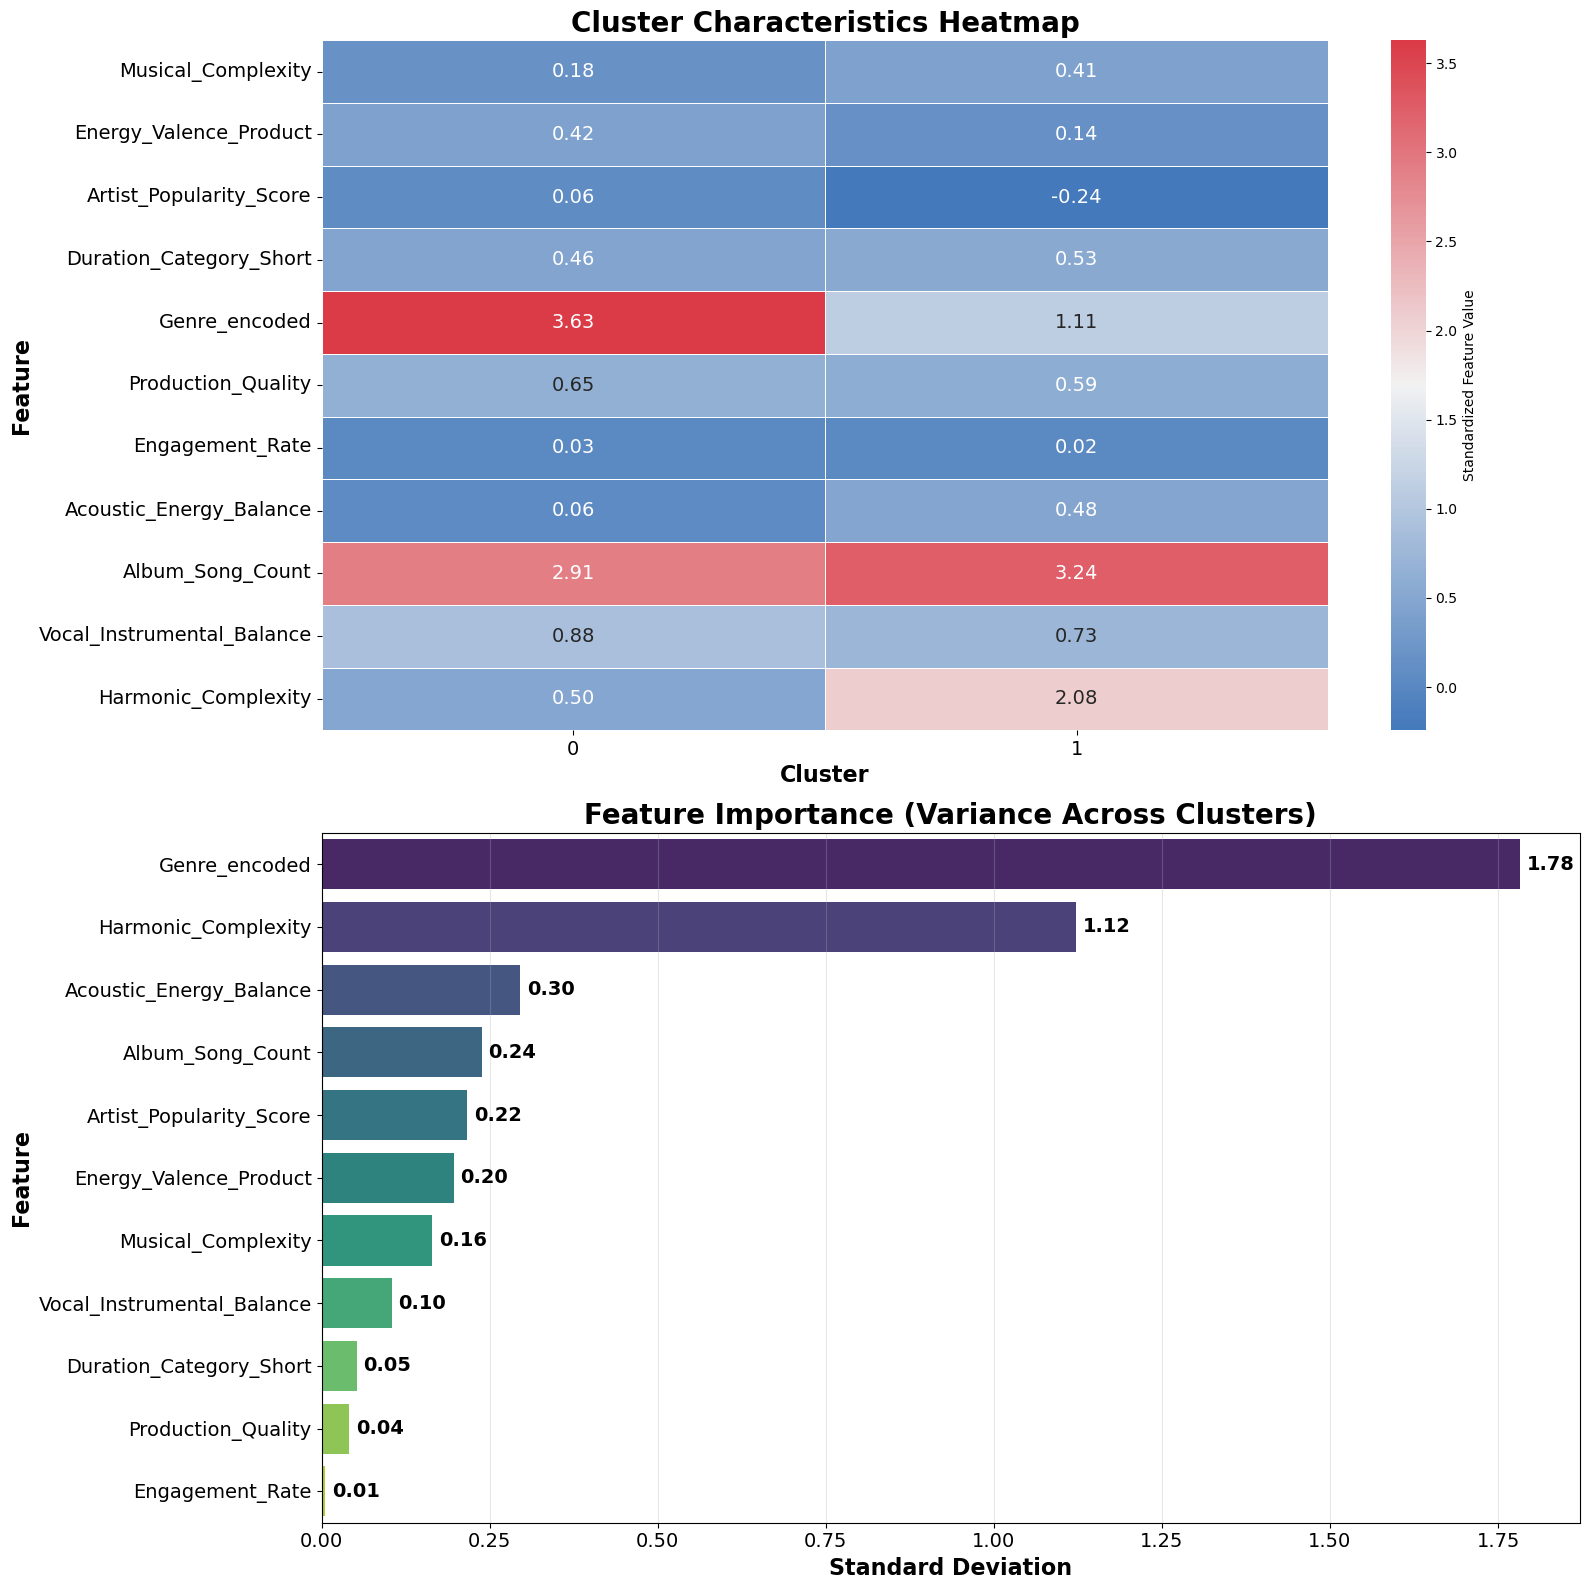

In [357]:
fig, stats = visualize_cluster_summary(
    X_scaled, 
    cluster_labels, 
    df_clustered, 
    features_for_clustering, 
    model_name="K-Means",
    show_silhouette=True
)

to check corallation

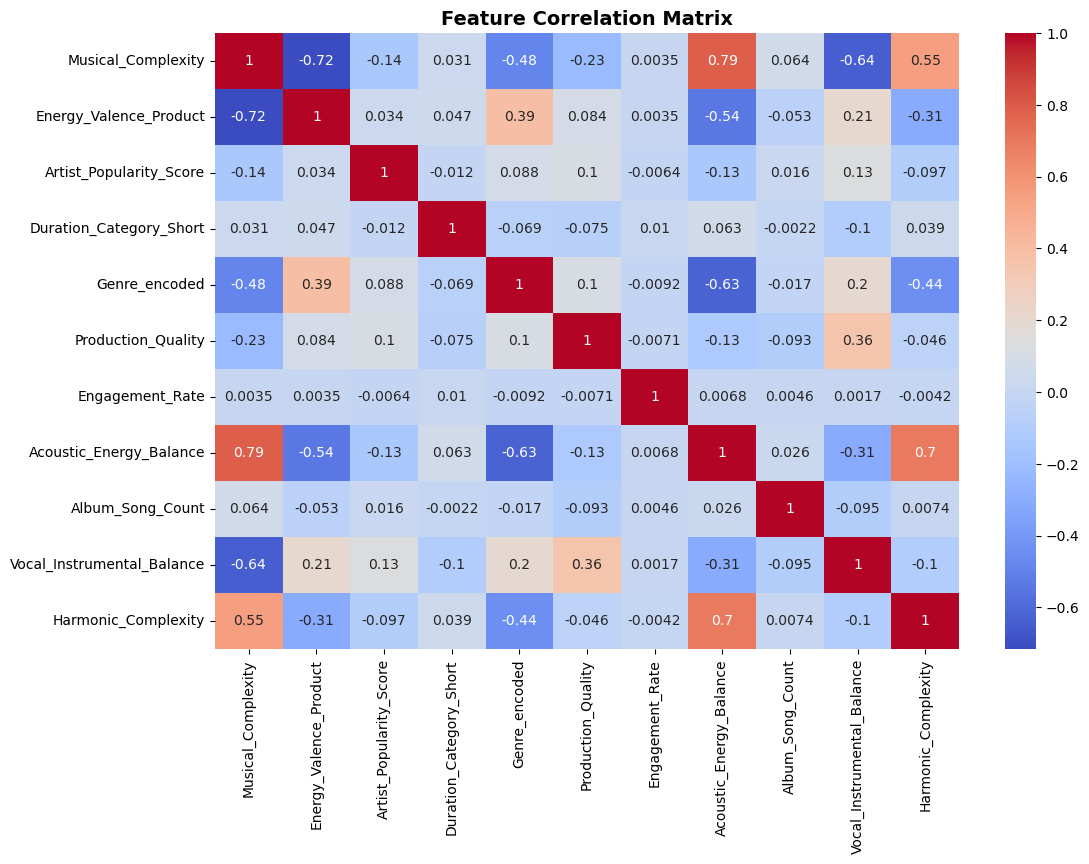

In [358]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df_CLUSTER[features_for_clustering].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix", fontsize=14, fontweight='bold')
plt.show()



STEP 3: GMM Clustering – Finding Optimal Number of Components (k)...


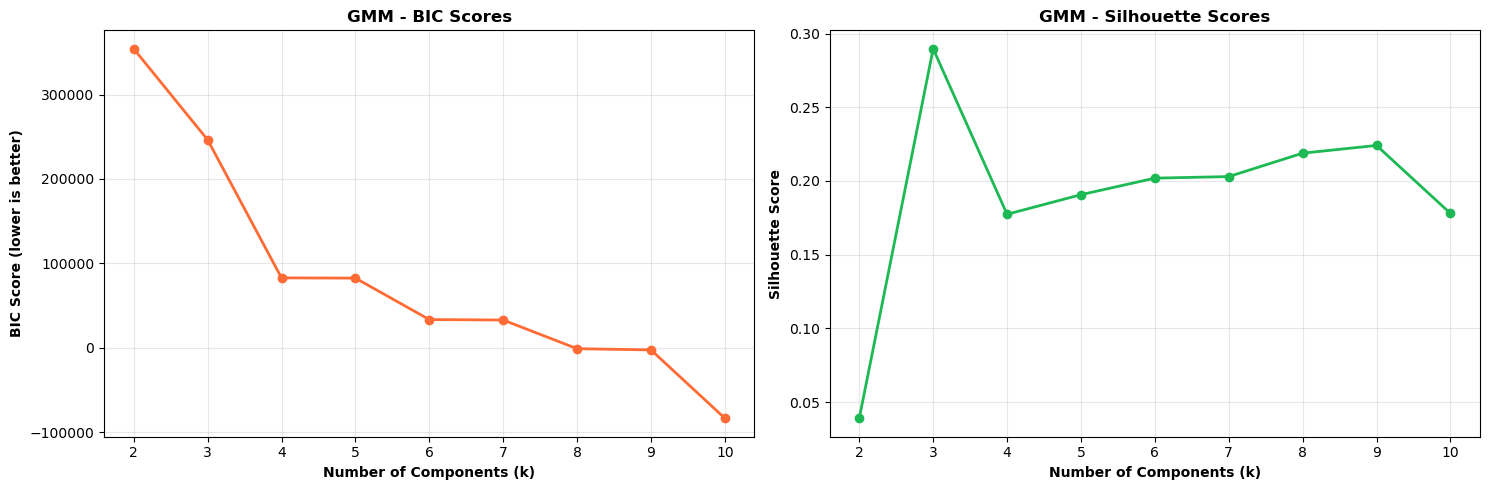


GMM Component Selection Results:
k     BIC Score    Silhouette  
------------------------------------------------------------
2     354128.48    0.0390      
3     246411.22    0.2896      
4     82852.02     0.1774      
5     82578.69     0.1907      
6     33485.54     0.2019      
7     32945.12     0.2030      
8     -988.25      0.2188      
9     -2493.61     0.2241      
10    -83378.49    0.1780      

Suggested k based on highest silhouette score: 3
Suggested k based on lowest BIC score: 10

STEP 4: Running Final GMM with k=3...
GMM clustering completed with 3 clusters.
Final GMM Silhouette Score: 0.2896
Final GMM BIC Score: 246411.22

STEP 5: GMM Cluster Size Distribution...

GMM Cluster sizes:
  Cluster 0: 2369 songs ( 11.4%)
  Cluster 1: 3649 songs ( 17.6%)
  Cluster 2: 14698 songs ( 70.9%)

STEP 7: Detailed GMM Cluster Analysis...

GMM CLUSTER 0 ANALYSIS (2369 songs)

TOP 5 CHARACTERISTICS:
  1. Album_Song_Count: 5.6007
  2. Genre_encoded: 1.5454
  3. Vocal_Instrumental_

In [359]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("\nSTEP 3: GMM Clustering – Finding Optimal Number of Components (k)...")

k_values = range(2, 11)
bic_scores = []
silhouette_scores = []

for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42, covariance_type='full')
    gmm.fit(X_scaled)
    labels = gmm.predict(X_scaled)
    
    bic_scores.append(gmm.bic(X_scaled))
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# === Plotting ===
plt.figure(figsize=(15, 5))

# BIC
plt.subplot(1, 2, 1)
plt.plot(k_values, bic_scores, marker='o', color='#FF6B35', linewidth=2)
plt.xlabel("Number of Components (k)", fontweight='bold')
plt.ylabel("BIC Score (lower is better)", fontweight='bold')
plt.title("GMM - BIC Scores", fontweight='bold')
plt.grid(True, alpha=0.3)

# Silhouette
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='#1DB954', linewidth=2)
plt.xlabel("Number of Components (k)", fontweight='bold')
plt.ylabel("Silhouette Score", fontweight='bold')
plt.title("GMM - Silhouette Scores", fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print numerical results
print("\nGMM Component Selection Results:")
print("=" * 60)
print(f"{'k':<5} {'BIC Score':<12} {'Silhouette':<12}")
print("-" * 60)
for i, k in enumerate(k_values):
    print(f"{k:<5} {bic_scores[i]:<12.2f} {silhouette_scores[i]:<12.4f}")

# === Best k based on silhouette ===
optimal_gmm_k = k_values[np.argmax(silhouette_scores)]
best_bic_k = k_values[np.argmin(bic_scores)]  # Lower BIC is better

print(f"\nSuggested k based on highest silhouette score: {optimal_gmm_k}")
print(f"Suggested k based on lowest BIC score: {best_bic_k}")

# You can manually choose between silhouette or BIC
optimal_k = optimal_gmm_k  # Change this if needed

# === STEP 4: FINAL GMM CLUSTERING ===
print(f"\nSTEP 4: Running Final GMM with k={optimal_k}...")

gmm_final = GaussianMixture(n_components=optimal_k, random_state=42, covariance_type='full')
gmm_labels = gmm_final.fit_predict(X_scaled)

# === Add to dataframe ===
df_gmm = df_CLUSTER.copy()
df_gmm['GMM_Cluster'] = gmm_labels

print(f"GMM clustering completed with {optimal_k} clusters.")
print(f"Final GMM Silhouette Score: {silhouette_score(X_scaled, gmm_labels):.4f}")
print(f"Final GMM BIC Score: {gmm_final.bic(X_scaled):.2f}")

# ===== STEP 5: CLUSTER SIZE ANALYSIS =====
print(f"\nSTEP 5: GMM Cluster Size Distribution...")

cluster_counts = pd.Series(gmm_labels).value_counts().sort_index()
print("\nGMM Cluster sizes:")
for cluster, count in cluster_counts.items():
    percentage = (count / len(df_gmm)) * 100
    print(f"  Cluster {cluster}: {count:>4} songs ({percentage:>5.1f}%)")



# ===== STEP 7: DETAILED GMM CLUSTER ANALYSIS =====
print(f"\nSTEP 7: Detailed GMM Cluster Analysis...")

for cluster in range(optimal_k):
    cluster_data = df_gmm[df_gmm['GMM_Cluster'] == cluster]
    print(f"\n{'='*60}")
    print(f"GMM CLUSTER {cluster} ANALYSIS ({len(cluster_data)} songs)")
    print(f"{'='*60}")
    
    # Top 5 highest and lowest feature values
    feature_means = cluster_data[features_for_clustering].mean().sort_values(ascending=False)
    
    print(f"\nTOP 5 CHARACTERISTICS:")
    for i, (feature, value) in enumerate(feature_means.head().items(), 1):
        print(f"  {i}. {feature}: {value:.4f}")
    
    print(f"\nBOTTOM 5 CHARACTERISTICS:")
    for i, (feature, value) in enumerate(feature_means.tail().items(), 1):
        print(f"  {i}. {feature}: {value:.4f}")
    
    # Sample songs from this cluster
    print(f"\nSAMPLE SONGS FROM GMM CLUSTER {cluster}:")
    if 'track_name' in df_gmm.columns:
        sample_songs = cluster_data['track_name'].head(3).tolist()
        for i, song in enumerate(sample_songs, 1):
            print(f"  {i}. {song}")
    else:
        print("  (Track names not available)")

# ===== STEP 8: GMM CLUSTER VALIDATION METRICS =====
print(f"\nSTEP 8: Final GMM Validation Metrics...")
print("=" * 50)
print(f"Optimal number of components: {optimal_k}")
print(f"Silhouette Score: {silhouette_score(X_scaled, gmm_labels):.4f}")
print(f"BIC Score: {gmm_final.bic(X_scaled):.2f}")
print(f"AIC Score: {gmm_final.aic(X_scaled):.2f}")
print(f"Log Likelihood: {gmm_final.score(X_scaled):.2f}")

# Silhouette score interpretation
sil_score = silhouette_score(X_scaled, gmm_labels)
if sil_score > 0.5:
    interpretation = "Excellent cluster separation"
elif sil_score > 0.3:
    interpretation = "Good cluster separation"
elif sil_score > 0.1:
    interpretation = "Moderate cluster separation"
else:
    interpretation = "Weak cluster separation"

print(f"Silhouette Interpretation: {interpretation}")

# GMM specific metrics
print(f"\nGMM-Specific Information:")
print(f"Converged: {gmm_final.converged_}")
print(f"Number of iterations: {gmm_final.n_iter_}")
print(f"Covariance type: {gmm_final.covariance_type}")

print("=" * 50)
print(f"\nGMM clustering analysis completed successfully!")


STEP 6: Visualizing GMM Clusters


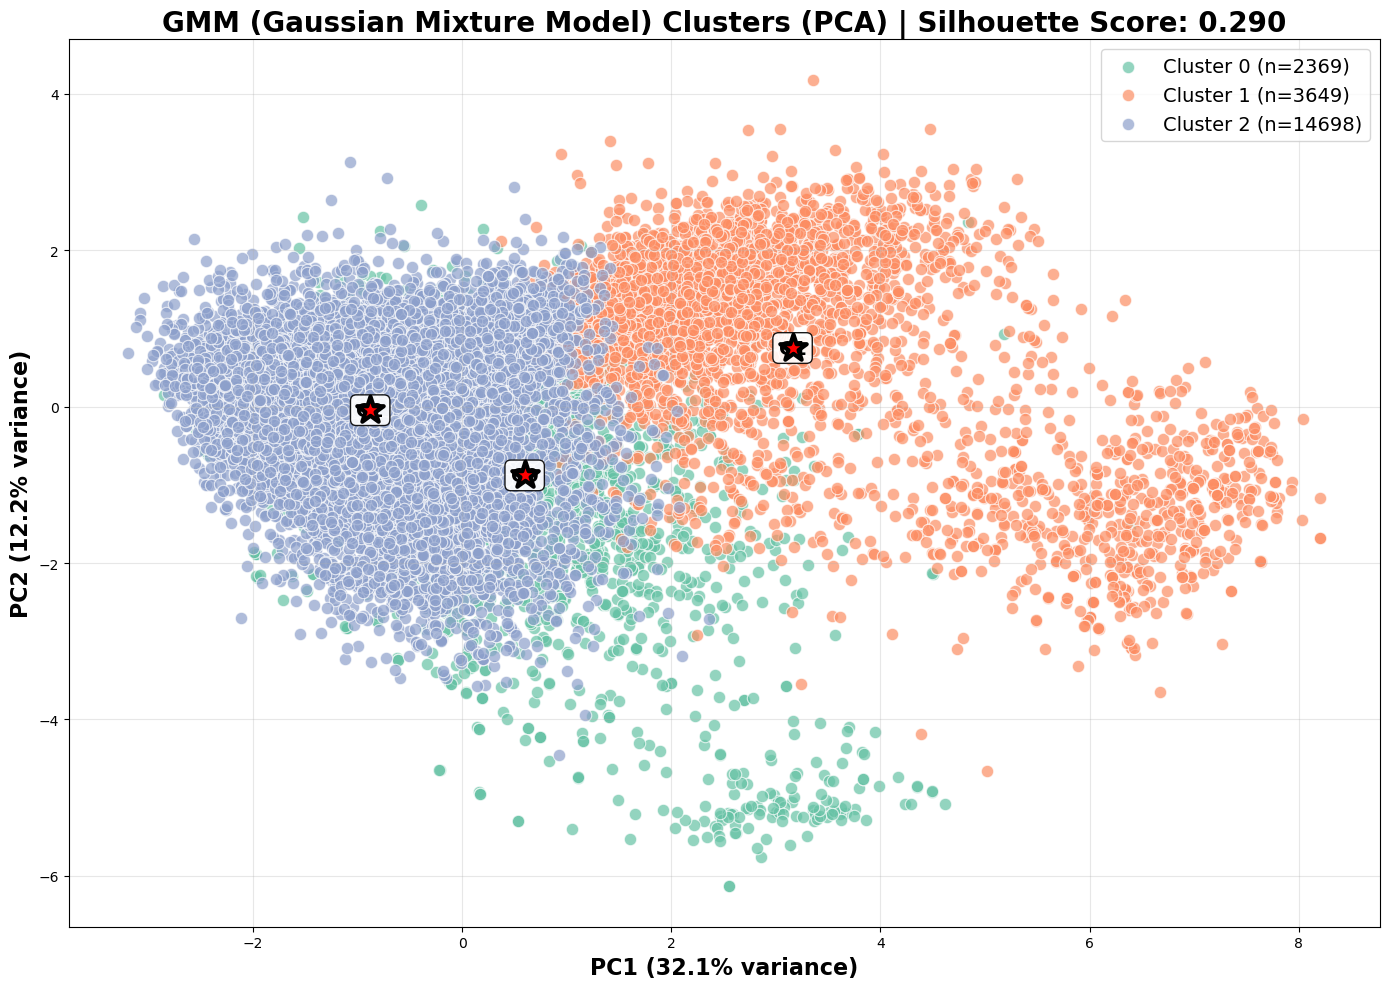

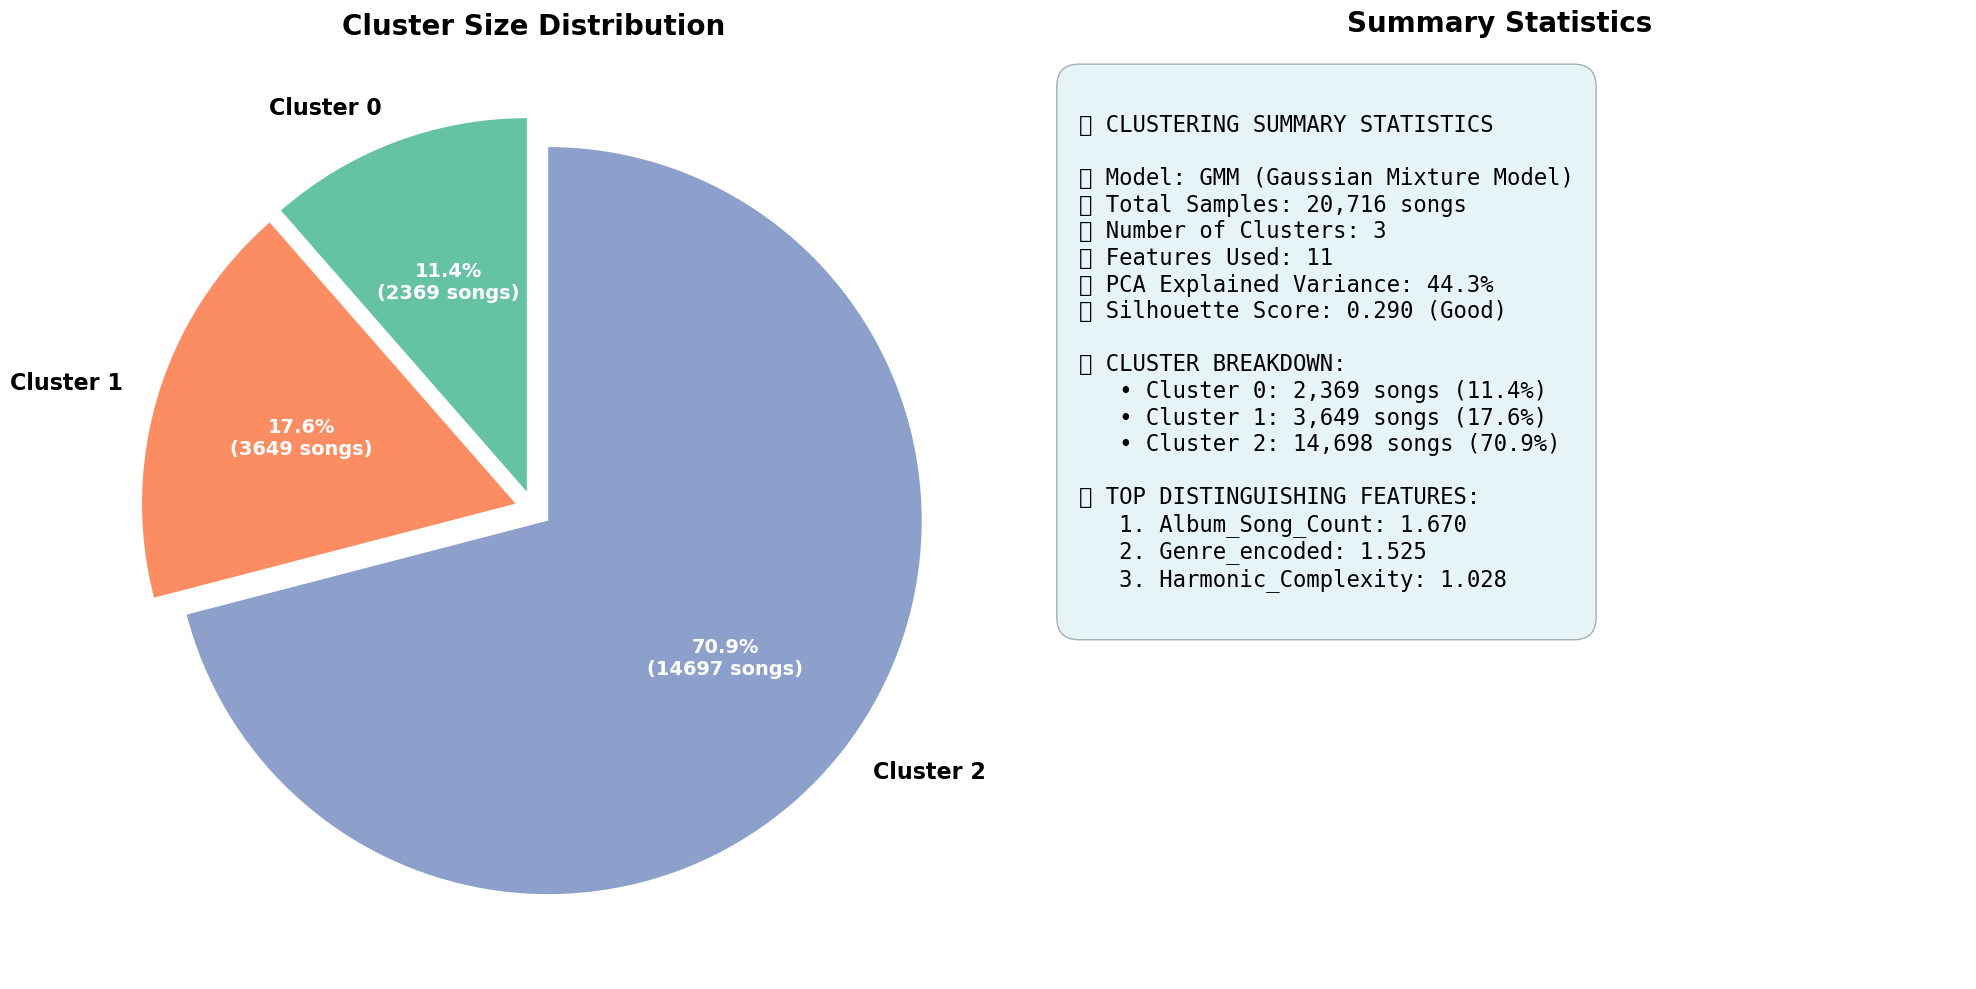

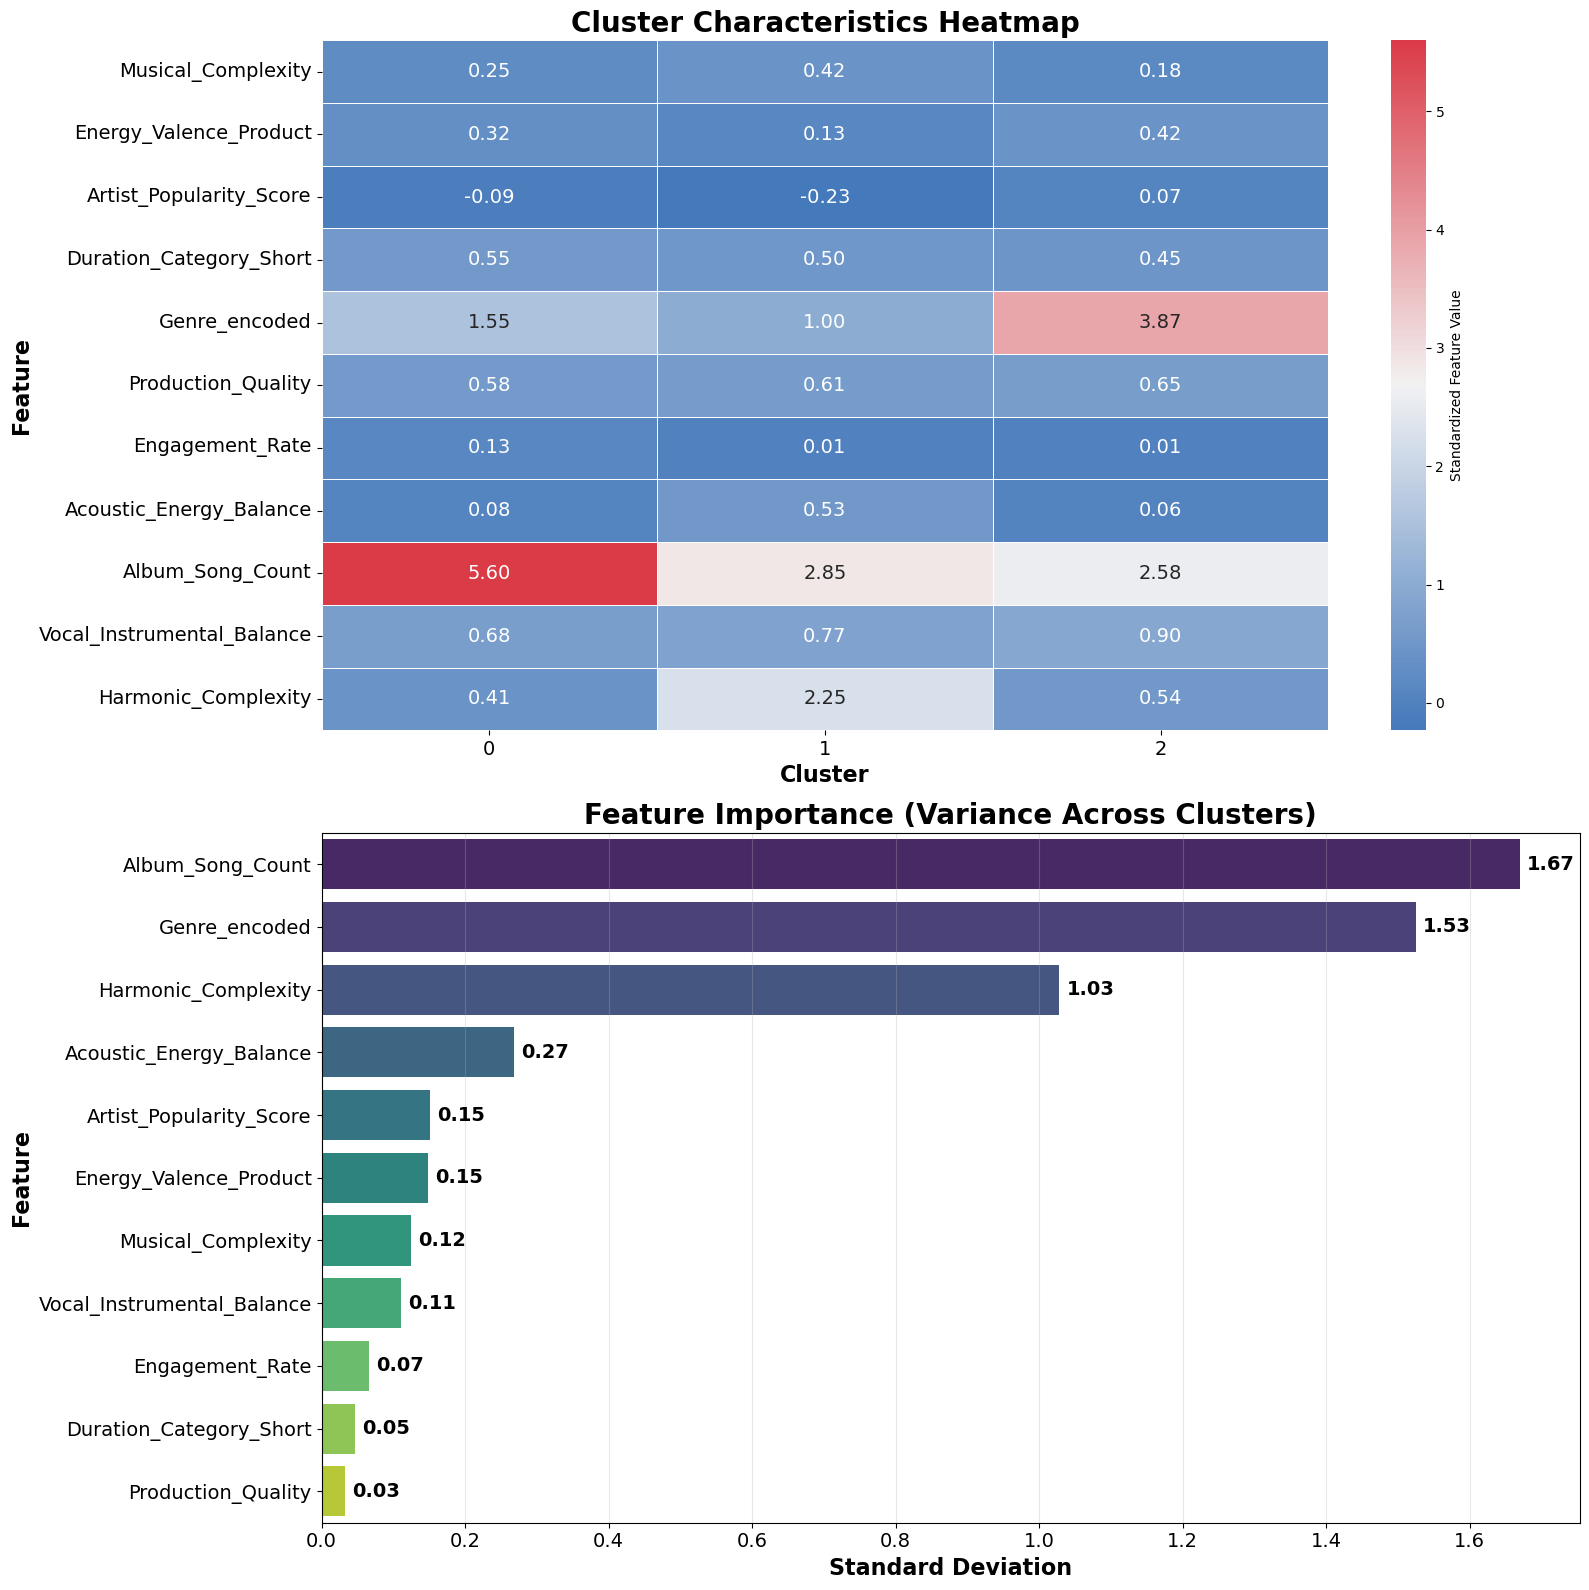

In [360]:
print(f"\nSTEP 6: Visualizing GMM Clusters")

# Call your enhanced visualization function
fig, stats = visualize_cluster_summary(
    X_scaled, 
    gmm_labels, 
    df_gmm, 
    features_for_clustering, 
    model_name="GMM (Gaussian Mixture Model)",
    show_silhouette=True
)

🔍 COMPARING YOUR EXISTING GMM vs K-MEANS RESULTS...


🔧 DEBUG INFO:
   K-Means unique clusters: [0, 1]
   GMM unique clusters: [0, 1, 2]
   K-Means optimal k passed: 2
   GMM optimal k passed: 3
   Features in clustering list: 11
   Features in importance calculation: 11
📊 RESULTS COMPARISON:
   K-Means (k=2): Silhouette = 0.337
   GMM (k=3): Silhouette = 0.290
   Winner: K-Means 🏆


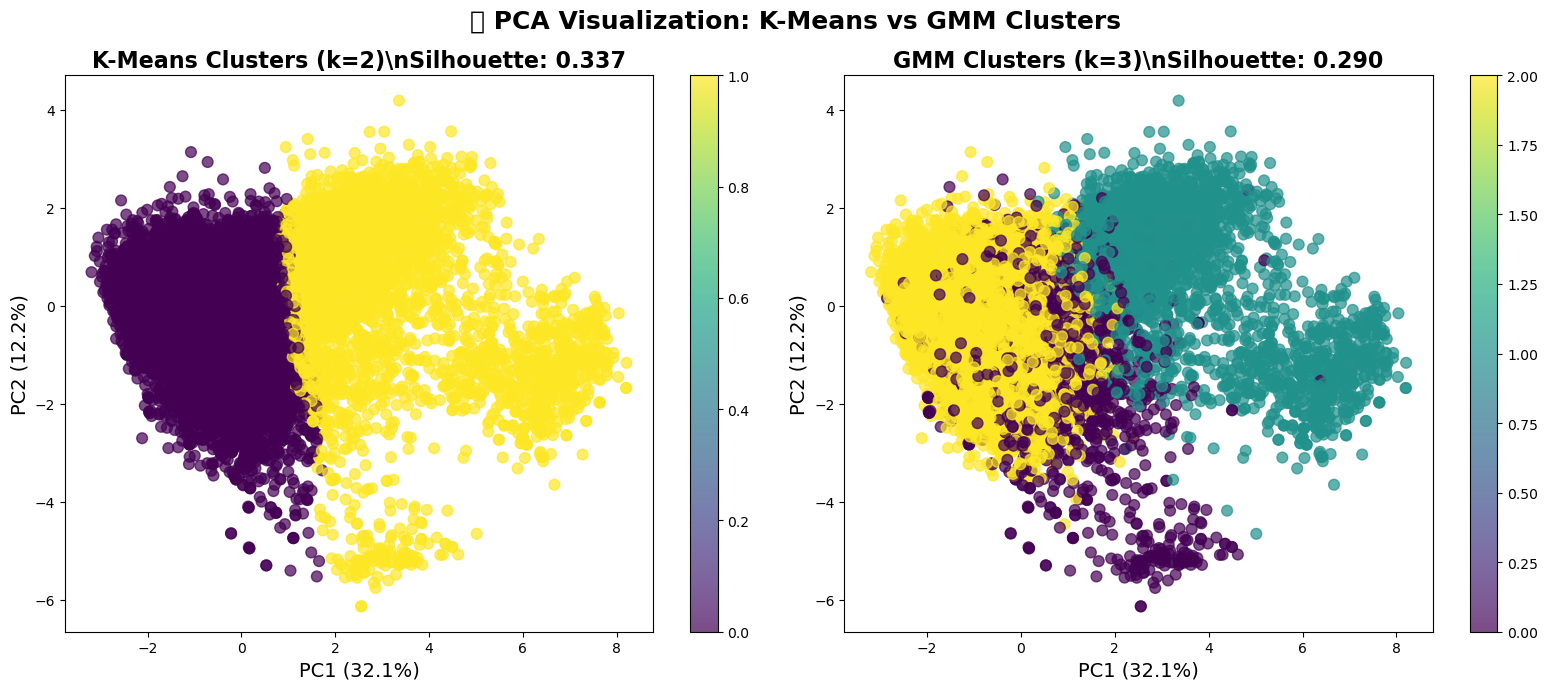

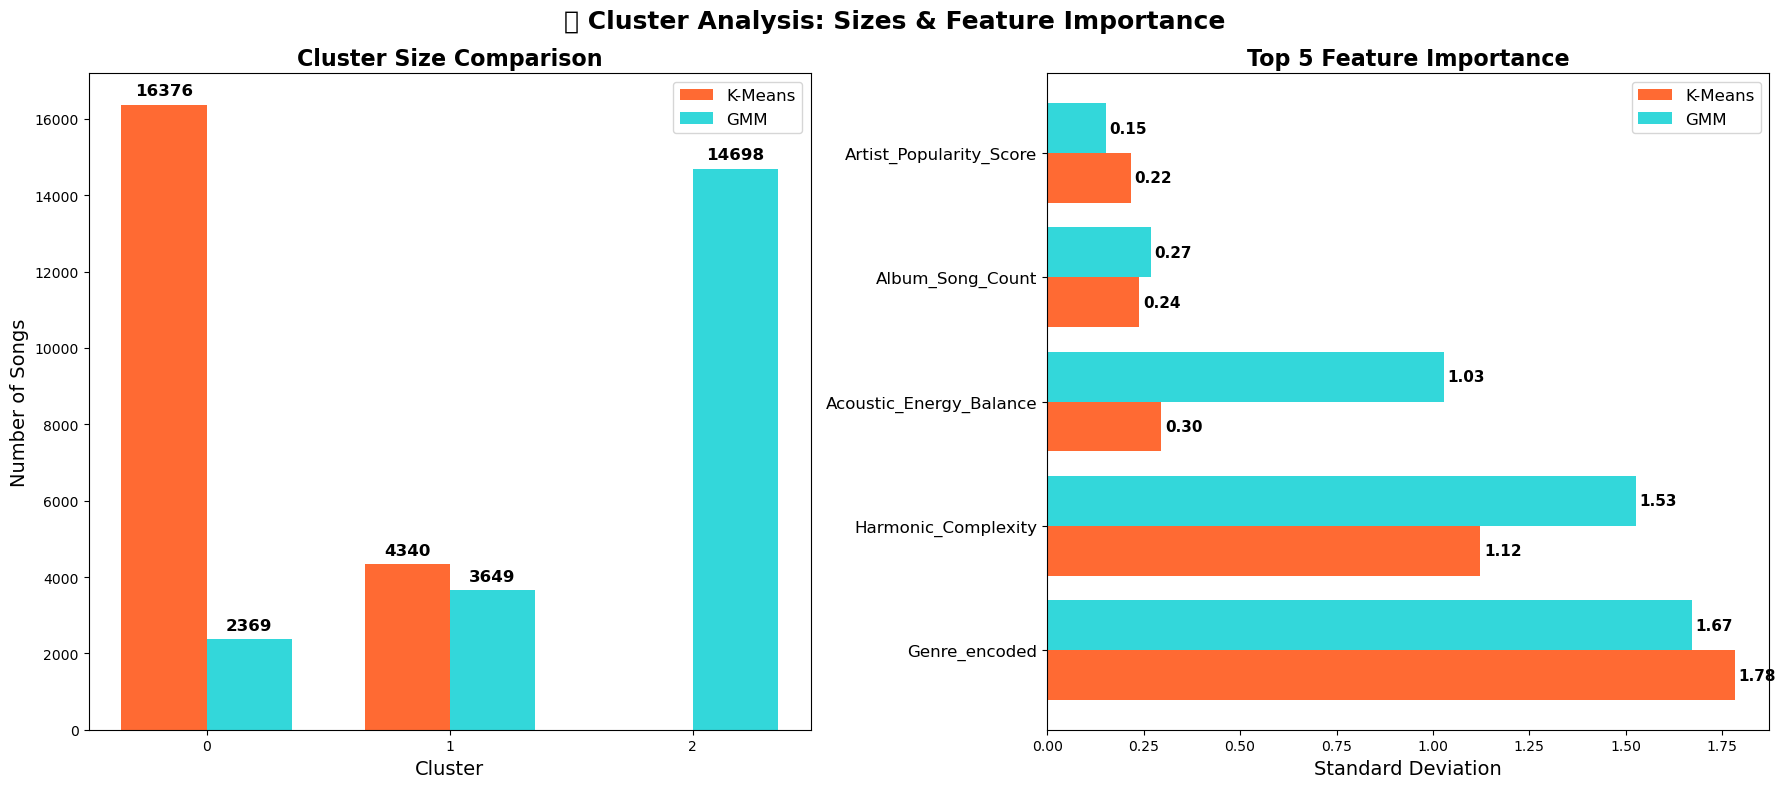

📊 Radar Chart Info:
   Group 1 (5 features): ['Musical_Complexity', 'Energy_Valence_Product', 'Artist_Popularity_Score', 'Duration_Category_Short', 'Genre_encoded']
   Group 2 (6 features): ['Production_Quality', 'Engagement_Rate', 'Acoustic_Energy_Balance', 'Album_Song_Count', 'Vocal_Instrumental_Balance', 'Harmonic_Complexity']


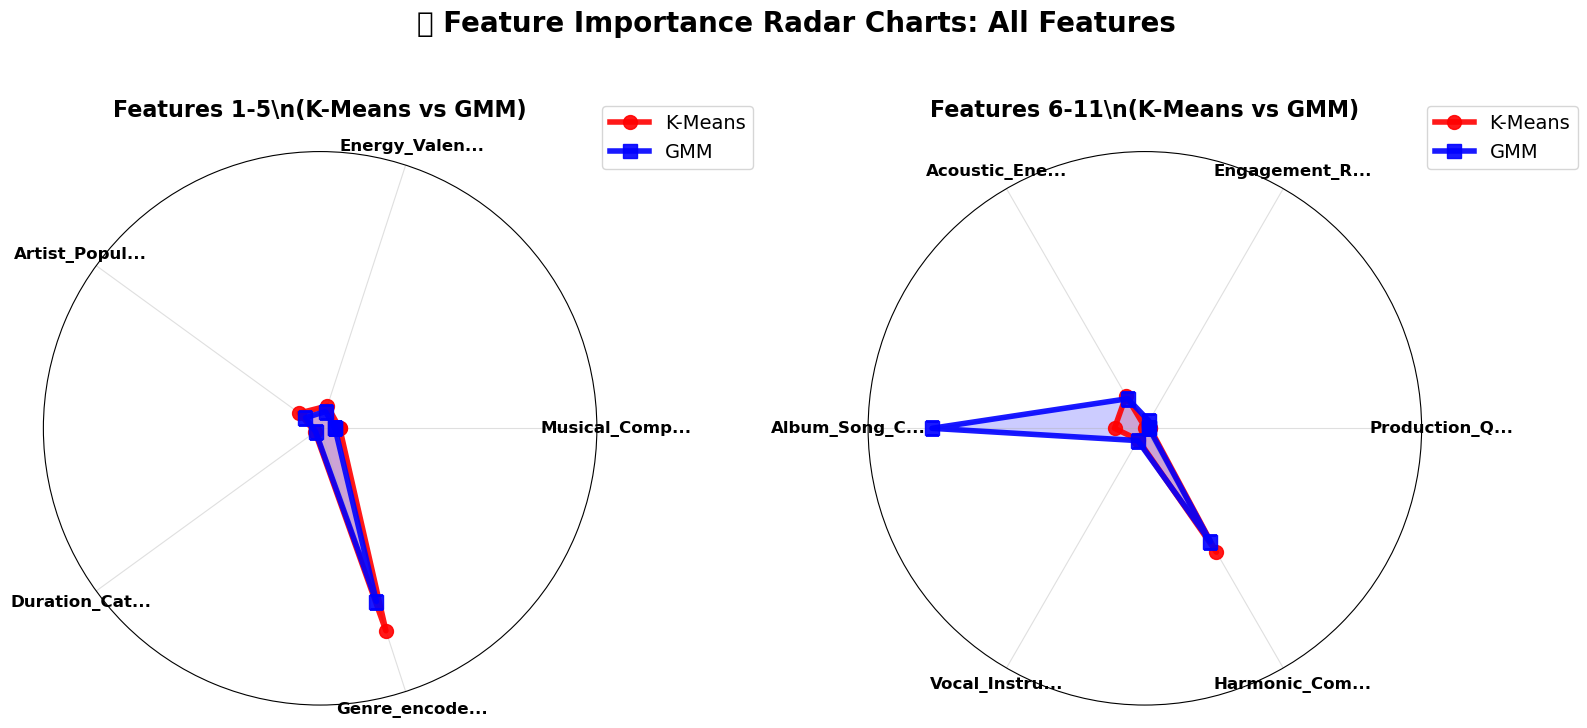

\n================================================================================
📊 CLUSTERING COMPARISON SUMMARY TABLE
\n🔍 PERFORMANCE METRICS:
--------------------------------------------------
Metric                    K-Means         GMM            
--------------------------------------------------
Silhouette Score          0.337           0.290          
Number of Clusters        2               3              
Inertia/BIC               177329          246411         
Algorithm Type            Hard            Soft           
\n🏆 WINNER: 🔴 K-Means
\n🎯 CLUSTER DISTRIBUTION:
------------------------------------------------------------
K-MEANS CLUSTERS               GMM CLUSTERS                  
------------------------------------------------------------
Cluster 0: 16,376 (79.1%)      Cluster 0: 2,369 (11.4%)      
Cluster 1: 4,340 (20.9%)       Cluster 1: 3,649 (17.6%)      
                               Cluster 2: 14,698 (70.9%)     
\n📈 GENERAL INFO:
--------------------------

In [361]:
# Use the new clean function
comparison_results = compare_existing_results_clean(
    X_scaled, features_for_clustering,
    cluster_labels, df_clustered, final_kmeans, best_silhouette_k,  
    gmm_labels, df_gmm, gmm_final, optimal_gmm_k
)

### PART E